In [51]:
import sys
import numpy as np
import scipy.stats as ss
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Read data from fix width formatted file

In [3]:
sys.path.insert(0, '..')
import Modules.read_fwf as rfwf

In [4]:
def ReadFemPreg(dct_file, dat_file):
    """
    reads the NSFG pregnancy data.

    :param dct_file: string file name
    :param dat_file: string file name
    :return: DataFrame
    """
    dct = rfwf.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file)

    return df

In [5]:
pregnancy_data = ReadFemPreg(dct_file='../Data/2017_2019_FemPregSetup.dct',
                             dat_file='../Data/2017_2019_FemPregData.dat')

In [6]:
pregnancy_data

,caseid,pregordr,moscurrp,pregend1,pregend2,hpageend,kidage,hpagelb,paybirth1,paybirth2,...,secu,sest,cmintvw,cmlstyr,cmjan3yr,cmjan4yr,cmjan5yr,quarter,phase,intvwyear
0,88819,1,NaN,6.0,NaN,NaN,7.0,4.0,NaN,NaN,...,2,354,1427,1415,1381,1369,1357,29,1,2018
1,88819,2,NaN,5.0,NaN,NaN,6.0,4.0,NaN,NaN,...,2,354,1427,1415,1381,1369,1357,29,1,2018
2,83055,1,NaN,5.0,NaN,NaN,6.0,4.0,NaN,NaN,...,2,354,1425,1413,1381,1369,1357,29,1,2018
3,83055,2,NaN,5.0,NaN,NaN,6.0,5.0,NaN,NaN,...,2,354,1425,1413,1381,1369,1357,29,1,2018
4,92062,1,NaN,6.0,NaN,NaN,7.0,4.0,NaN,NaN,...,2,354,1426,1414,1381,1369,1357,29,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10210,91420,4,NaN,6.0,NaN,NaN,6.0,6.0,NaN,NaN,...,1,370,1432,1420,1393,1381,1369,31,1,2019
10211,89157,1,NaN,6.0,NaN,NaN,6.0,3.0,NaN,NaN,...,1,370,1433,1421,1393,1381,1369,31,1,2019
10212,89157,2,NaN,6.0,NaN,NaN,6.0,4.0,NaN,NaN,...,1,370,1433,1421,1393,1381,1369,31,1,2019
10213,89157,3,NaN,5.0,NaN,NaN,5.0,4.0,1.0,2.0,...,1,370,1433,1421,1393,1381,1369,31,1,2019


## Do some cleaning on data (transformation & validation)

In [7]:
na_values = [97, 98, 99]

pregnancy_data['hpagelb'].replace(na_values, np.nan, inplace=True)
pregnancy_data['feelinpg'].replace(na_values, np.nan, inplace=True)
pregnancy_data['cmintvw'] = np.nan

In [8]:
features = ['pregordr', 'hpagelb', 'csecprim', 'priorsmk', 'outcome', 'agecon', 'learnprg', 'pncarewk', 'lbw1',
            'postsmks', 'npostsmk', 'feelinpg', 'gest_lb', 'gest_othr', 'agepreg', 'ager', 'educat', 'hieduc',
            'race', 'pregnum', 'parity', 'poverty', 'laborfor', 'religion', 'metro']
pregnancy_data[features]

,pregordr,hpagelb,csecprim,priorsmk,outcome,agecon,learnprg,pncarewk,lbw1,postsmks,...,ager,educat,hieduc,race,pregnum,parity,poverty,laborfor,religion,metro
0,1,4.0,NaN,NaN,1,29,NaN,NaN,2.0,NaN,...,43,16,12,2,2,2,641,1,1,2
1,2,4.0,NaN,NaN,1,31,NaN,NaN,2.0,NaN,...,43,16,12,2,2,2,641,1,1,2
2,1,4.0,NaN,NaN,1,29,NaN,NaN,2.0,NaN,...,41,16,12,2,2,2,498,1,3,2
3,2,5.0,NaN,NaN,1,33,NaN,NaN,2.0,NaN,...,41,16,12,2,2,2,498,1,3,2
4,1,4.0,NaN,NaN,1,27,NaN,NaN,2.0,NaN,...,41,16,12,2,3,2,498,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10210,4,6.0,NaN,NaN,1,39,NaN,NaN,2.0,NaN,...,47,13,10,3,4,2,275,7,3,2
10211,1,3.0,NaN,NaN,1,26,NaN,NaN,1.0,NaN,...,37,15,10,3,3,3,90,7,3,2
10212,2,4.0,NaN,NaN,1,29,NaN,NaN,1.0,NaN,...,37,15,10,3,3,3,90,7,3,2
10213,3,4.0,1.0,0.0,1,32,1.0,1.0,1.0,5.0,...,37,15,10,3,3,3,90,7,3,2


## validation

In [9]:
val_dict = {}

for feat in features:
    val_dict[feat] = pregnancy_data[feat].value_counts()

In [10]:
val_dict['pregordr']

1     3709
2     2806
3     1776
4      952
5      481
6      227
7      115
8       68
9       35
10      22
11      10
12       7
13       5
14       2
Name: pregordr, dtype: int64

In [11]:
val_dict['outcome']

1    7199
4    1654
2     941
6     193
5     123
3     105
Name: outcome, dtype: int64

In [12]:
val_dict['pregnum']

3     2472
2     2058
4     1884
5     1265
1      903
6      677
7      322
8      271
10     120
9      117
13      39
11      33
14      28
12      24
0        2
Name: pregnum, dtype: int64

## distribution

In [13]:
def hist(feature, stat='count', kde=True, **options):
    """
    represent data as histogram

    :param feature: data want to use
    :param stat: plot type
    :param kde: kernal density estimator
    :param options: more options

    :return: graph
    """
    plt.figure(figsize=[12, 6], dpi=300)
    fig = sns.histplot(x=feature,
                       stat=stat,
                       kde=kde,
                       **options)
    plt.show()

- ### pregordr

Pregnancy order (number)<br><br>
most common values is one, most of them have less that five pregnancies

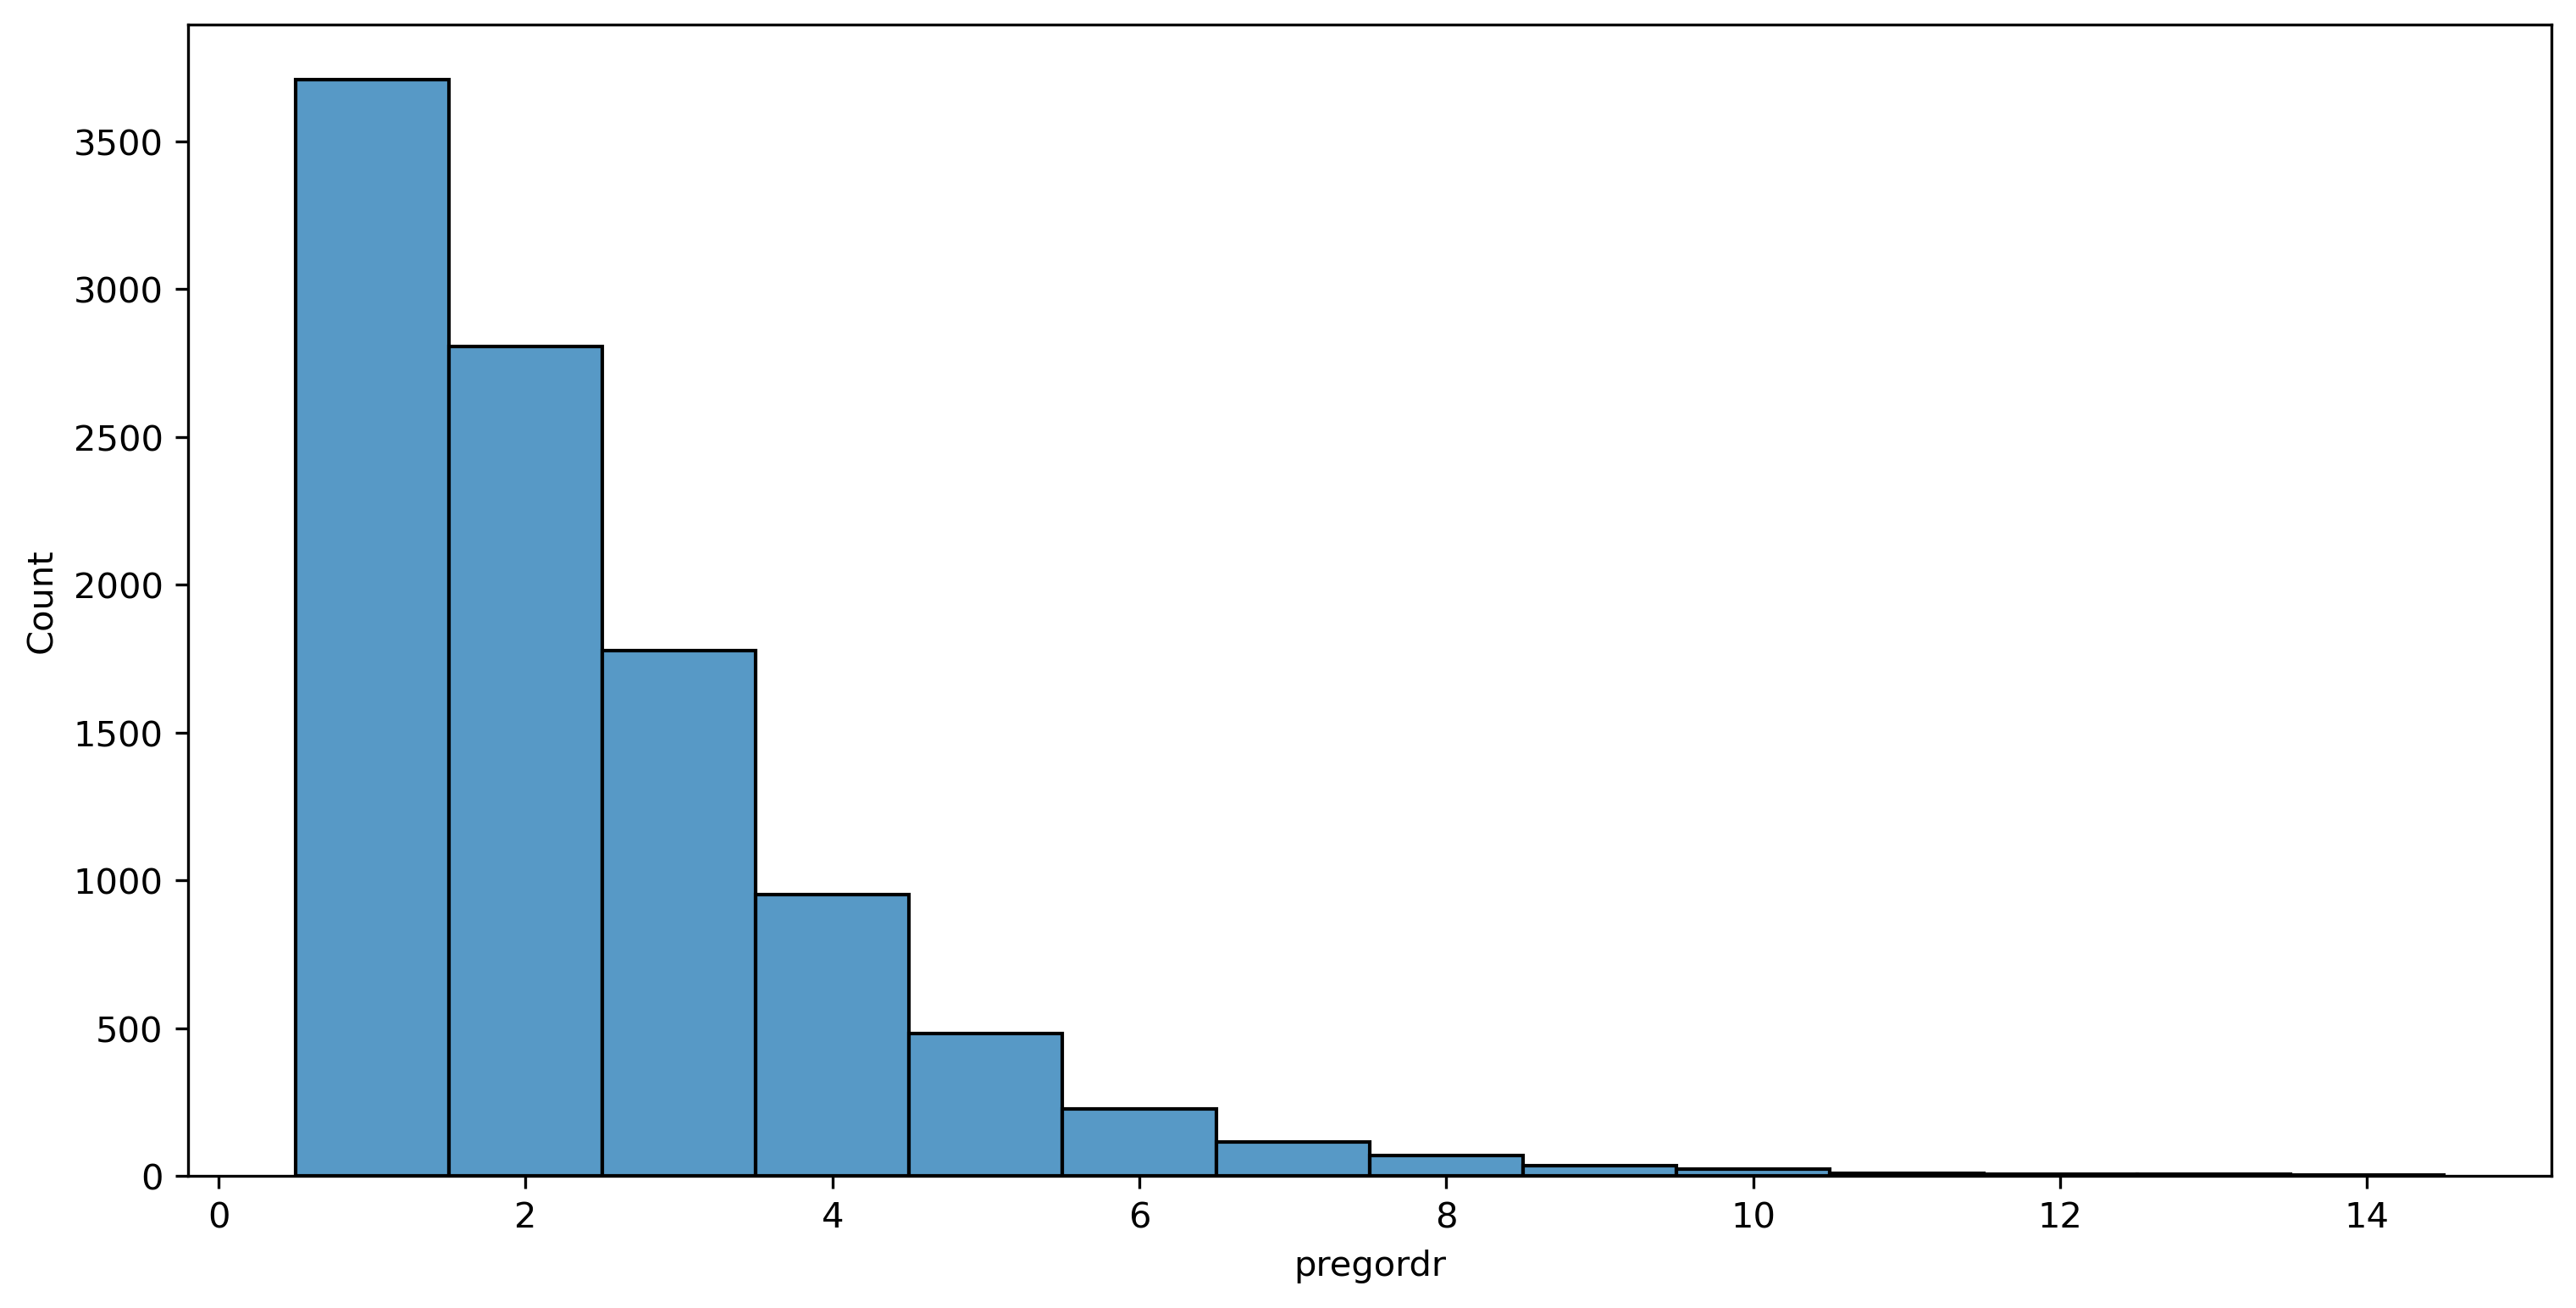

In [14]:
hist(pregnancy_data[features[0]], discrete=True, kde=False)

- ### hpagelb
Father's age (categorical) at pregnancy's end date<br><br>
most of the husband's age lie between 20 and 34. nearly normal distribution not exactly.

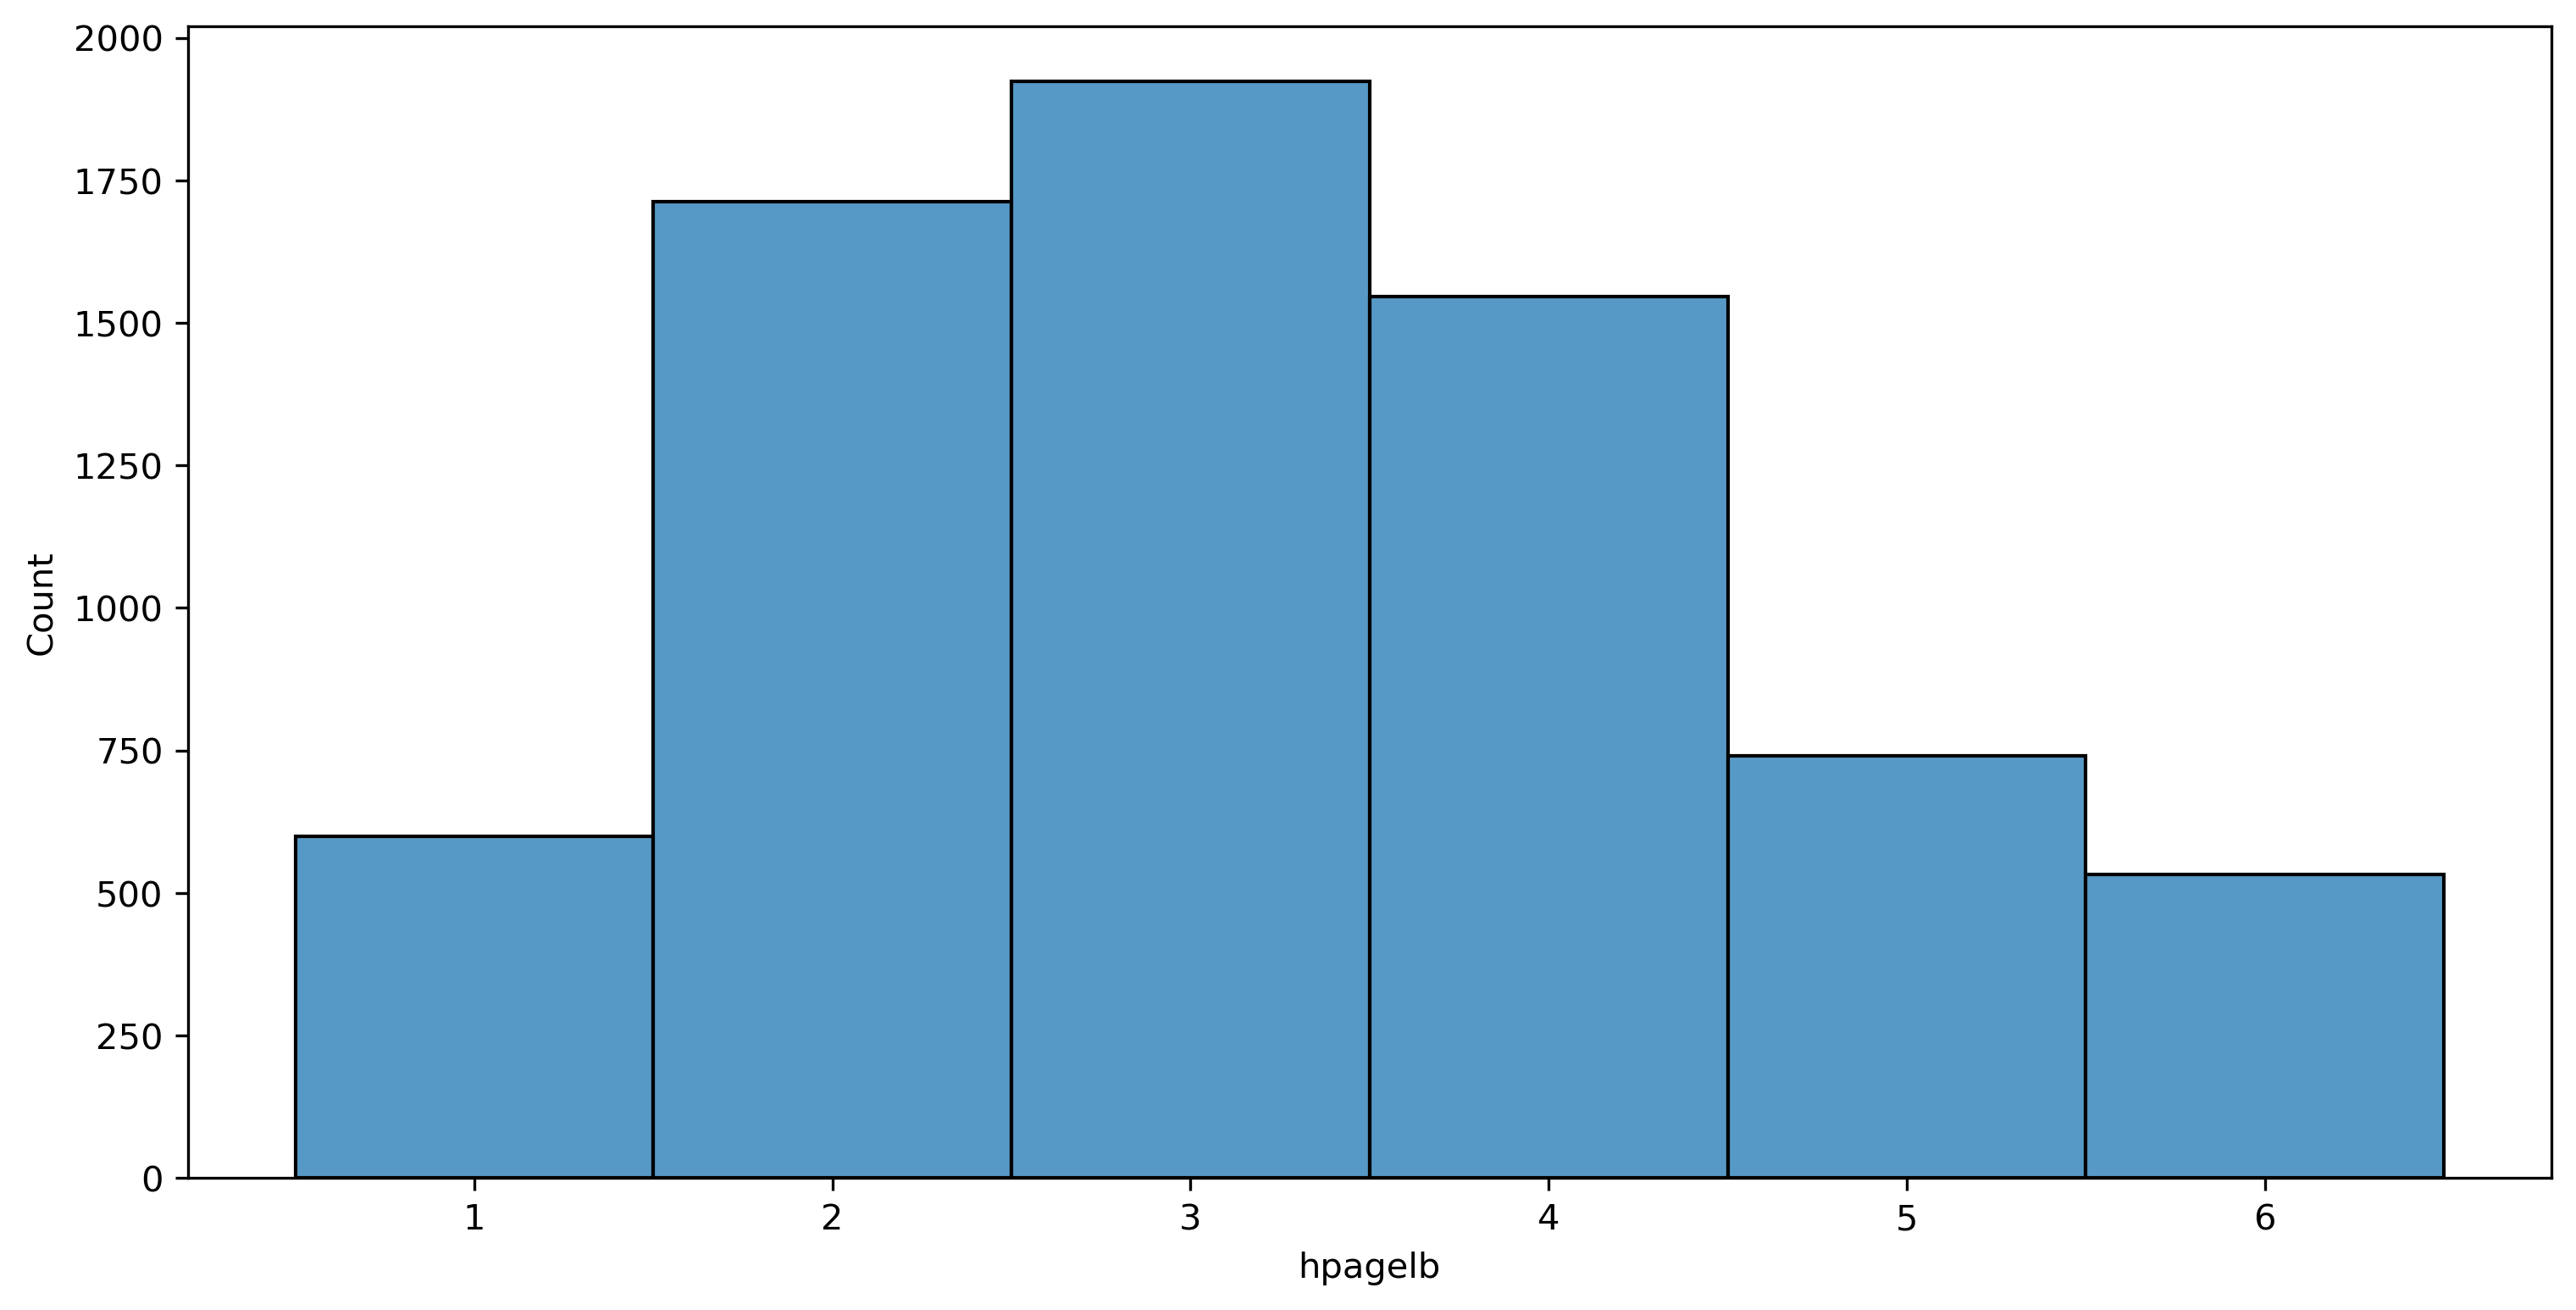

In [15]:
hist(pregnancy_data[features[1]], discrete=True, kde=False)

- ### csecprim
Is this R's first c-section? (cicerone)<br>

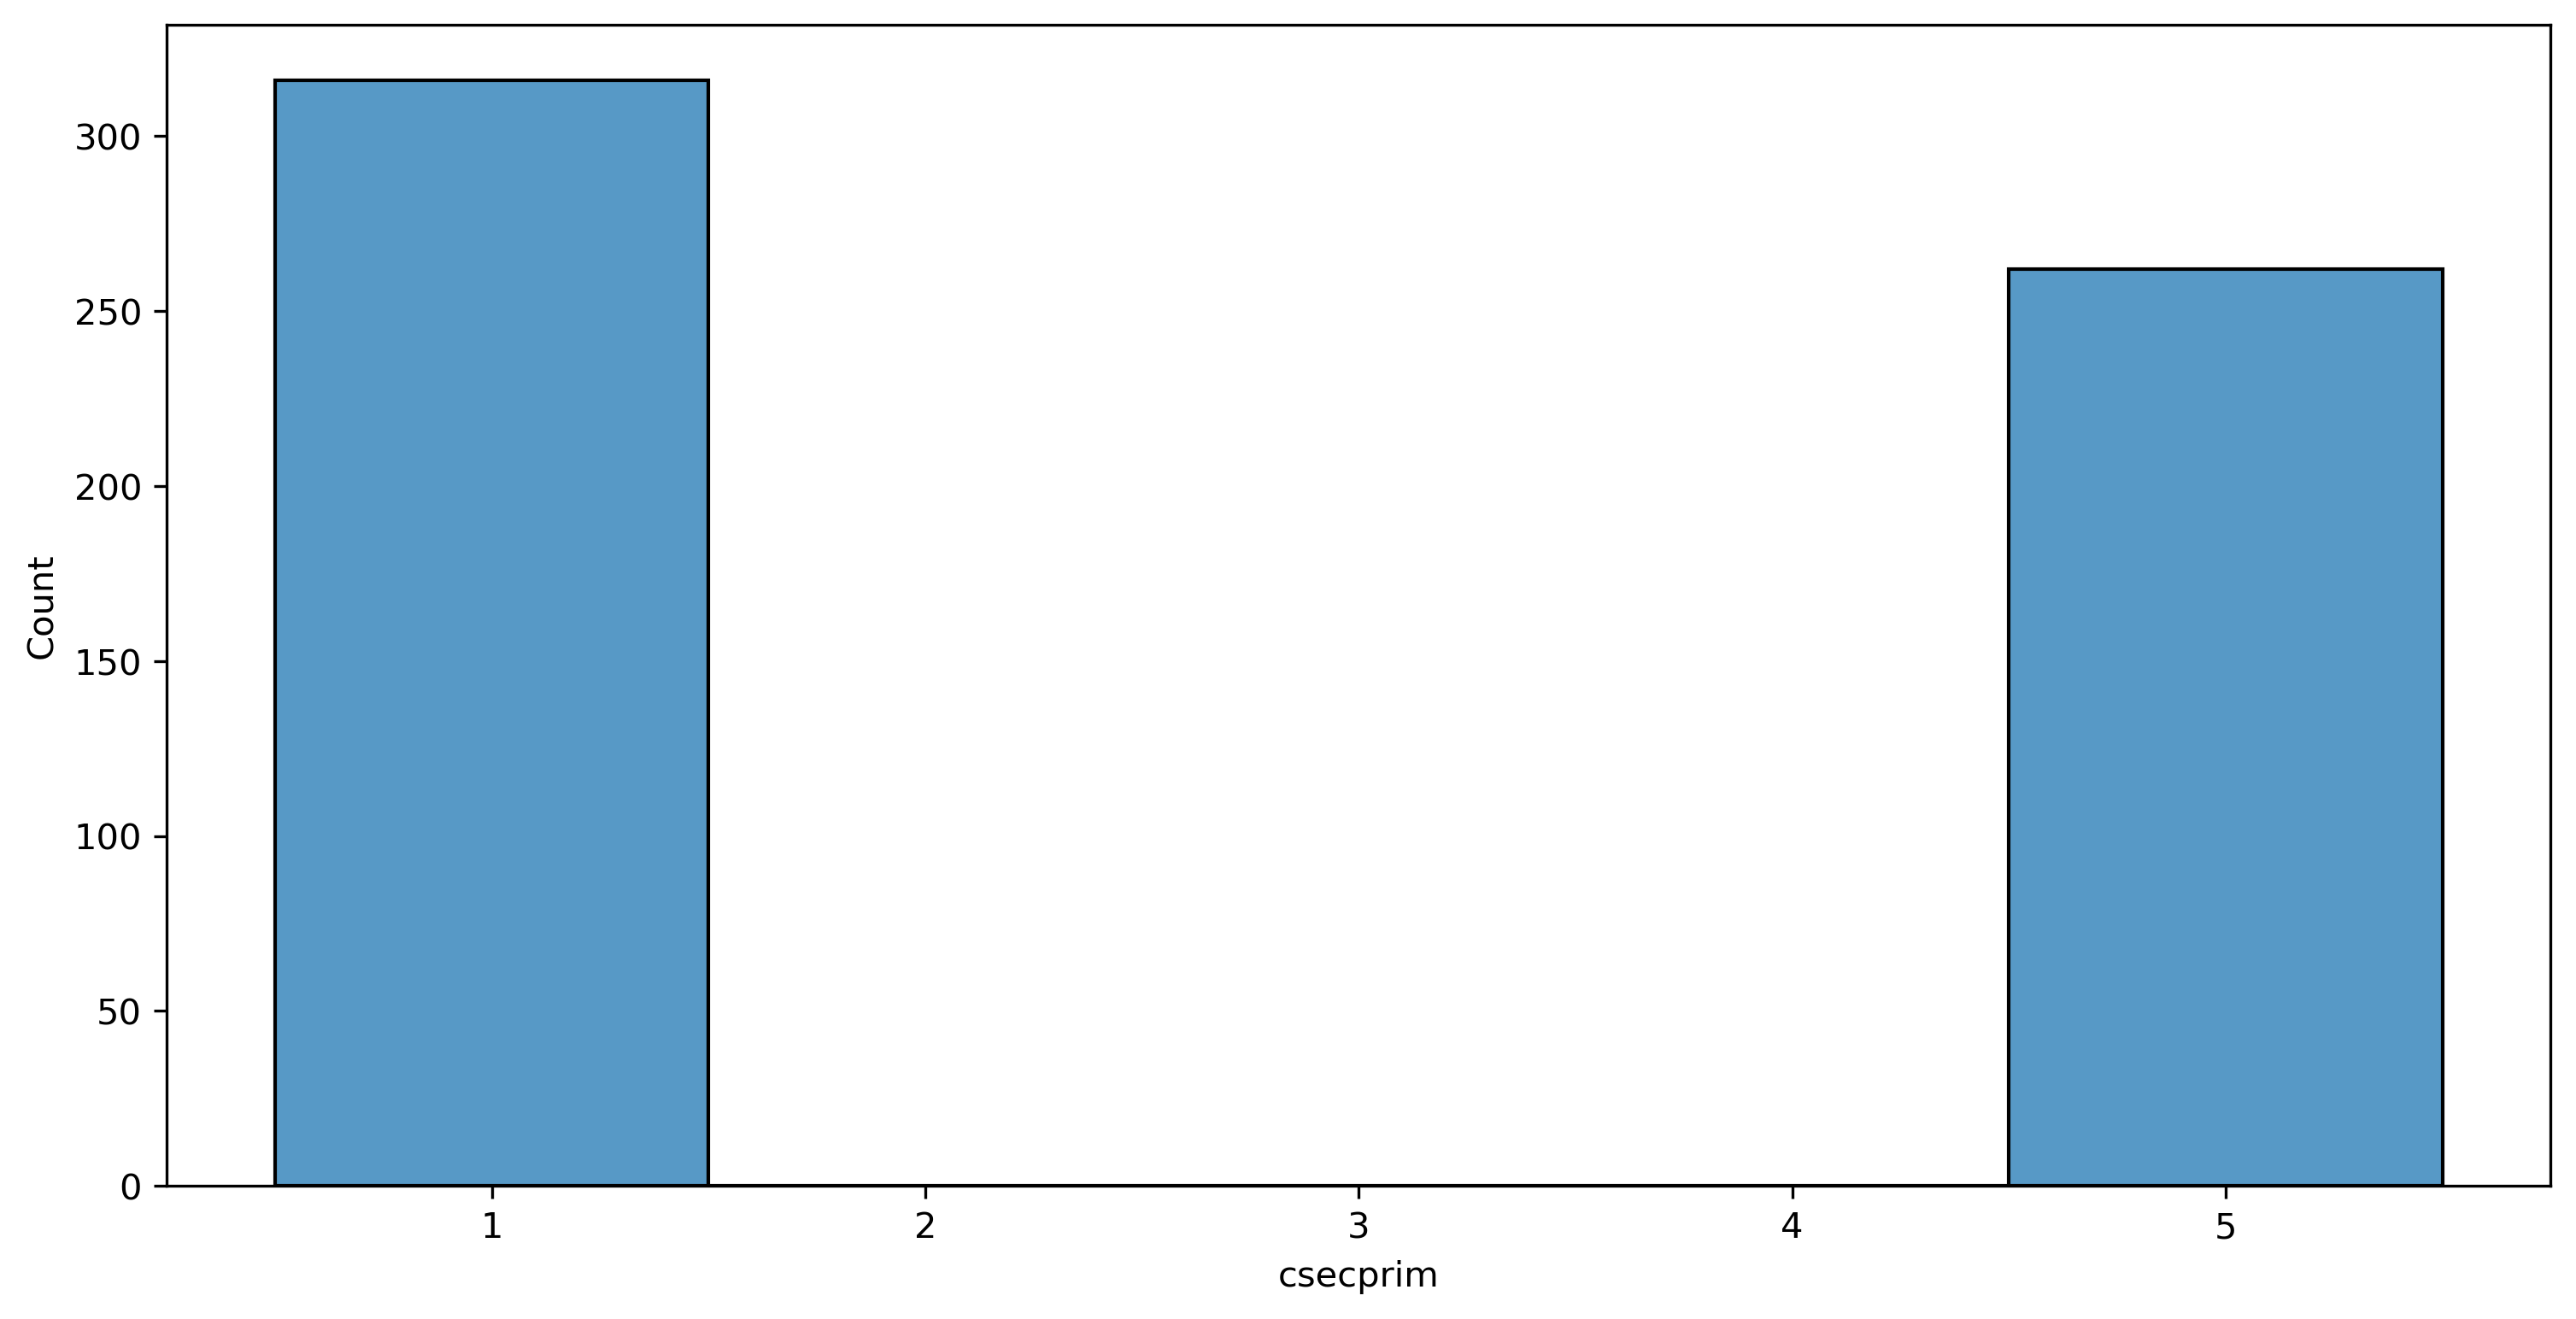

In [16]:
hist(pregnancy_data[features[2]], discrete=True, kde=False)

- ### priorsmk
Amount R smoked in 6 mos before R knew she was pregnant<br><br>
right skewed distribution, lower values are more possible.

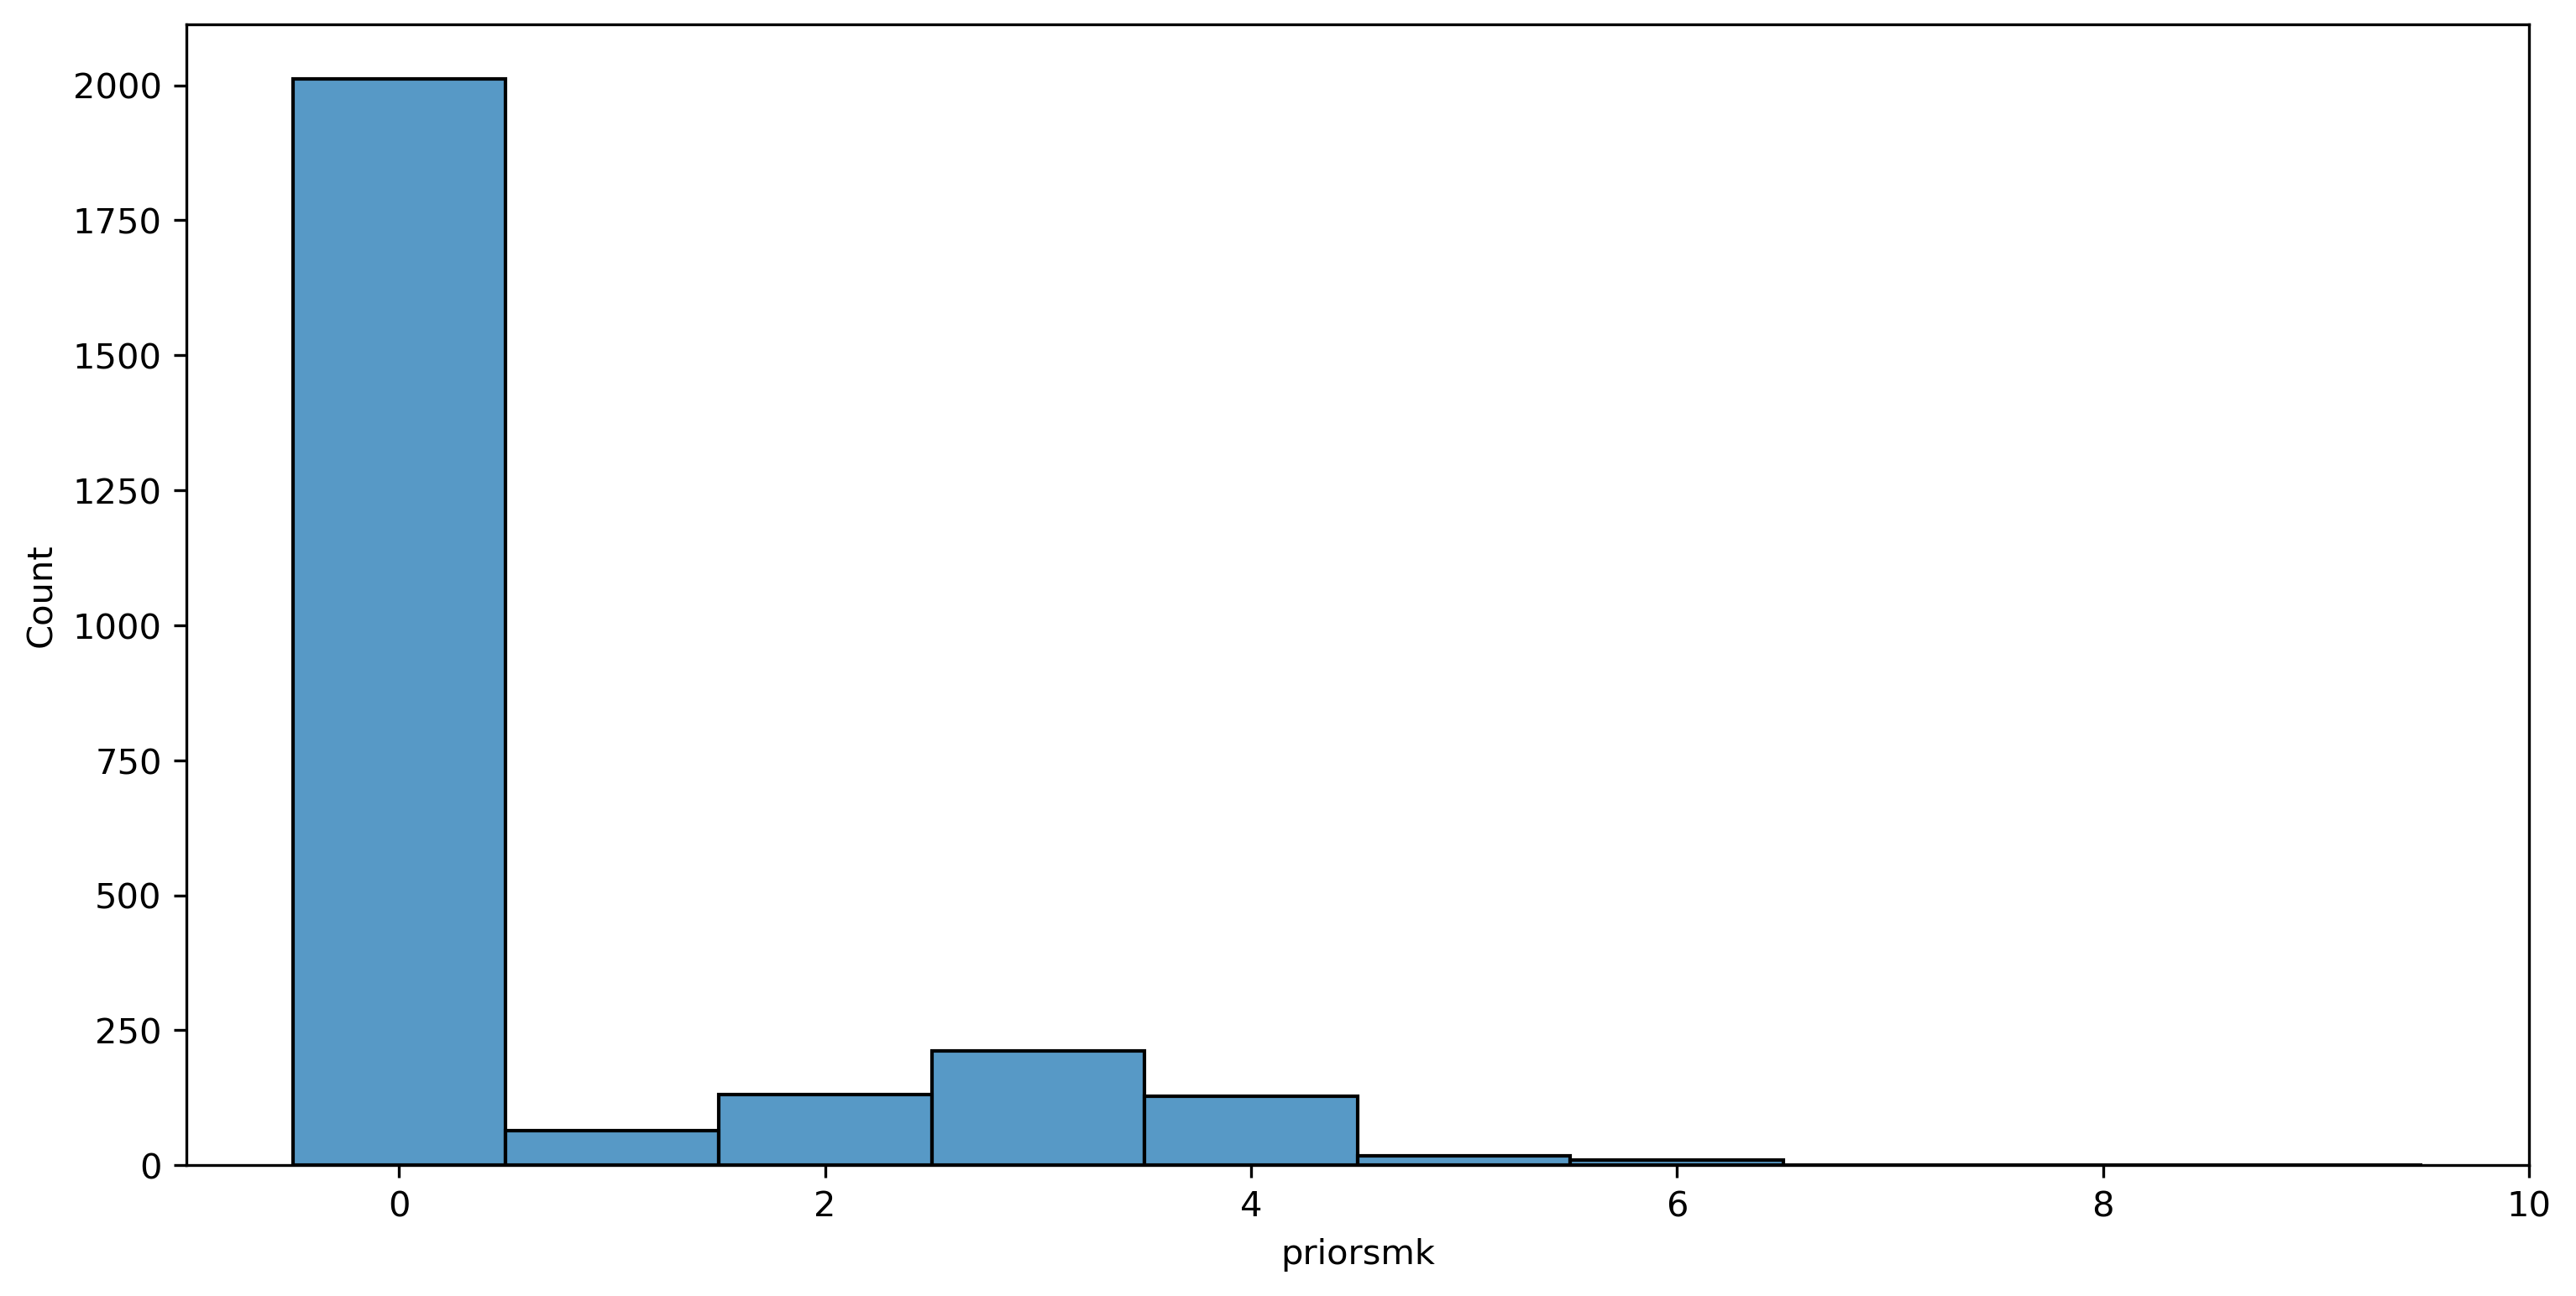

In [17]:
hist(pregnancy_data[features[3]], discrete=True, kde=False)

- ### outcome
Pregnancy outcome<br><br>
right skewed, live births are more commen

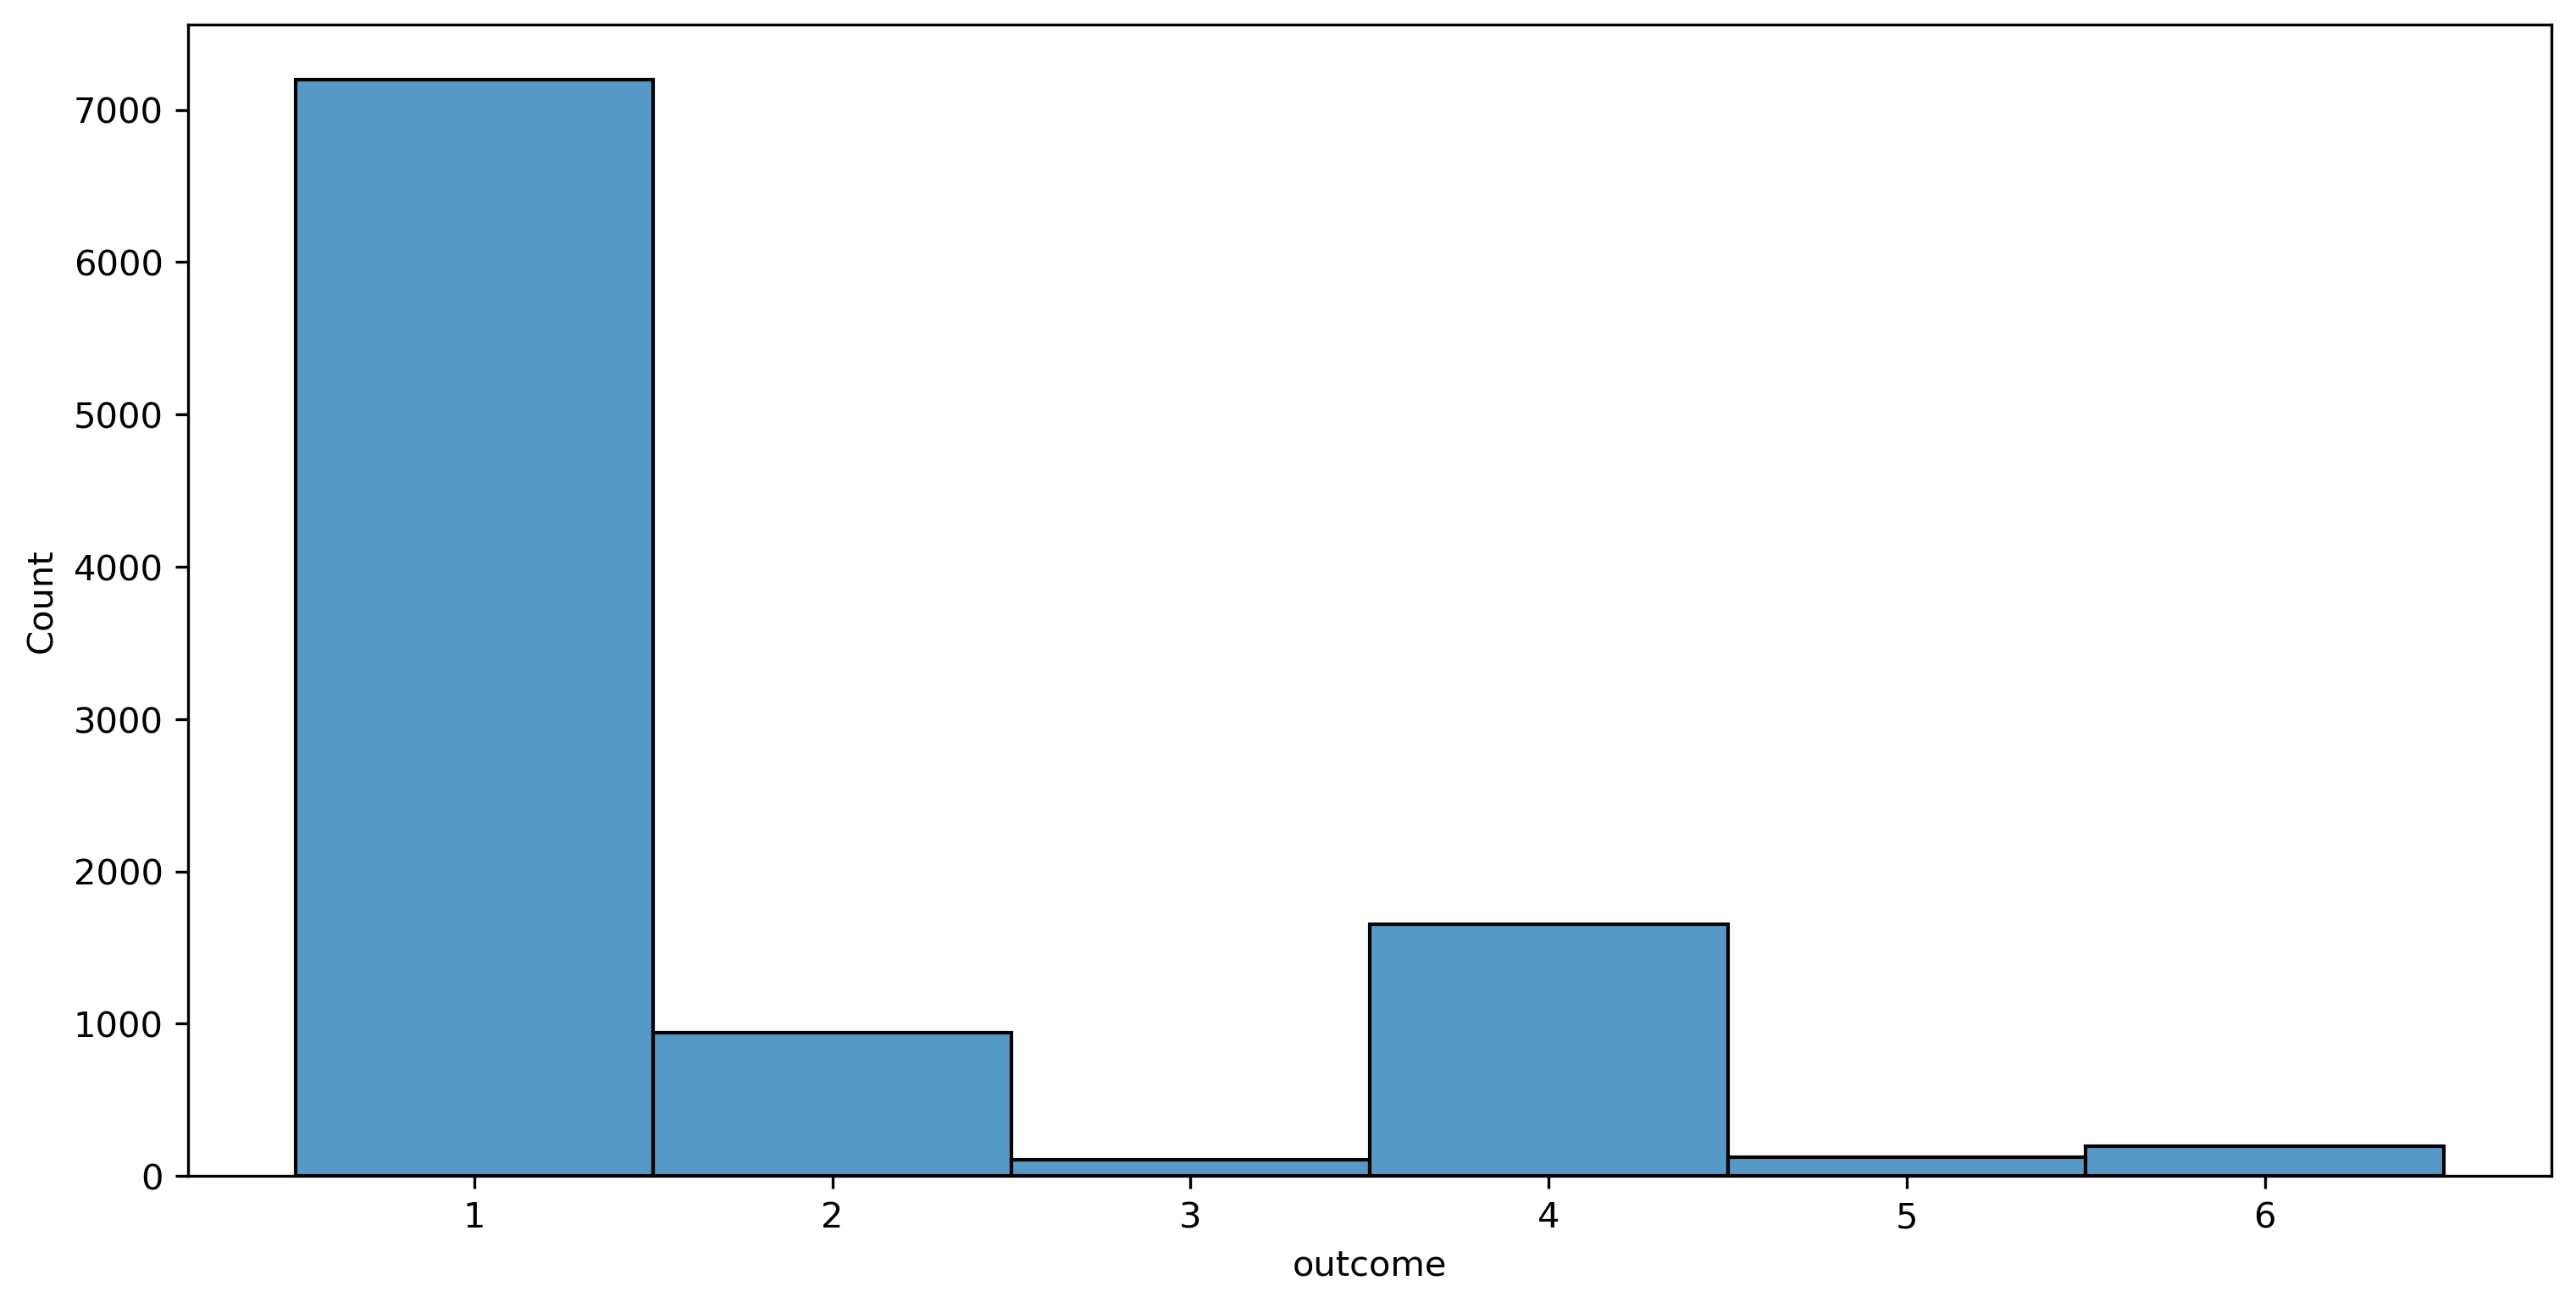

In [18]:
hist(pregnancy_data[features[4]], discrete=True, kde=False)

- ### agecon
Age at time of conception<br><br>
very close to normal distribution, most of the mothers are in their 20's

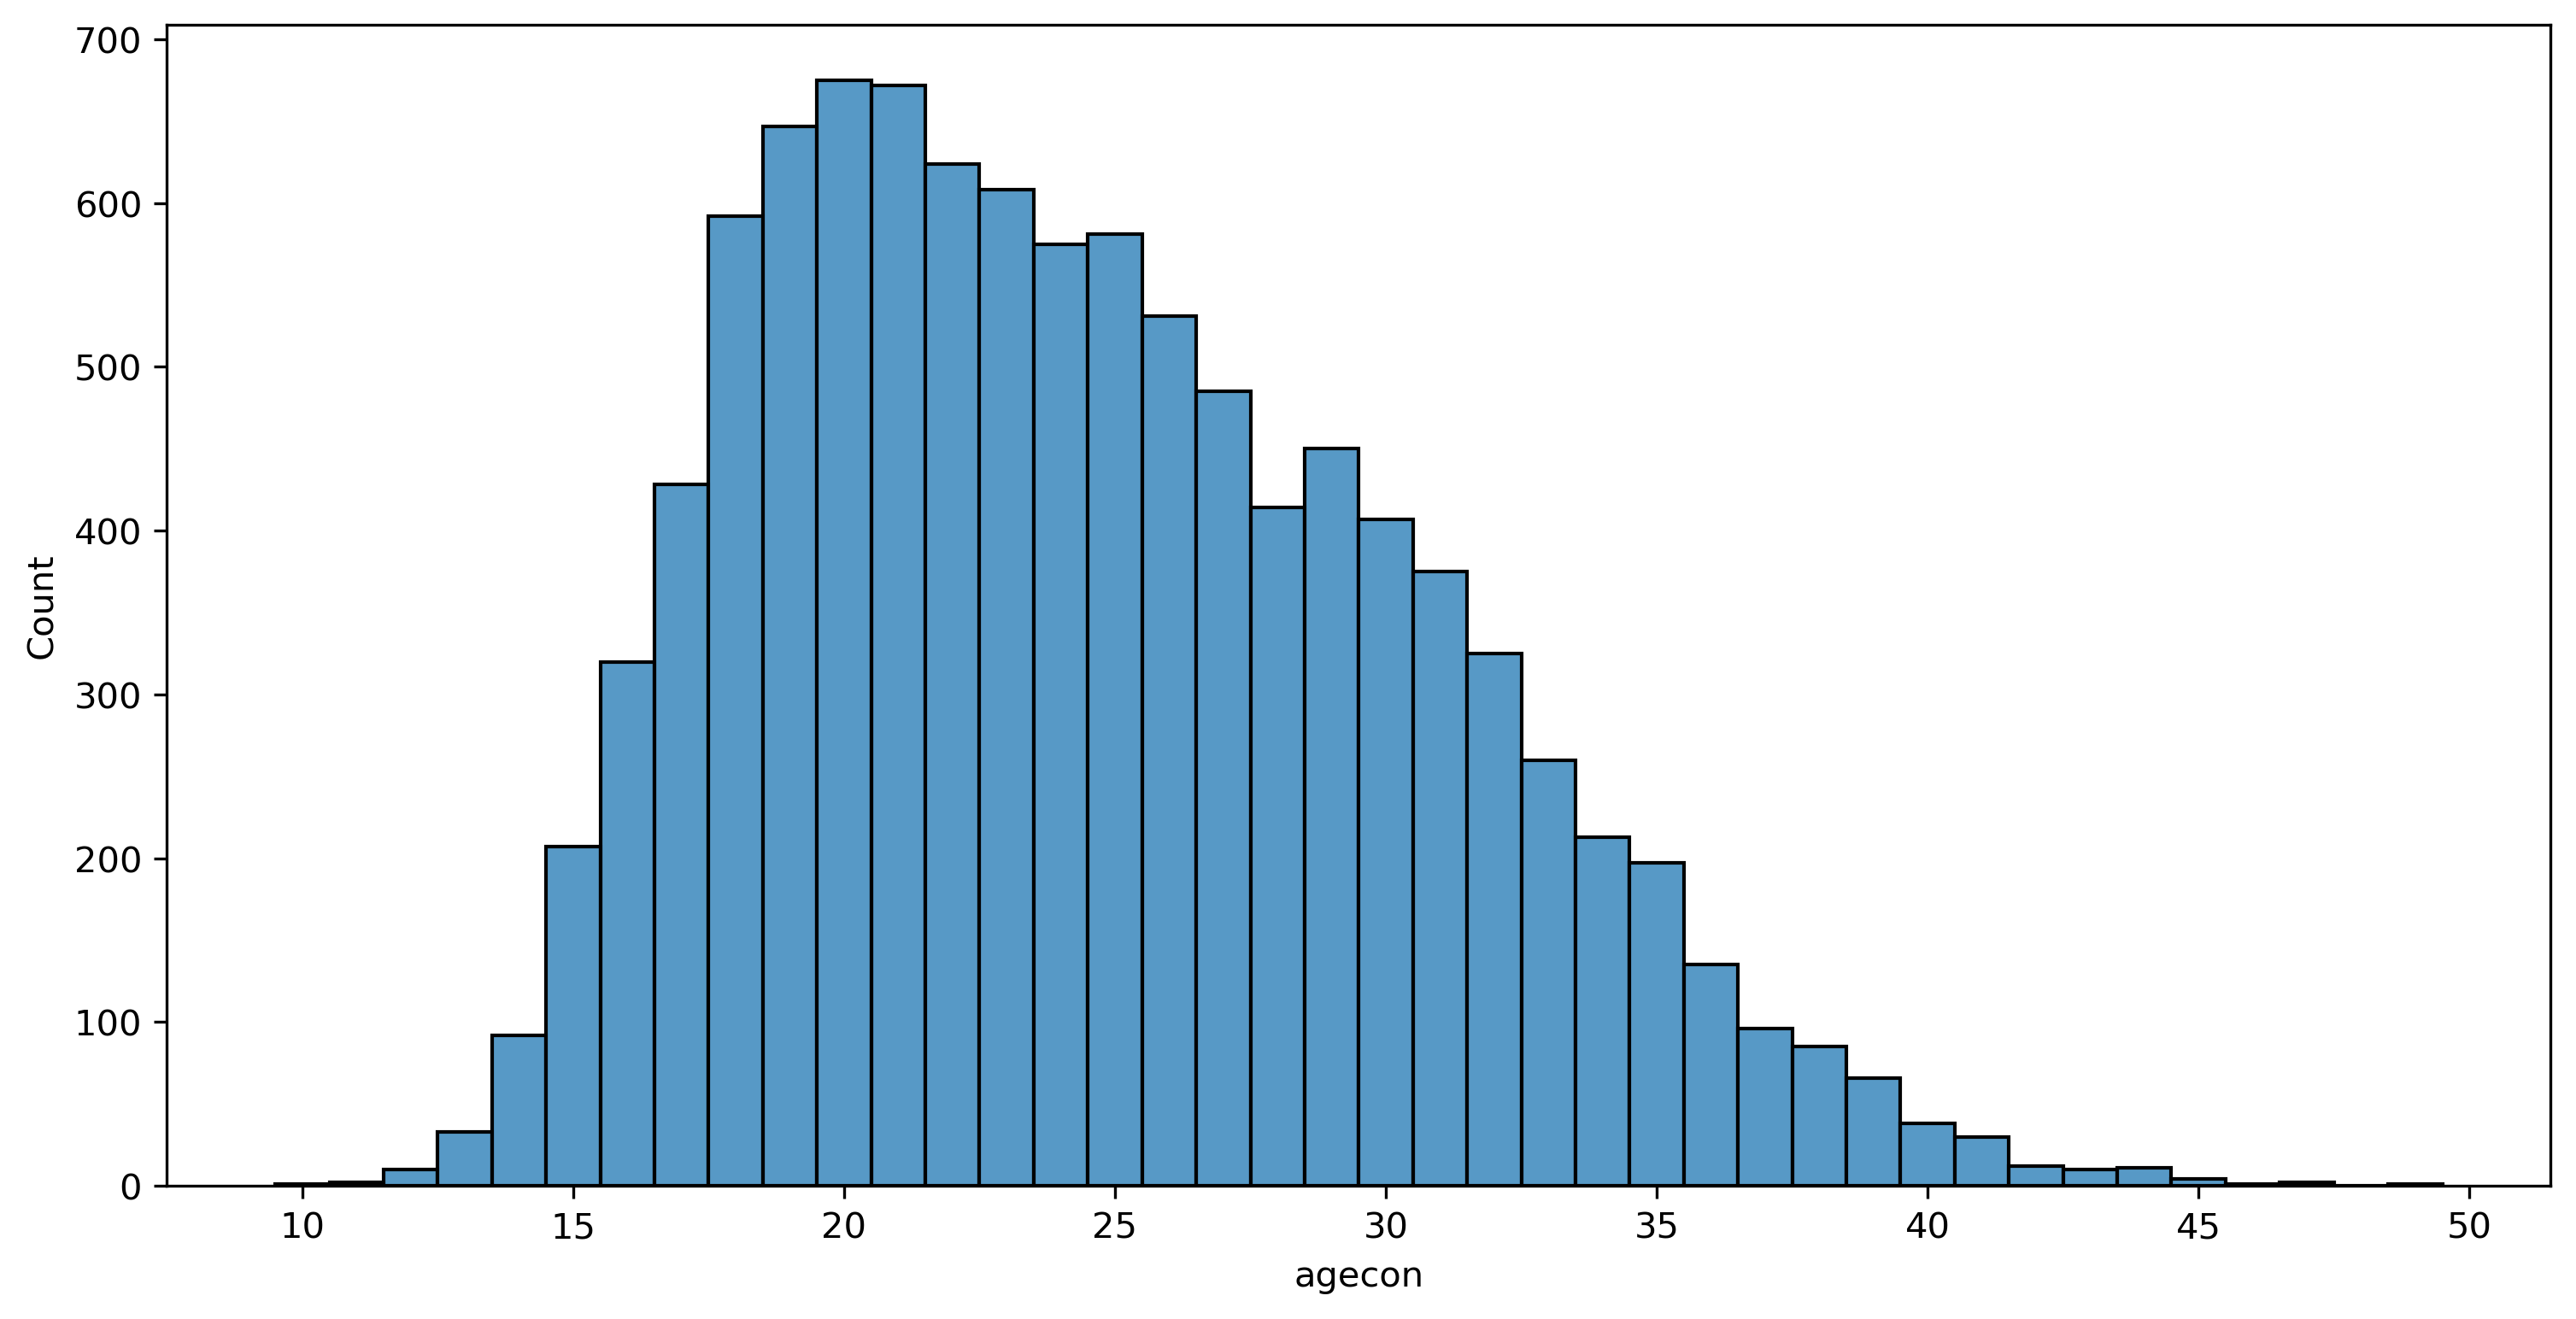

In [19]:
hist(pregnancy_data[features[5]], discrete=True, kde=False)

- ### learnprg
Number of weeks pregnant when R learned she was pregnant

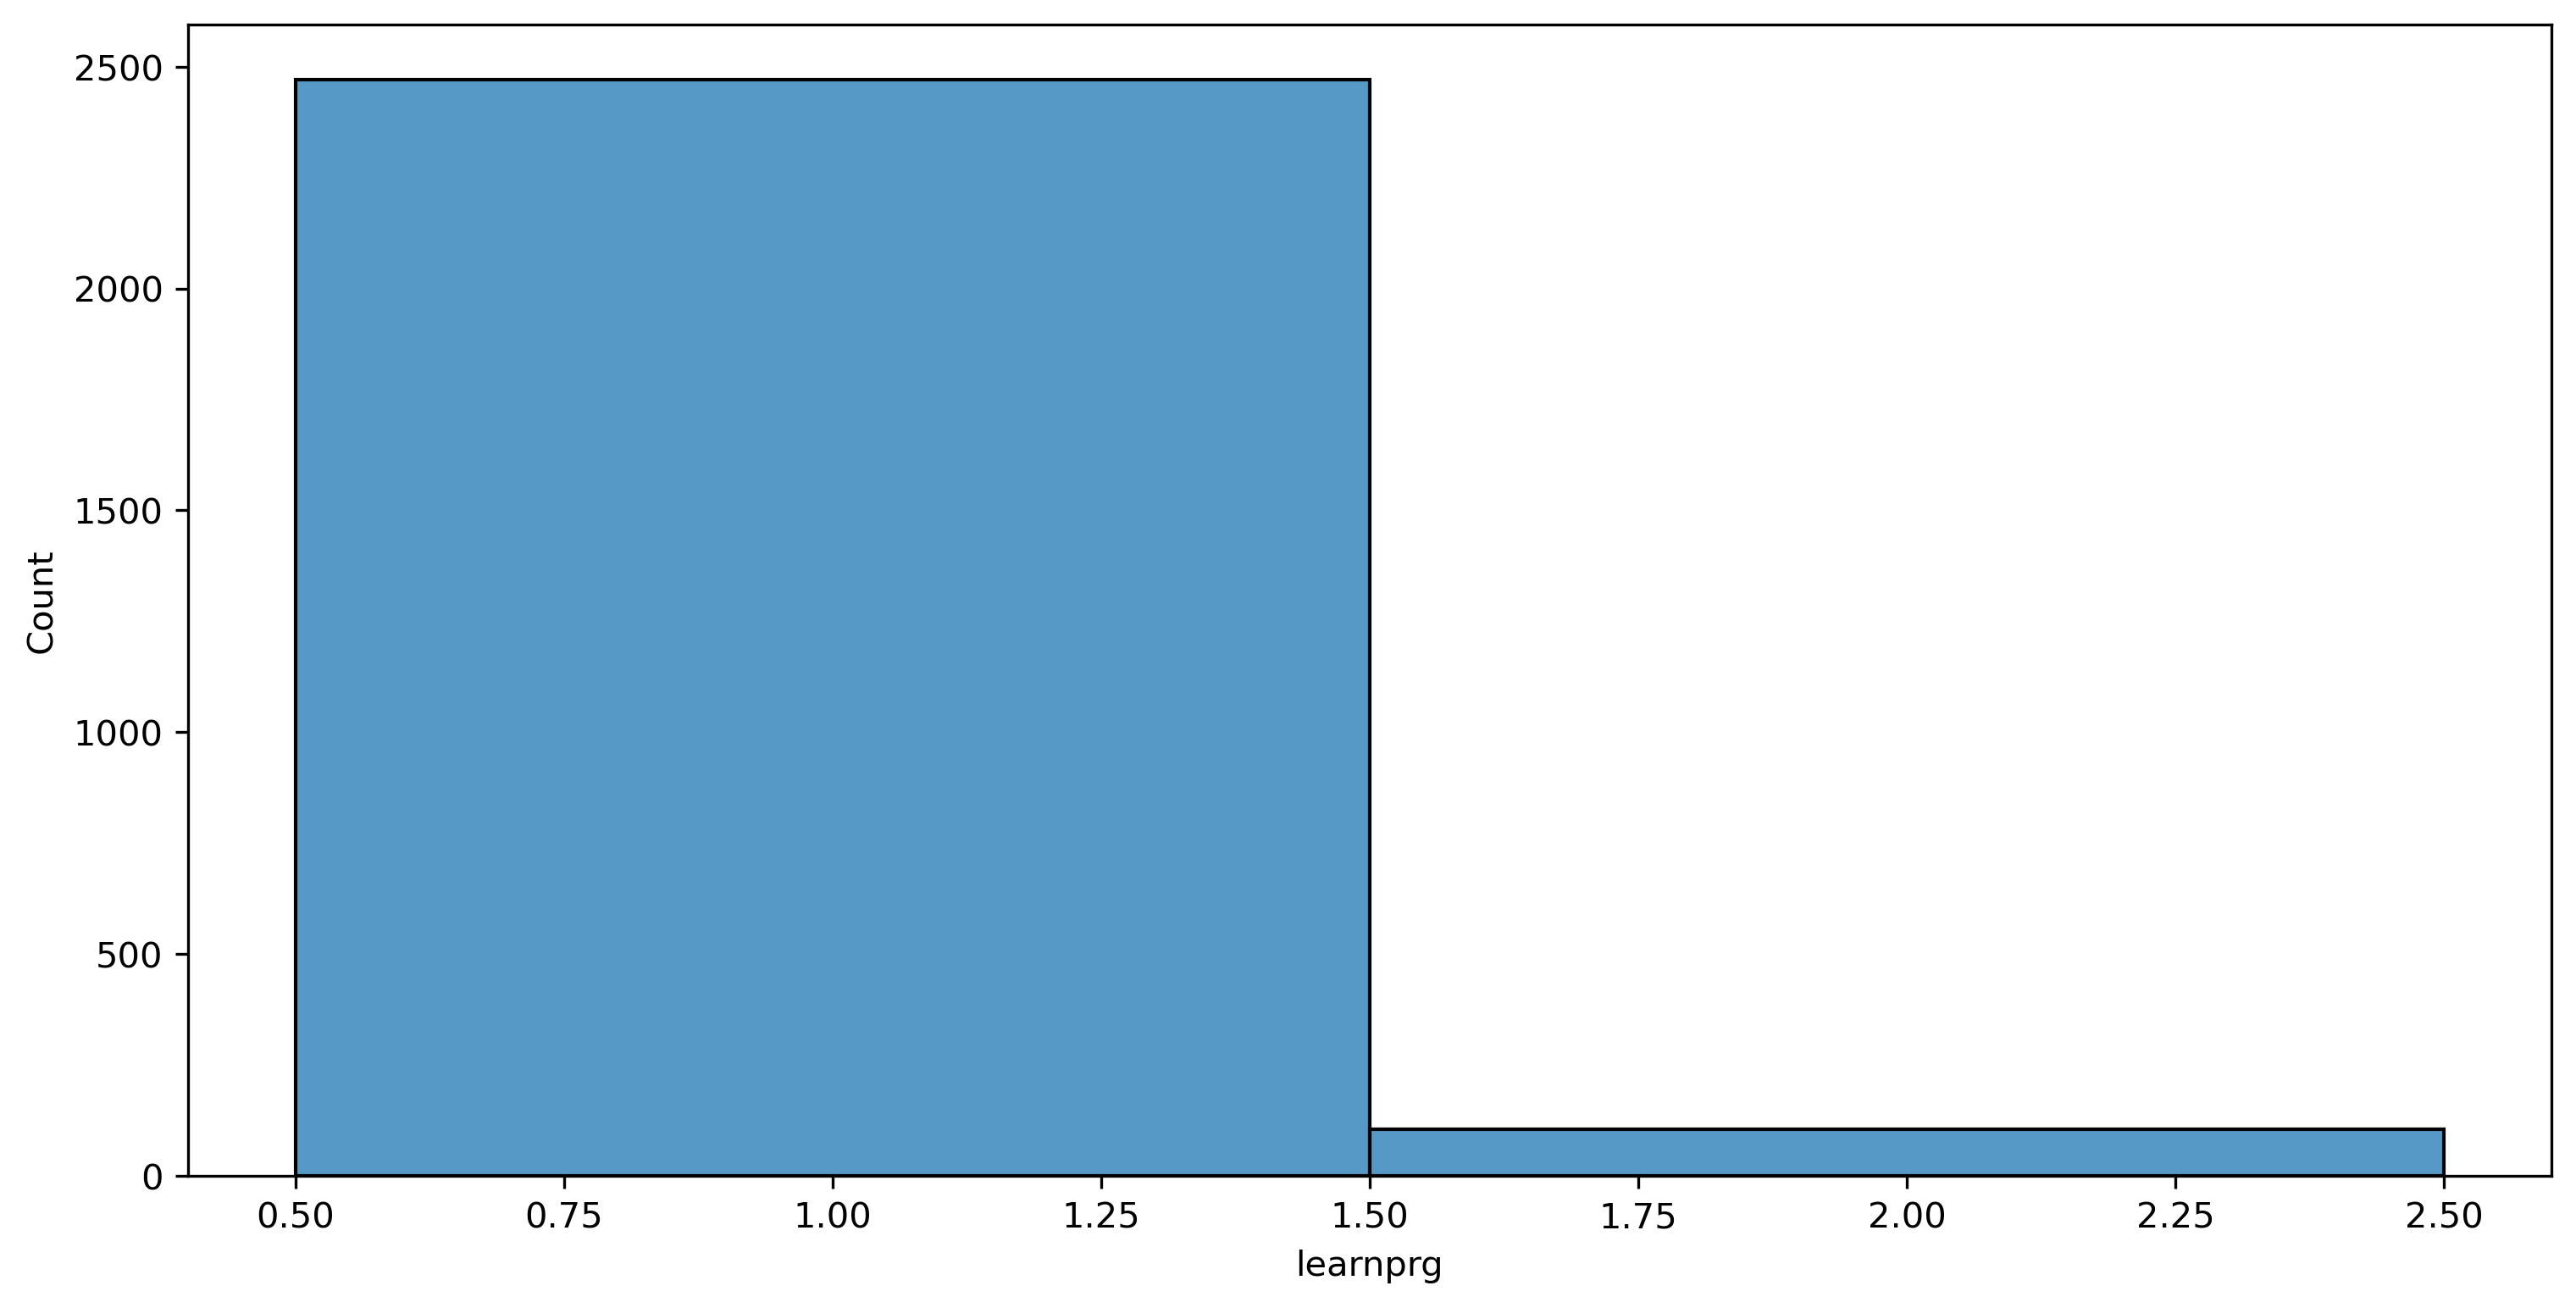

In [20]:
hist(pregnancy_data[features[6]], discrete=True, kde=False)

- ### pncarewk
Number of weeks pregnant at first prenatal care<br><br>
right skewed, small values more common. most of them know before 13 weeks or early.

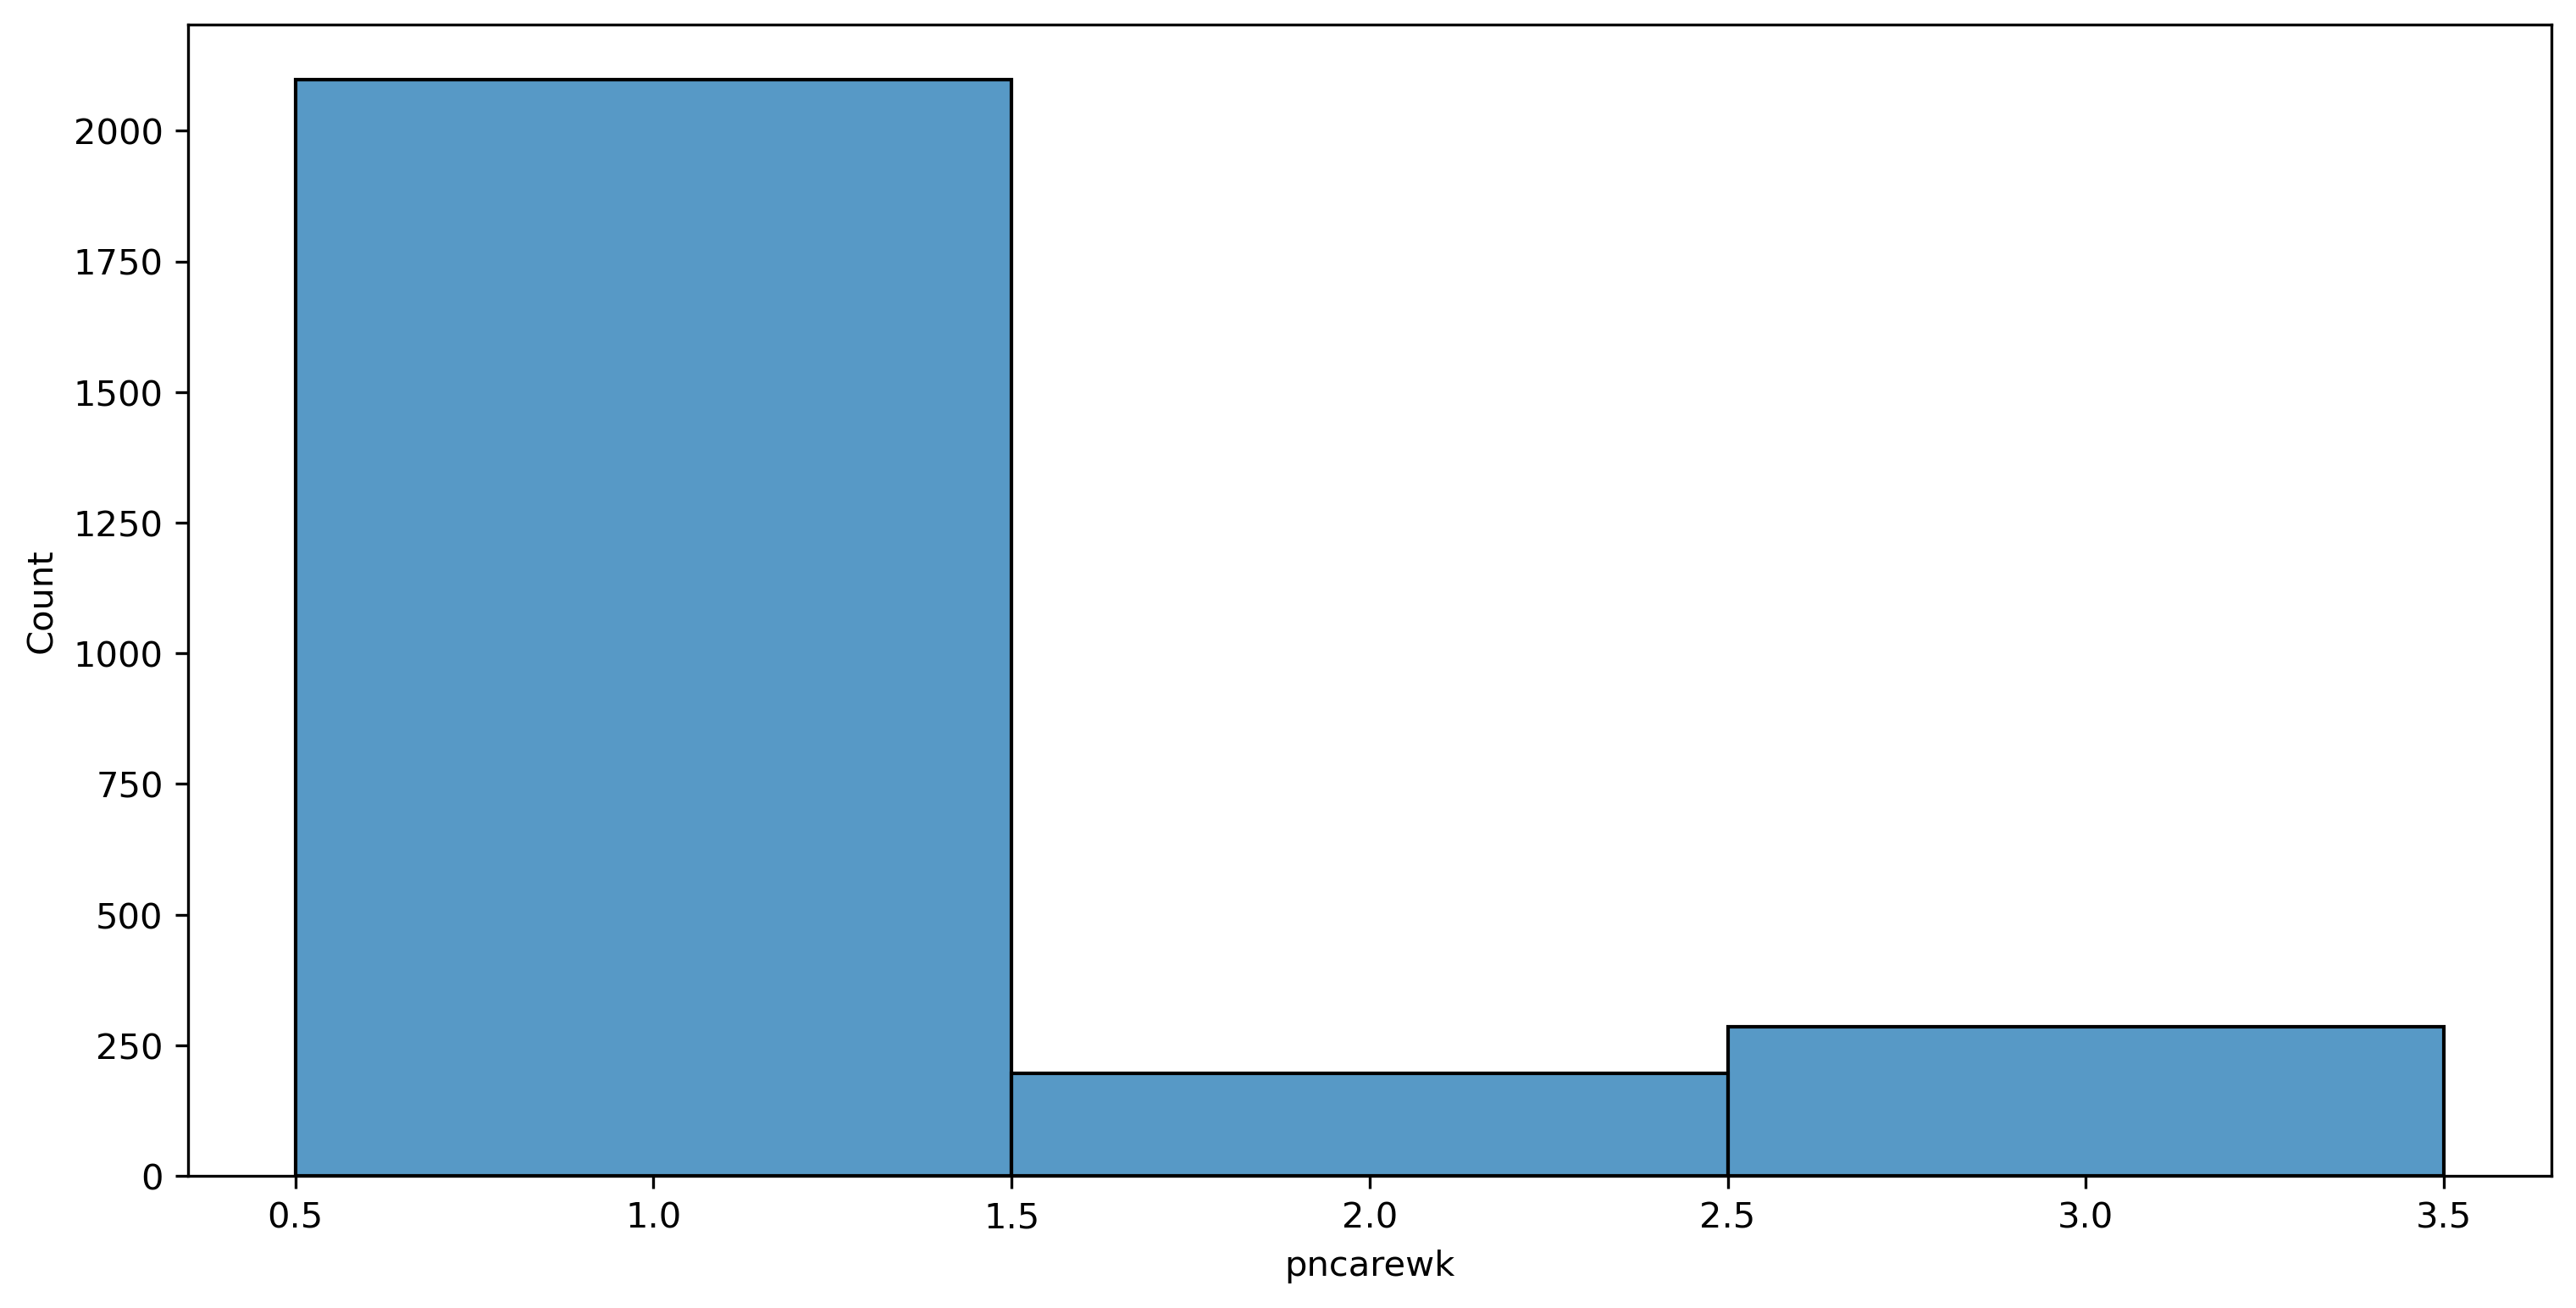

In [21]:
hist(pregnancy_data[features[7]], discrete=True, kde=False)

- ### lbw1
Low birthweight - 1st baby from this preg

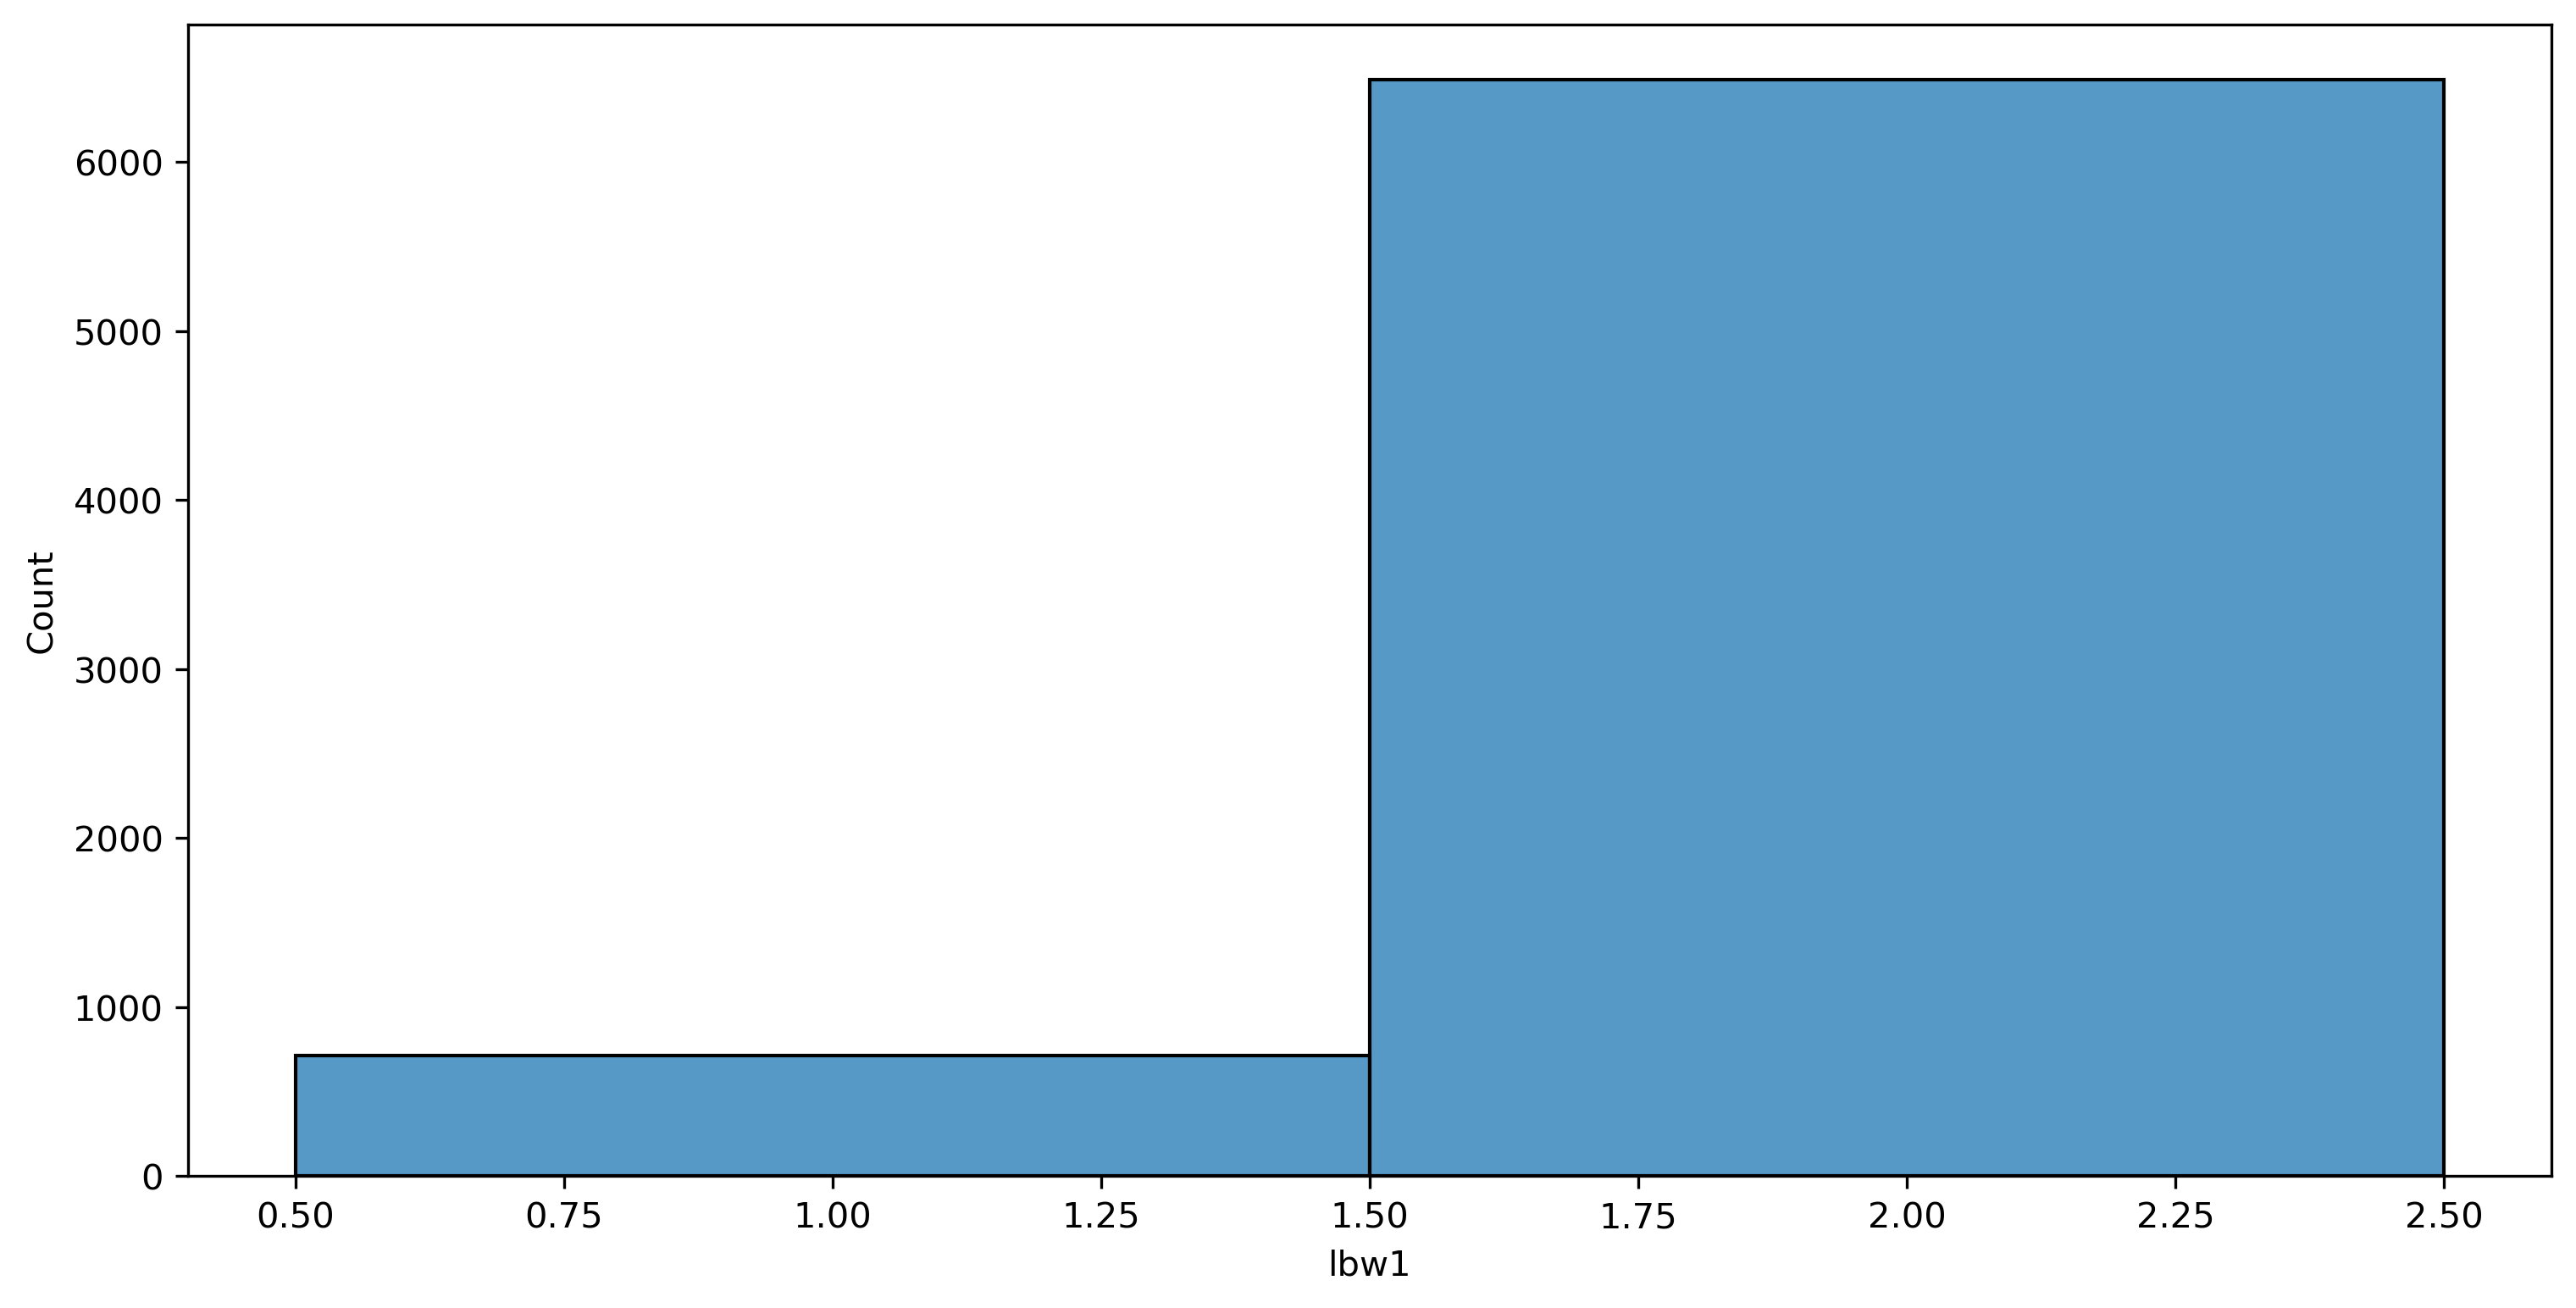

In [22]:
hist(pregnancy_data[features[8]], discrete=True, kde=False)

- ### postsmks
R smoked at all after R knew she was pregnant

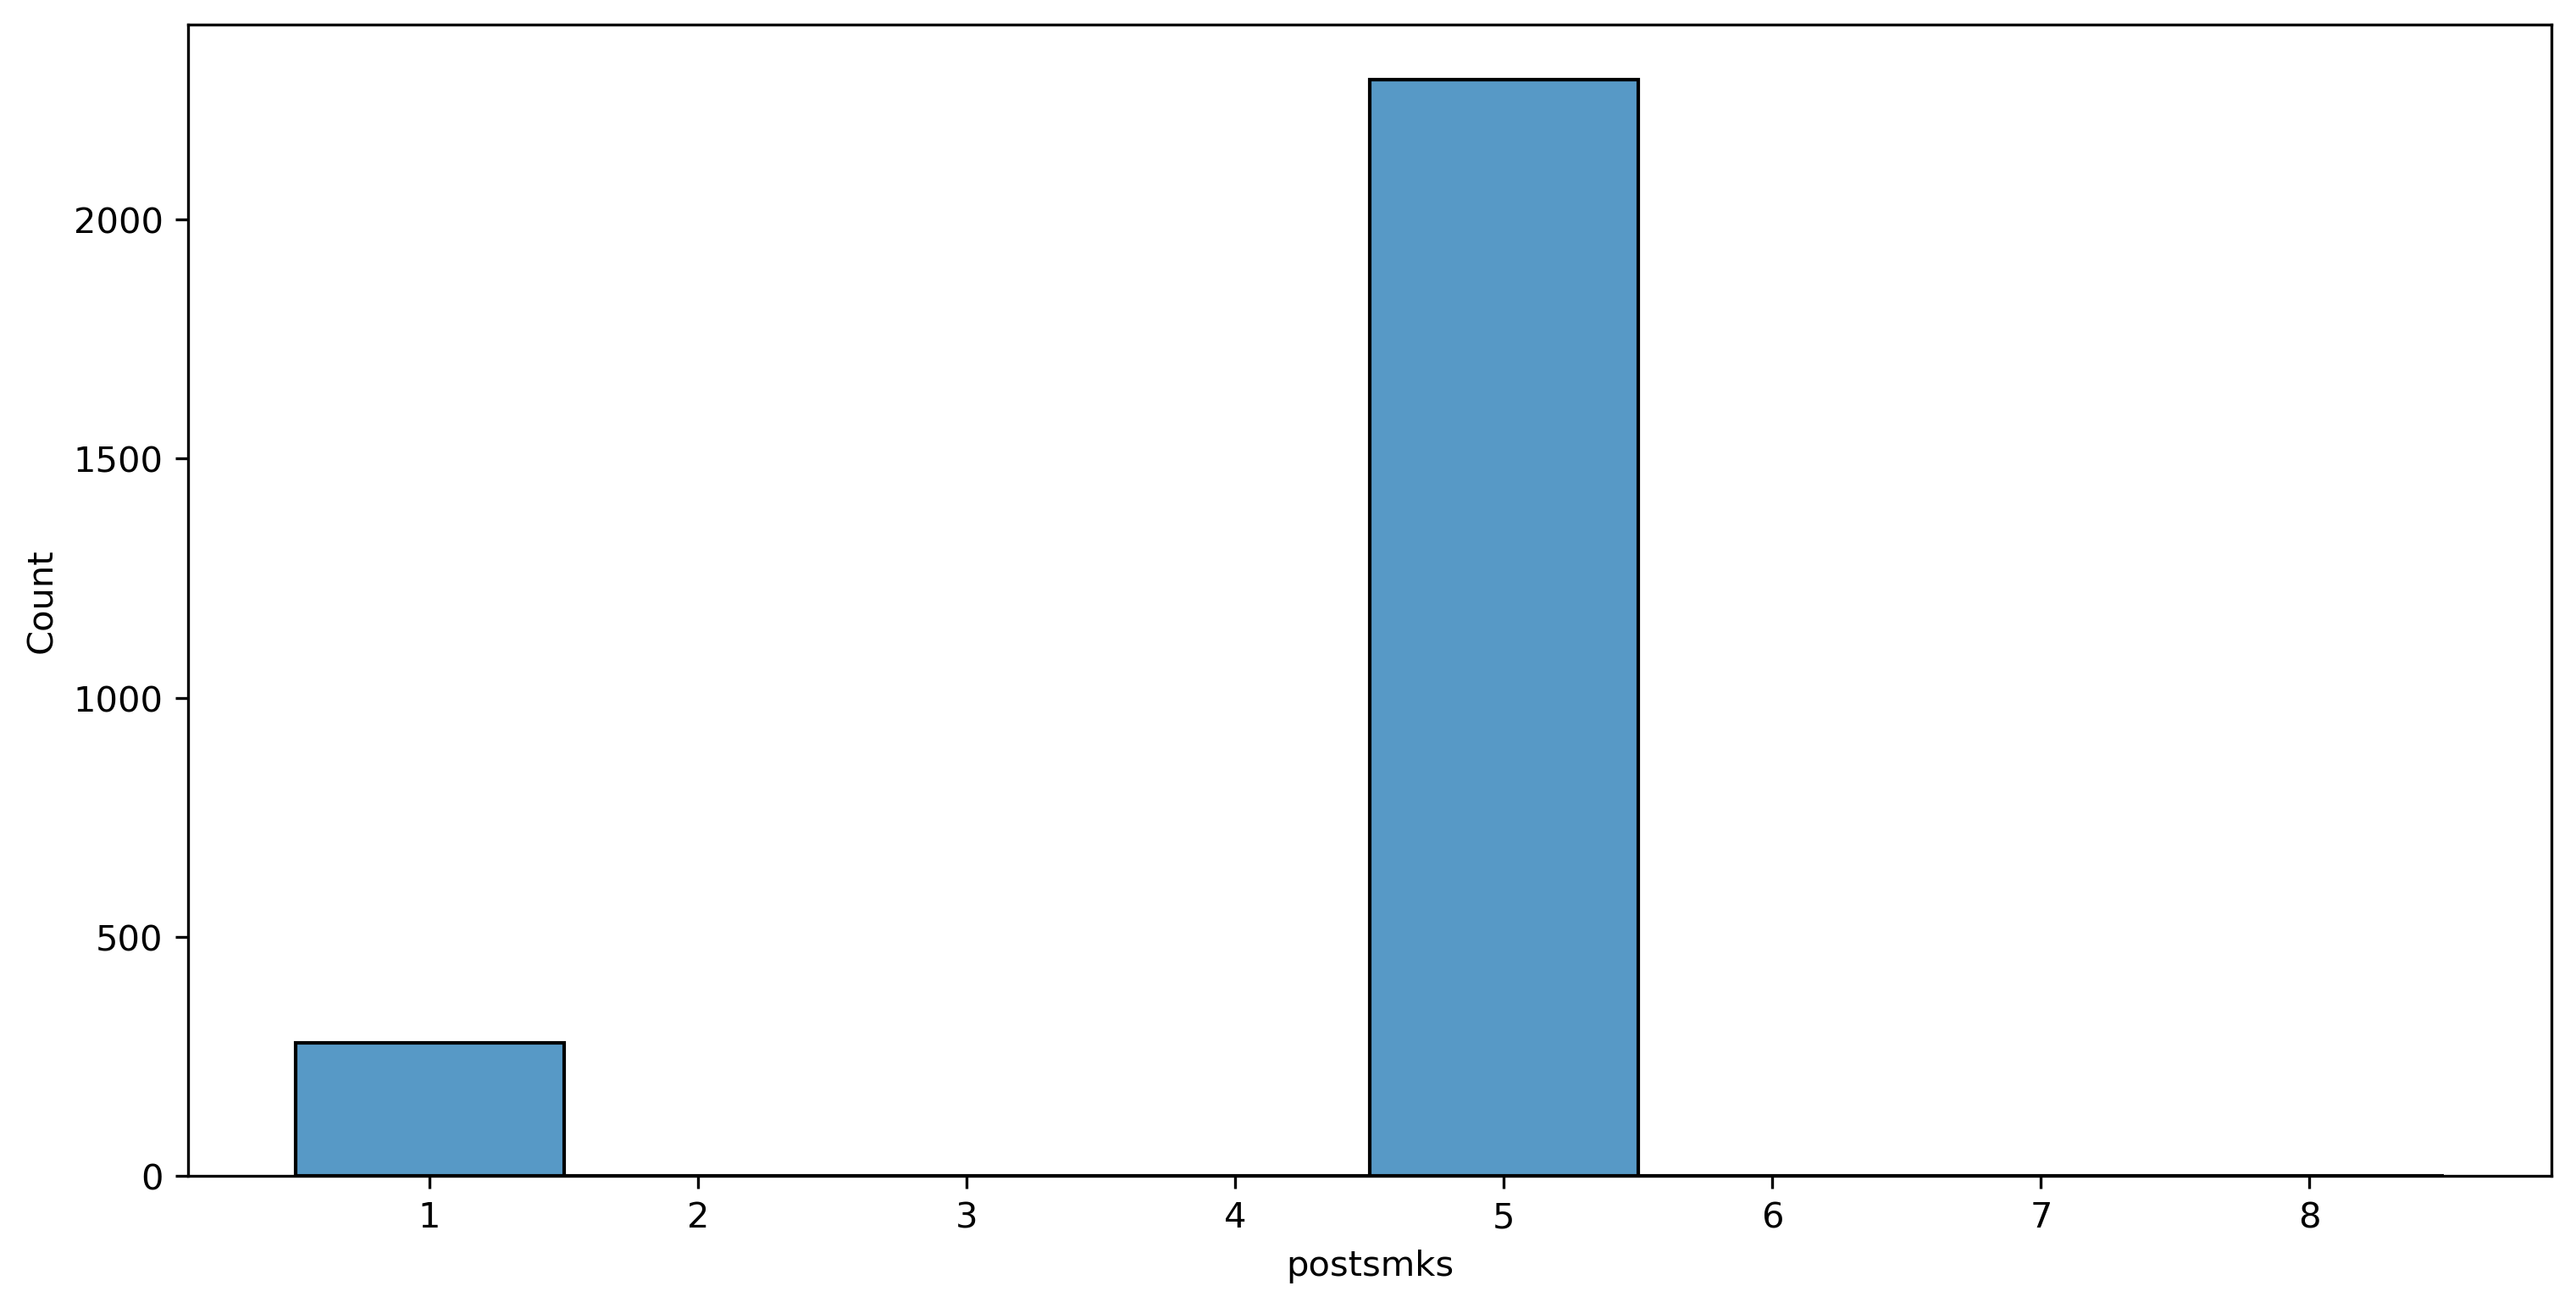

In [23]:
hist(pregnancy_data[features[9]], discrete=True, kde=False)

- ### npostsmk
Amount R smoked during pregnancy after R knew she was preg<br><br>
right skewed

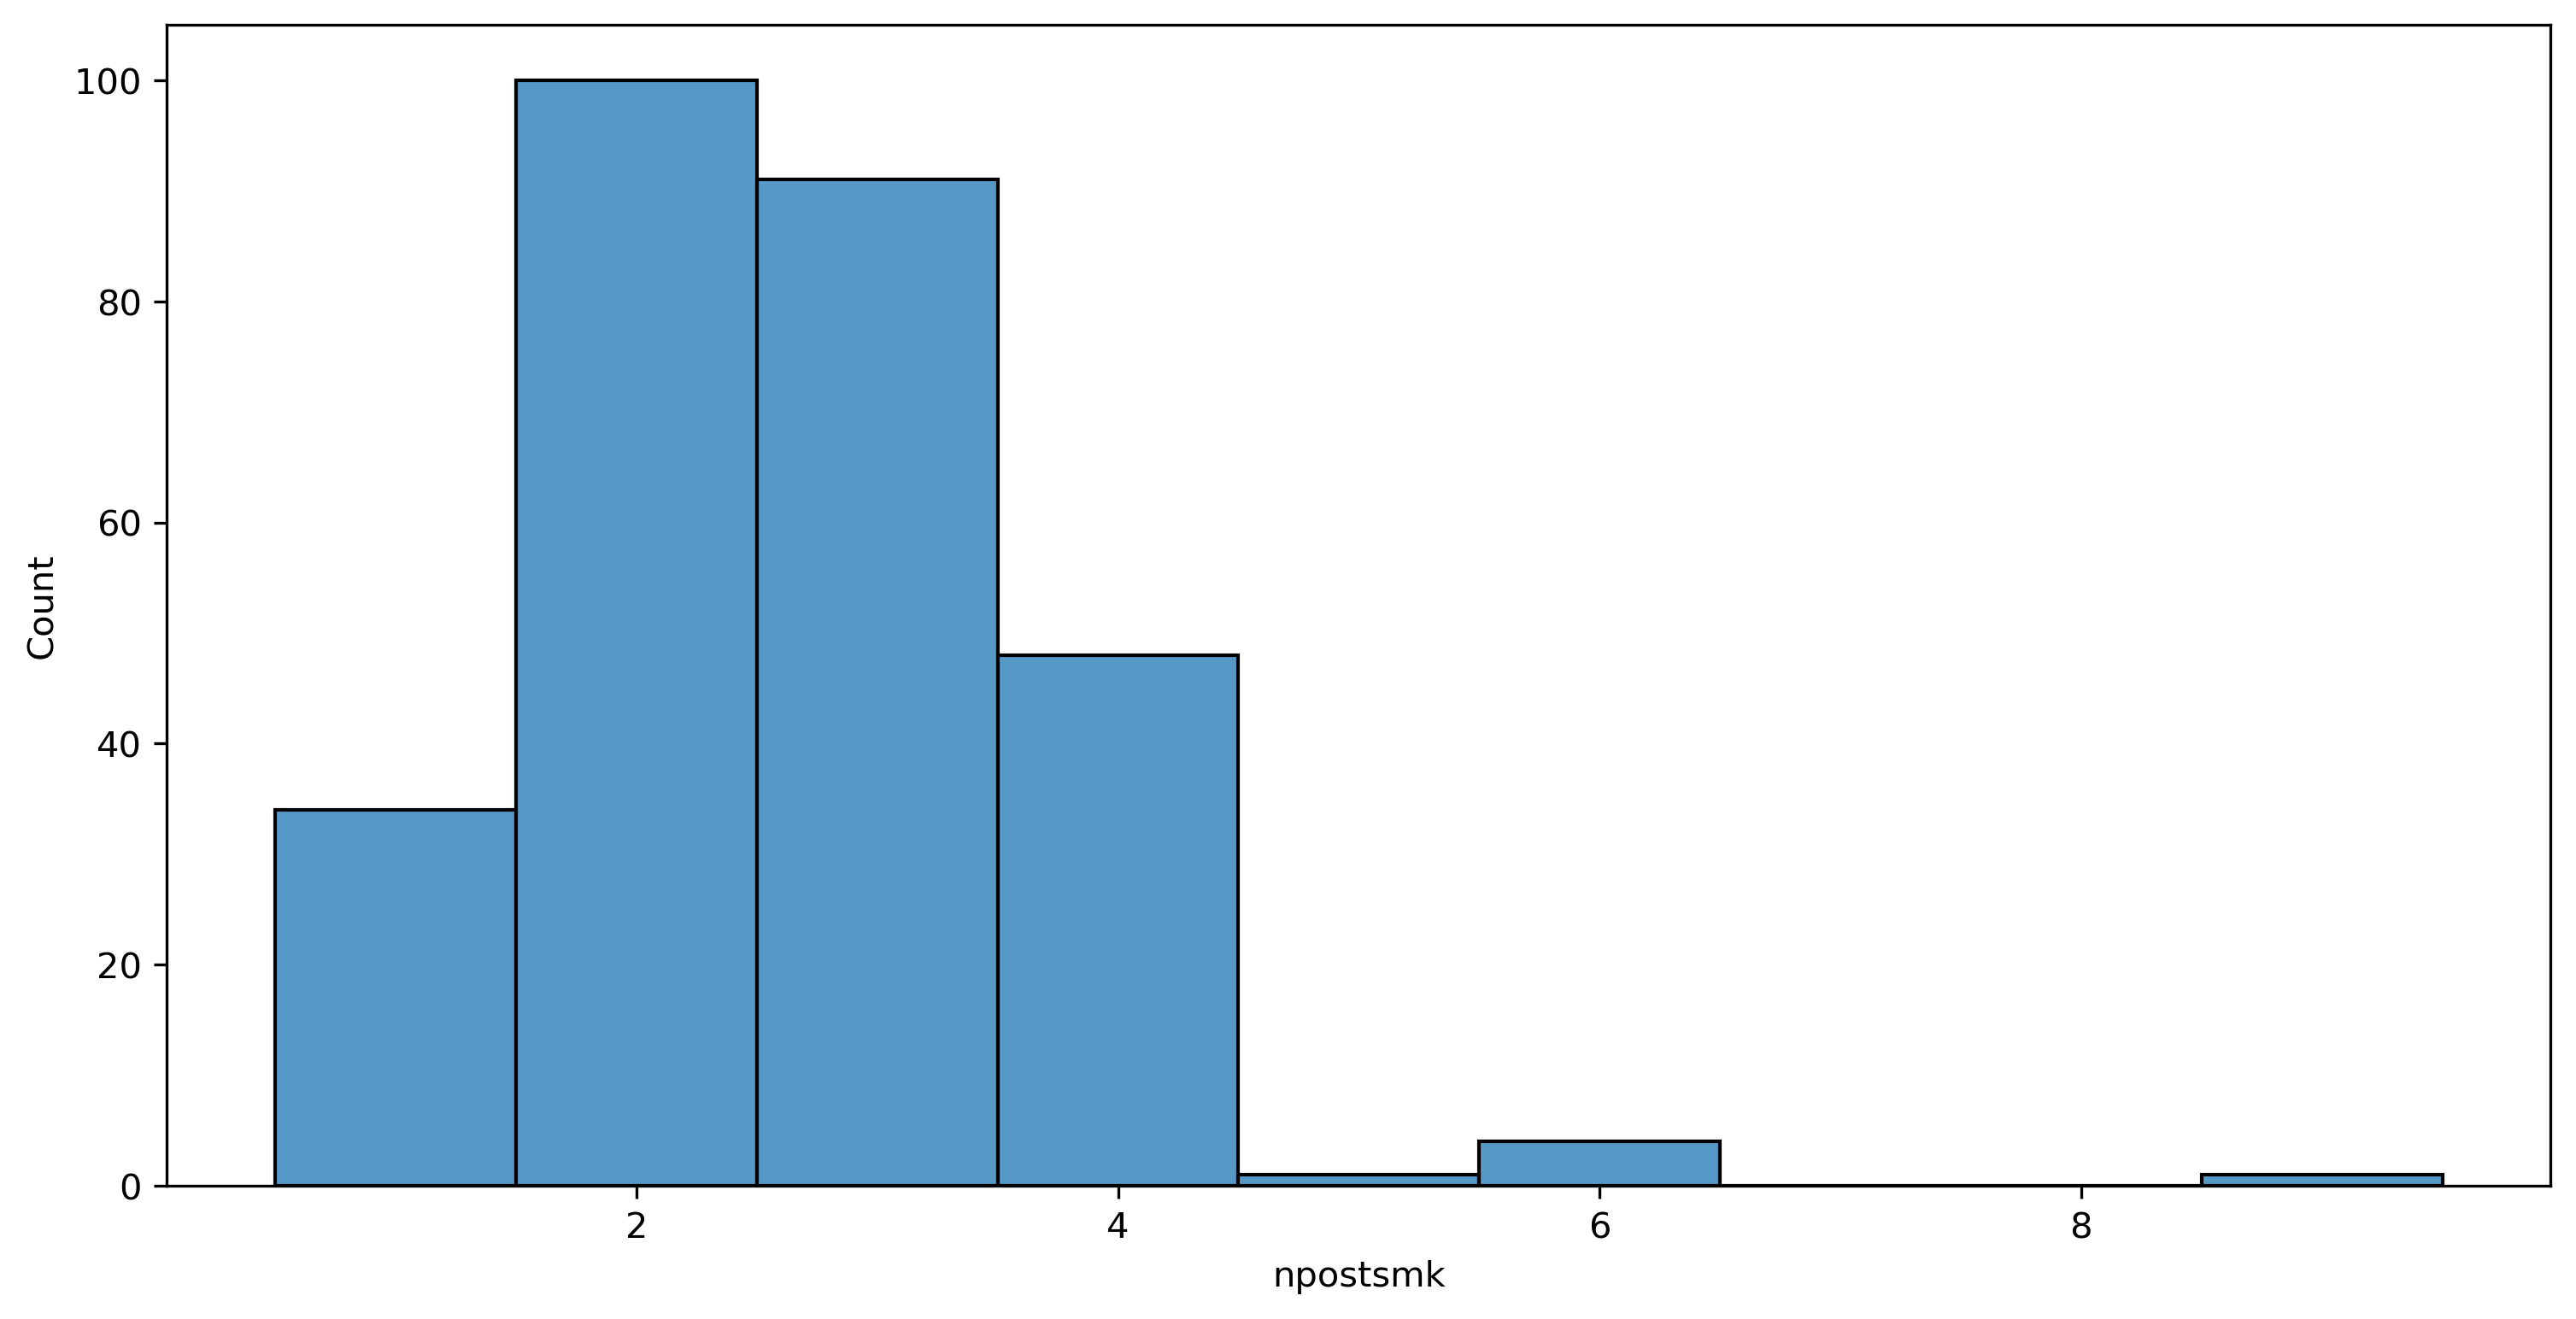

In [24]:
hist(pregnancy_data[features[10]], discrete=True, kde=False)

- ### feelinpg
How happy to be preg. scale (0-10)<br><br>
left skewed, higher values are more common

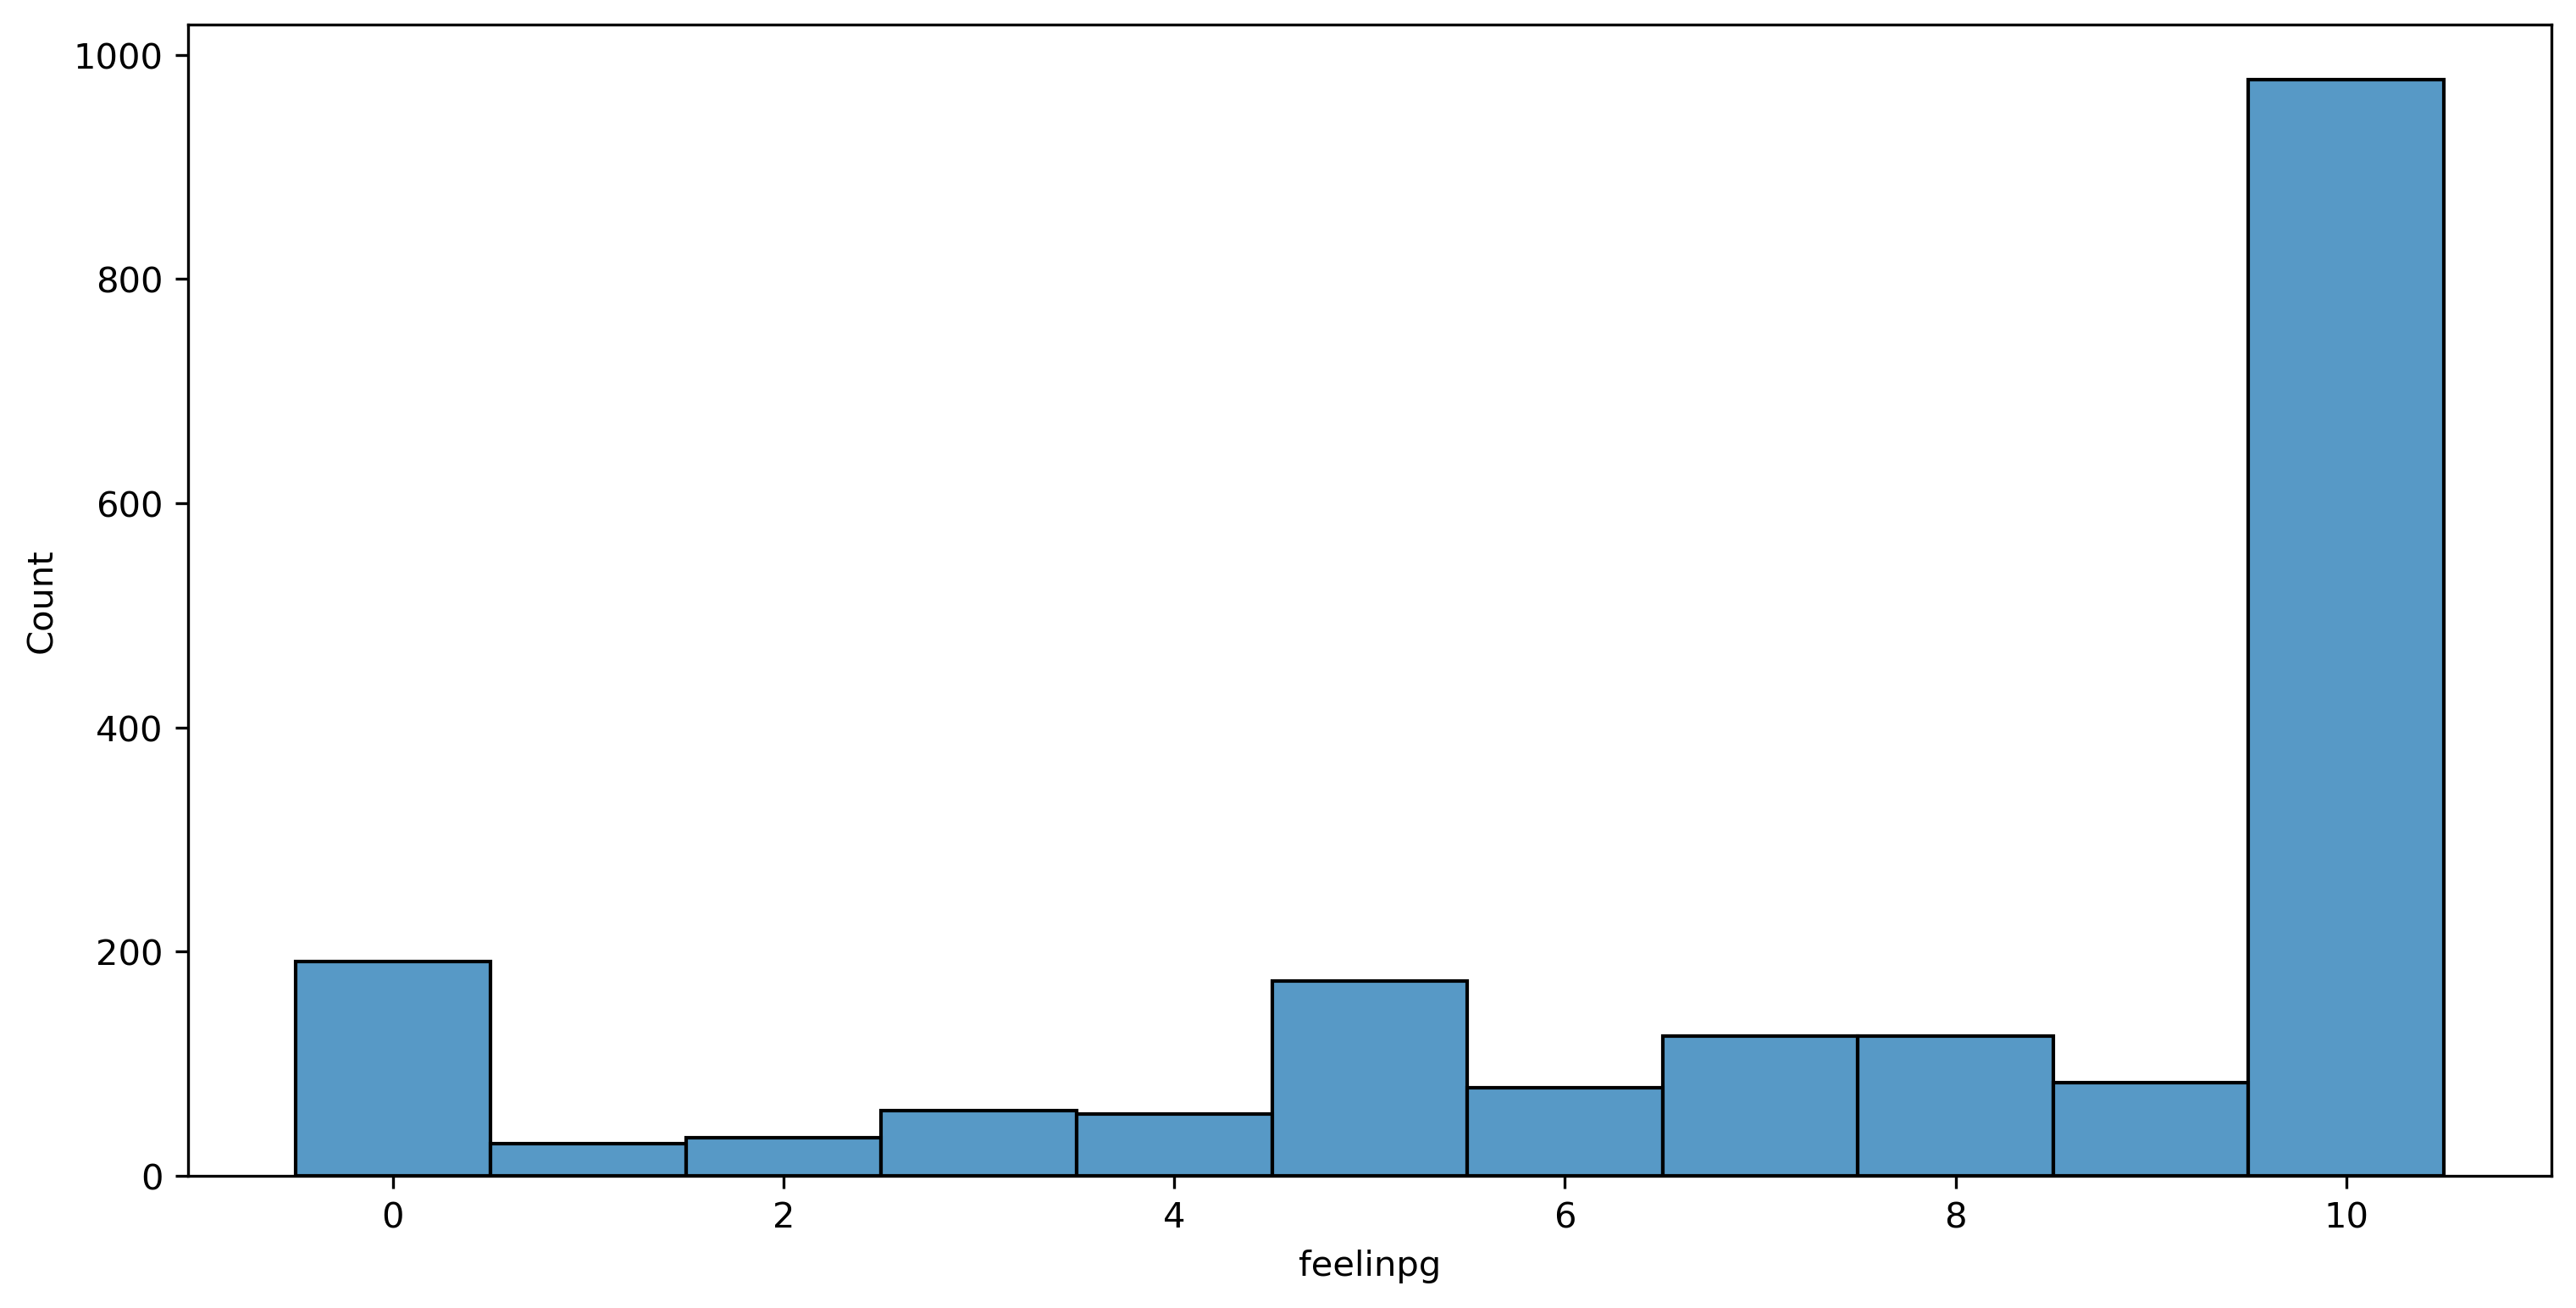

In [25]:
hist(pregnancy_data[features[11]], discrete=True, kde=False)

- ### gest_lb
Gestational length (if live birth)

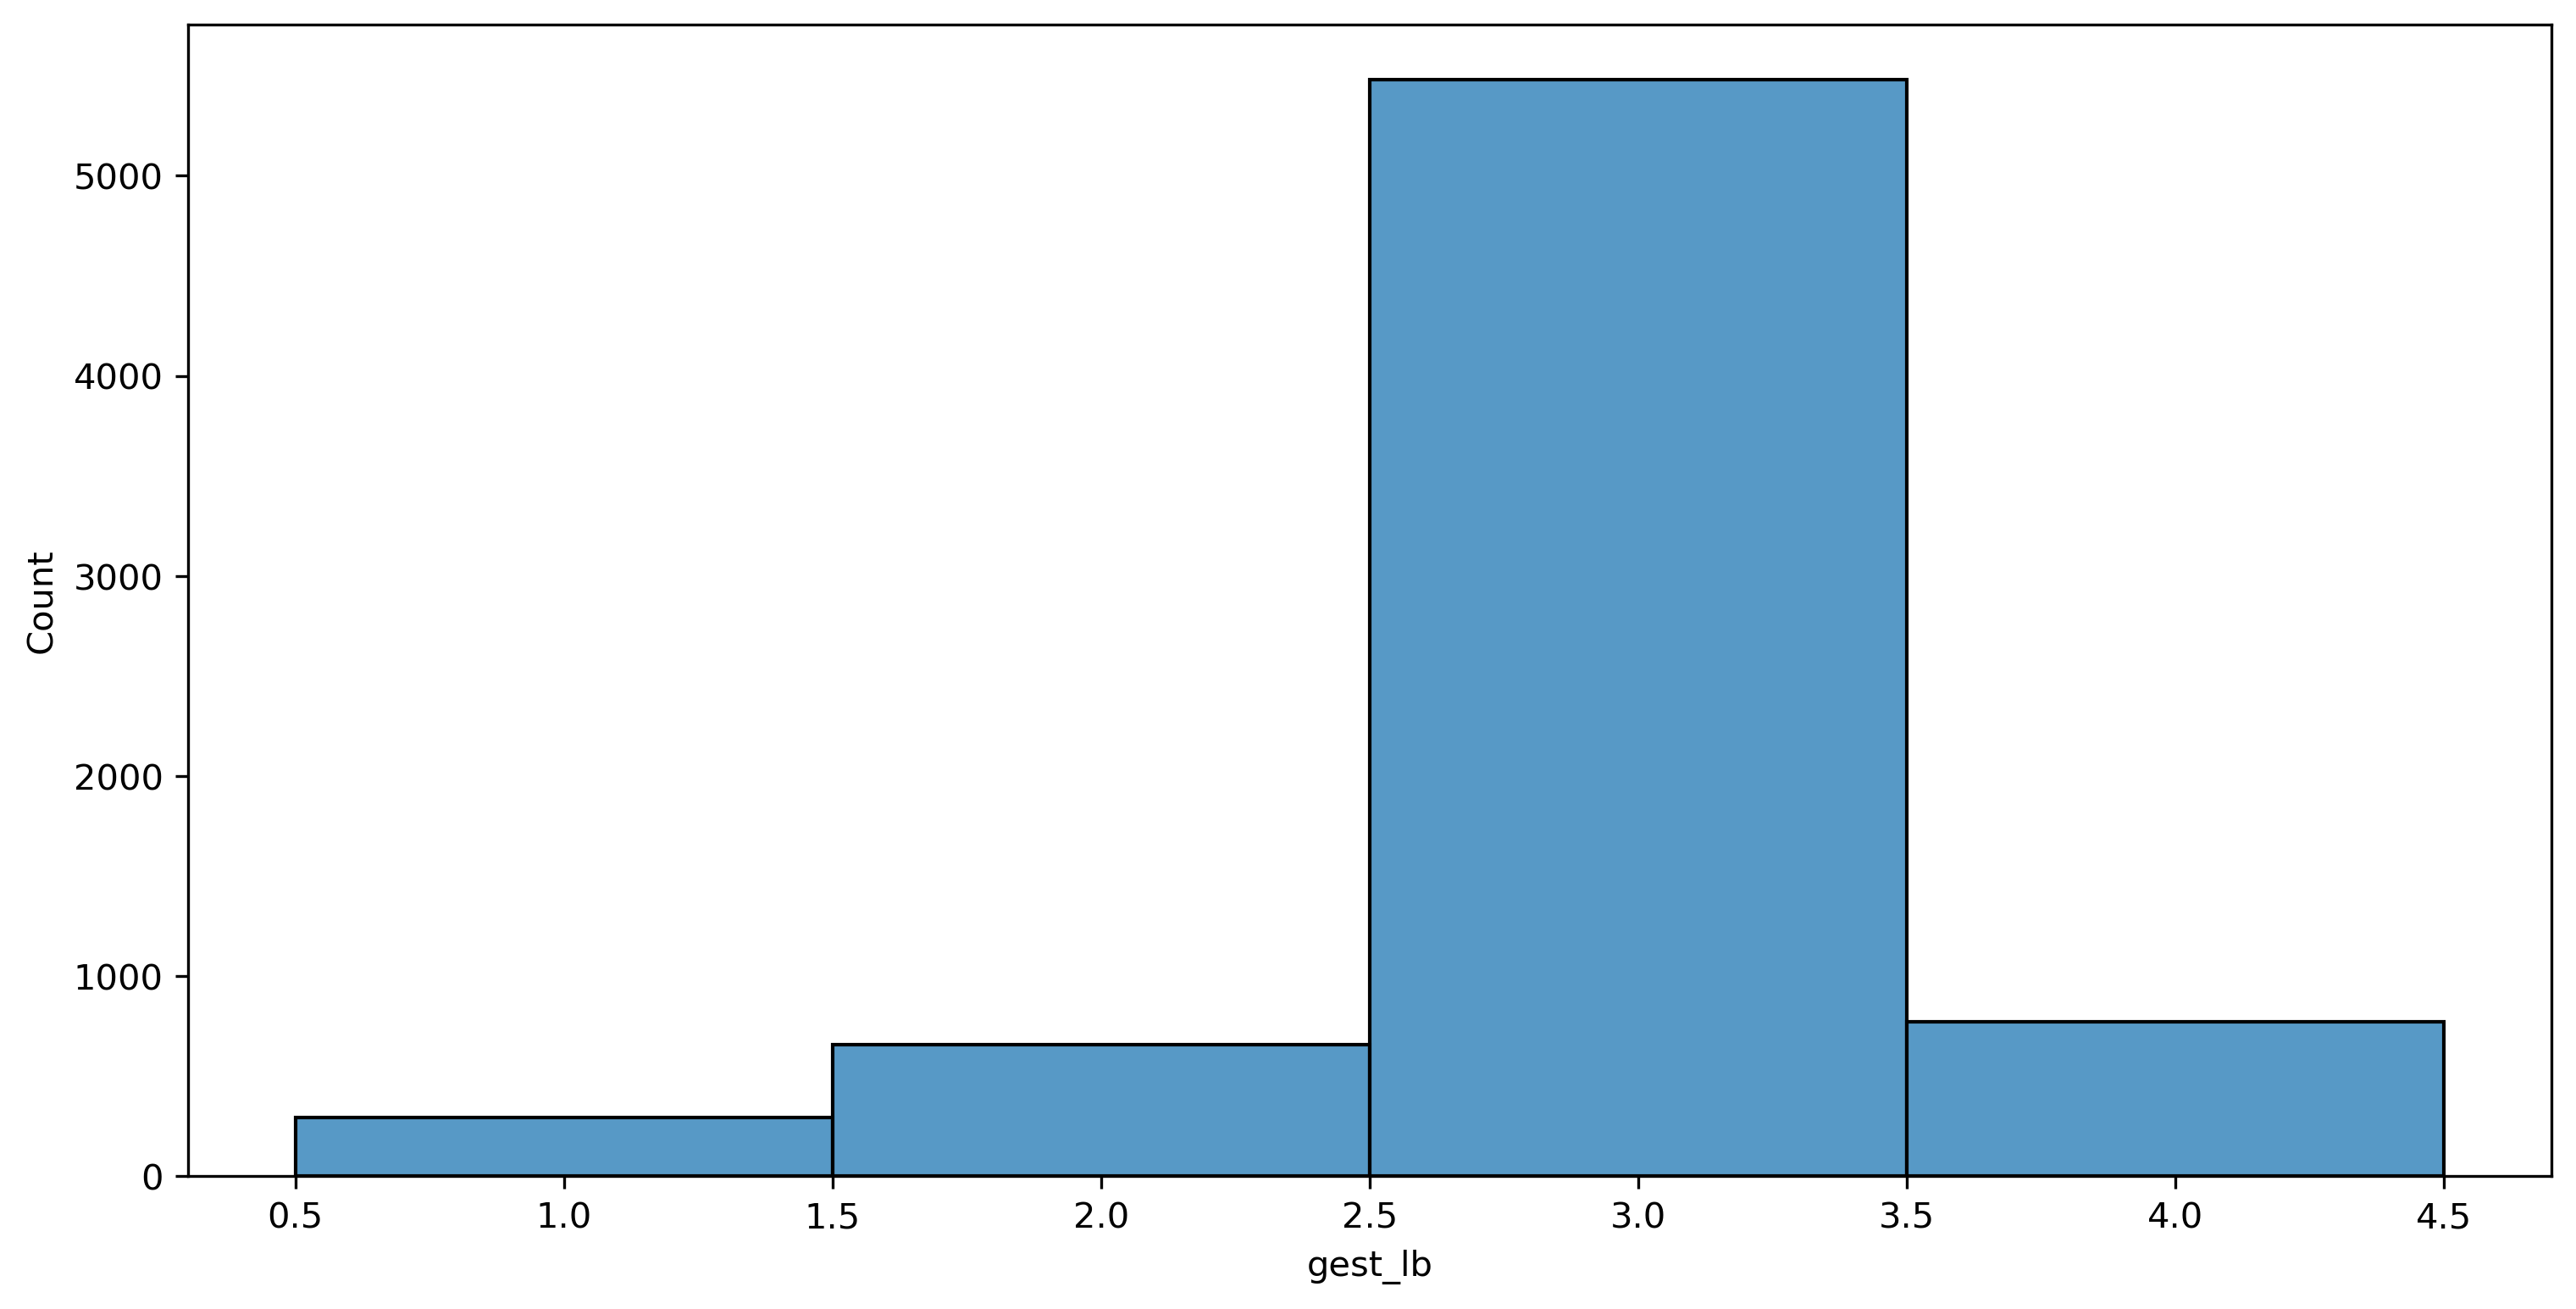

In [26]:
hist(pregnancy_data[features[12]], discrete=True, kde=False)

- ### gest_othr
Gestational length (if not live birth or current preg)

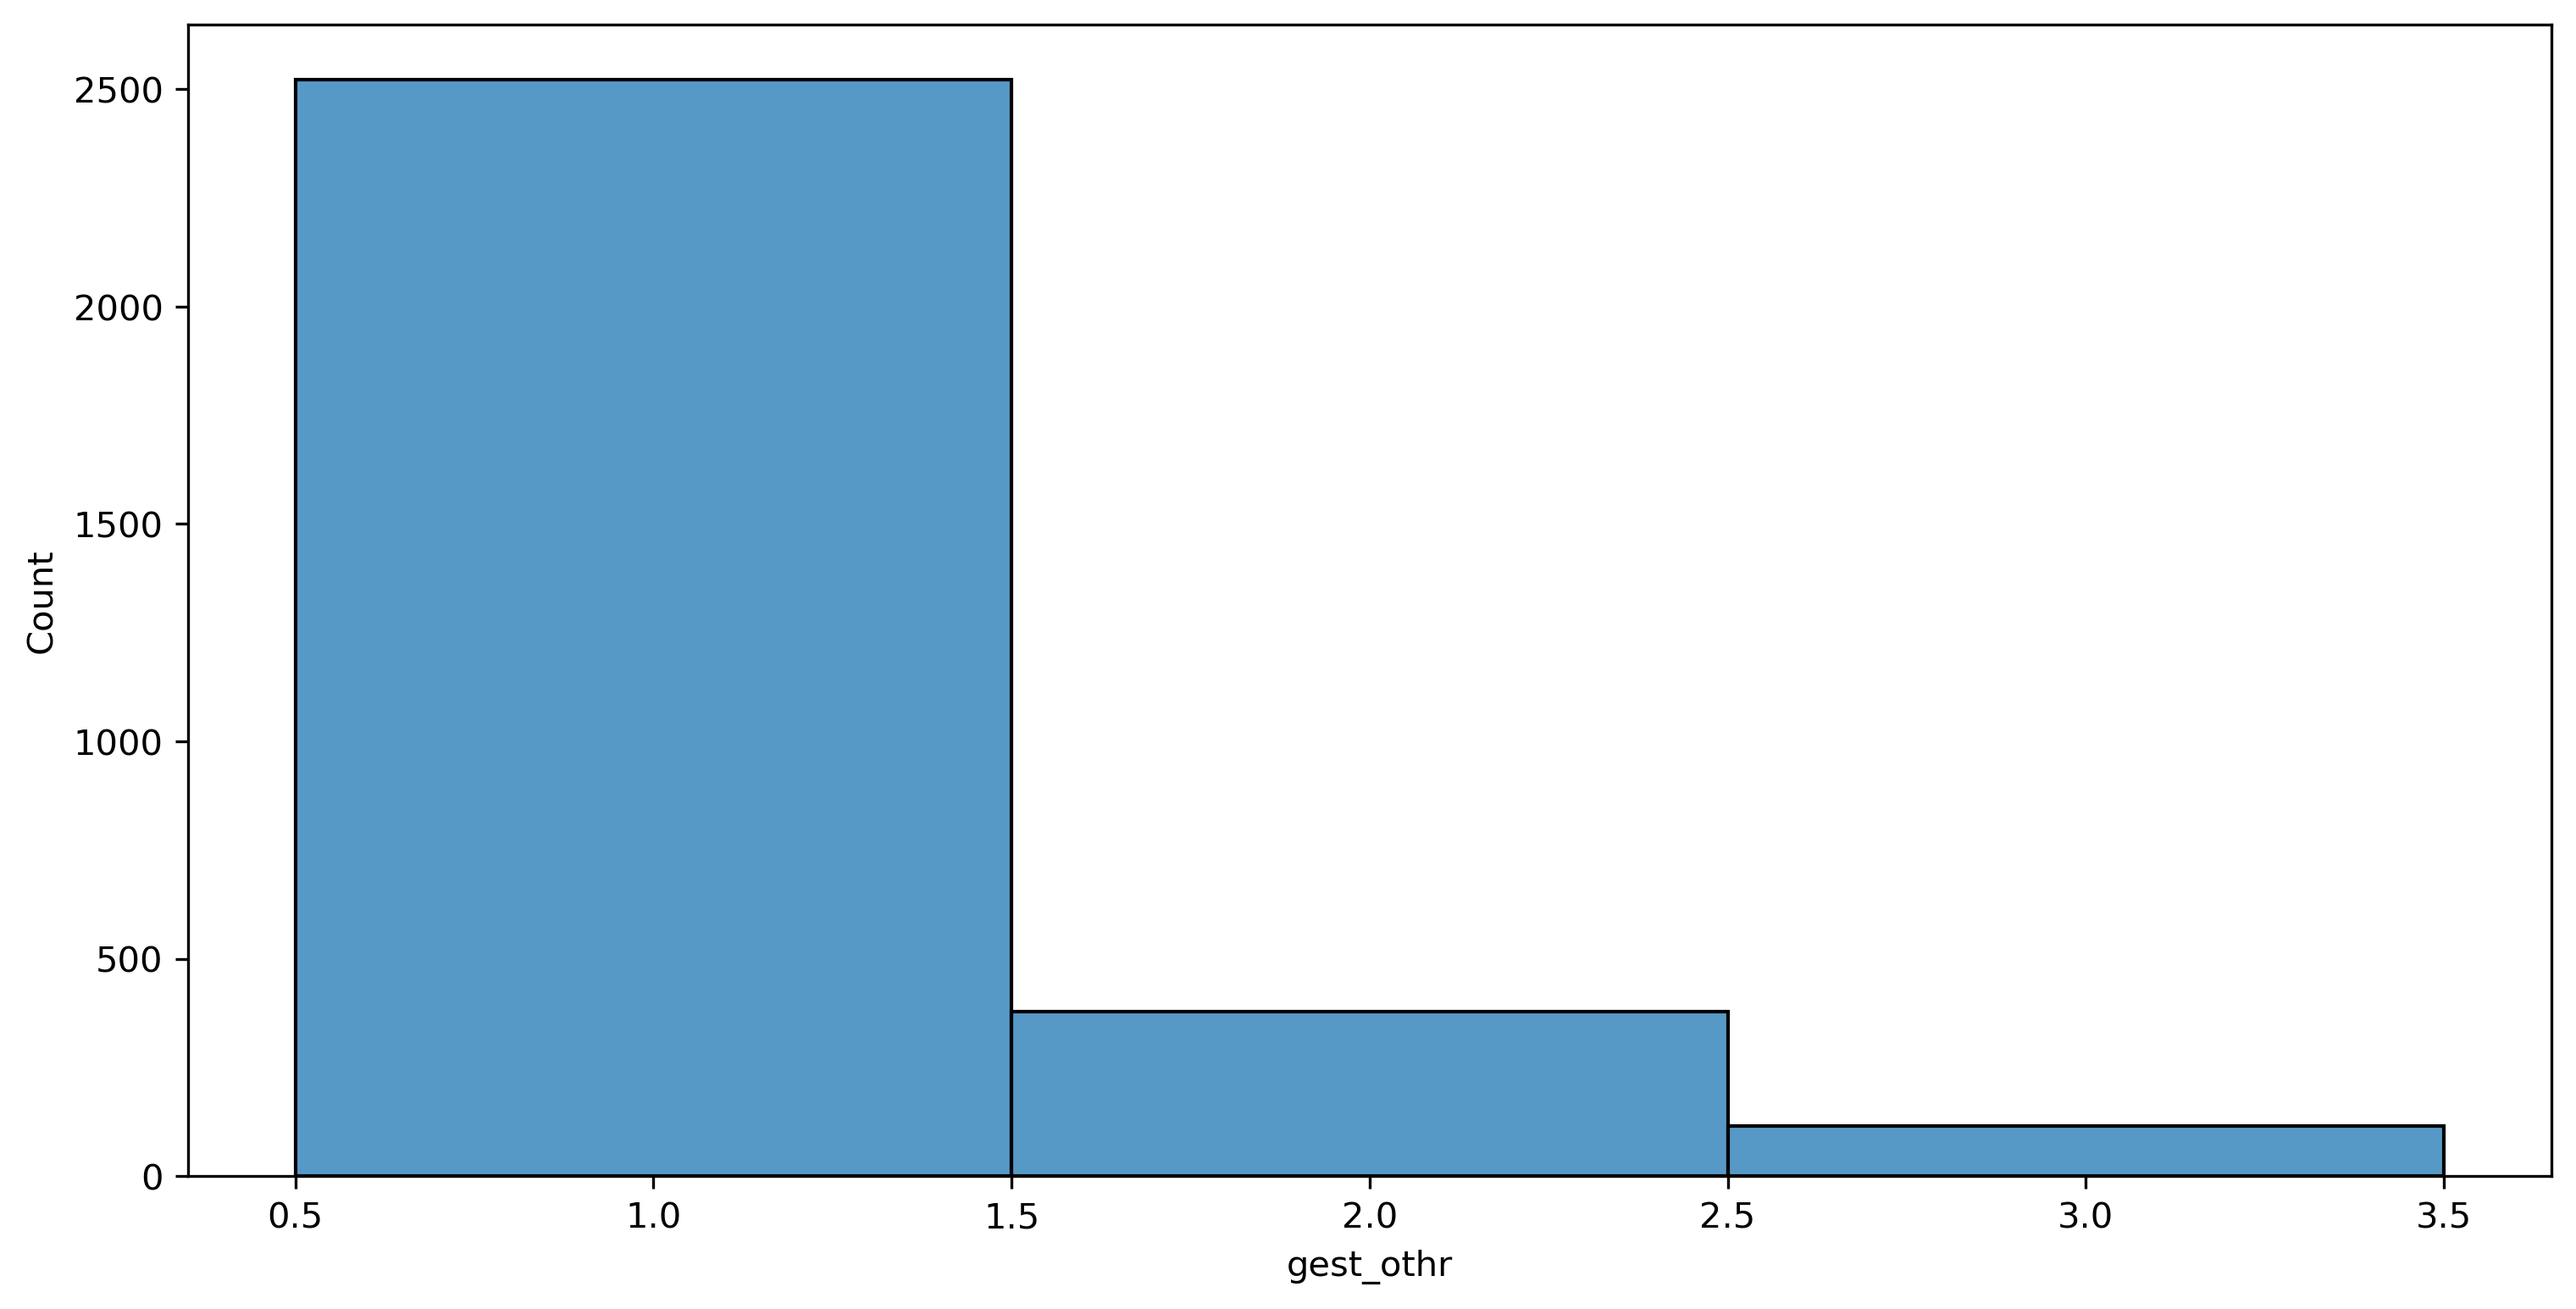

In [27]:
hist(pregnancy_data[features[13]], discrete=True, kde=False)

- ### agepreg
Age at pregnancy outcome<br><br>
nearly normally distributed.

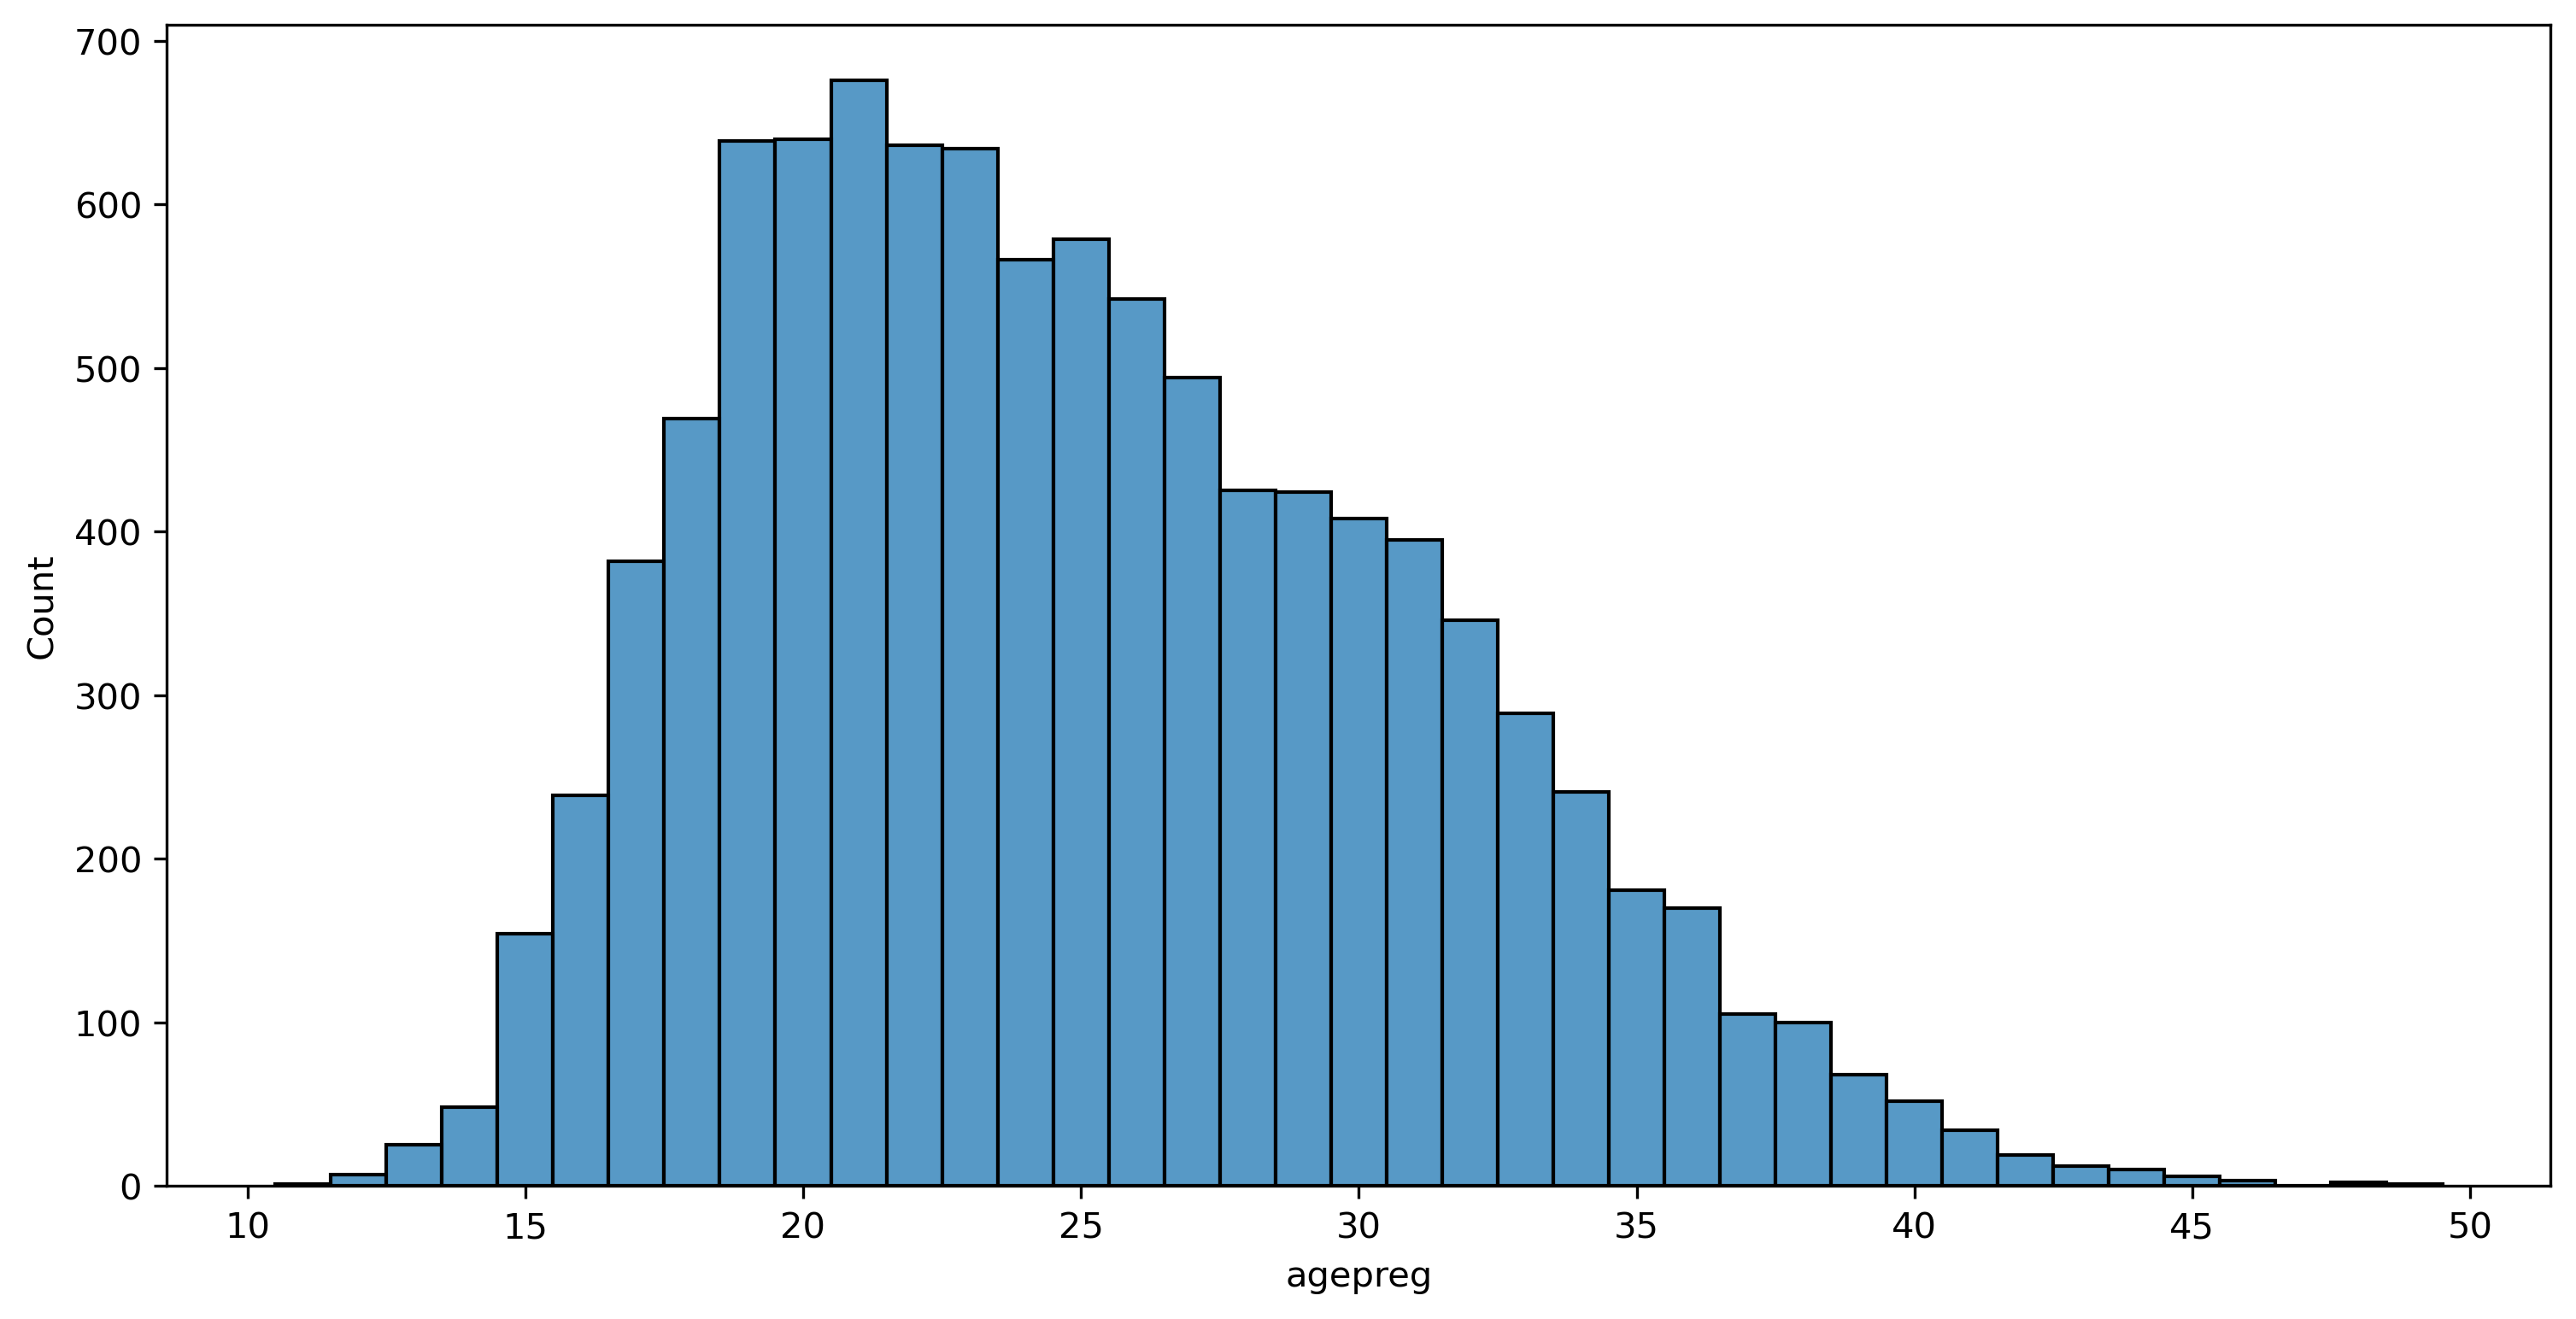

In [28]:
hist(pregnancy_data[features[14]], discrete=True, kde=False)

- ### ager
Age at interview

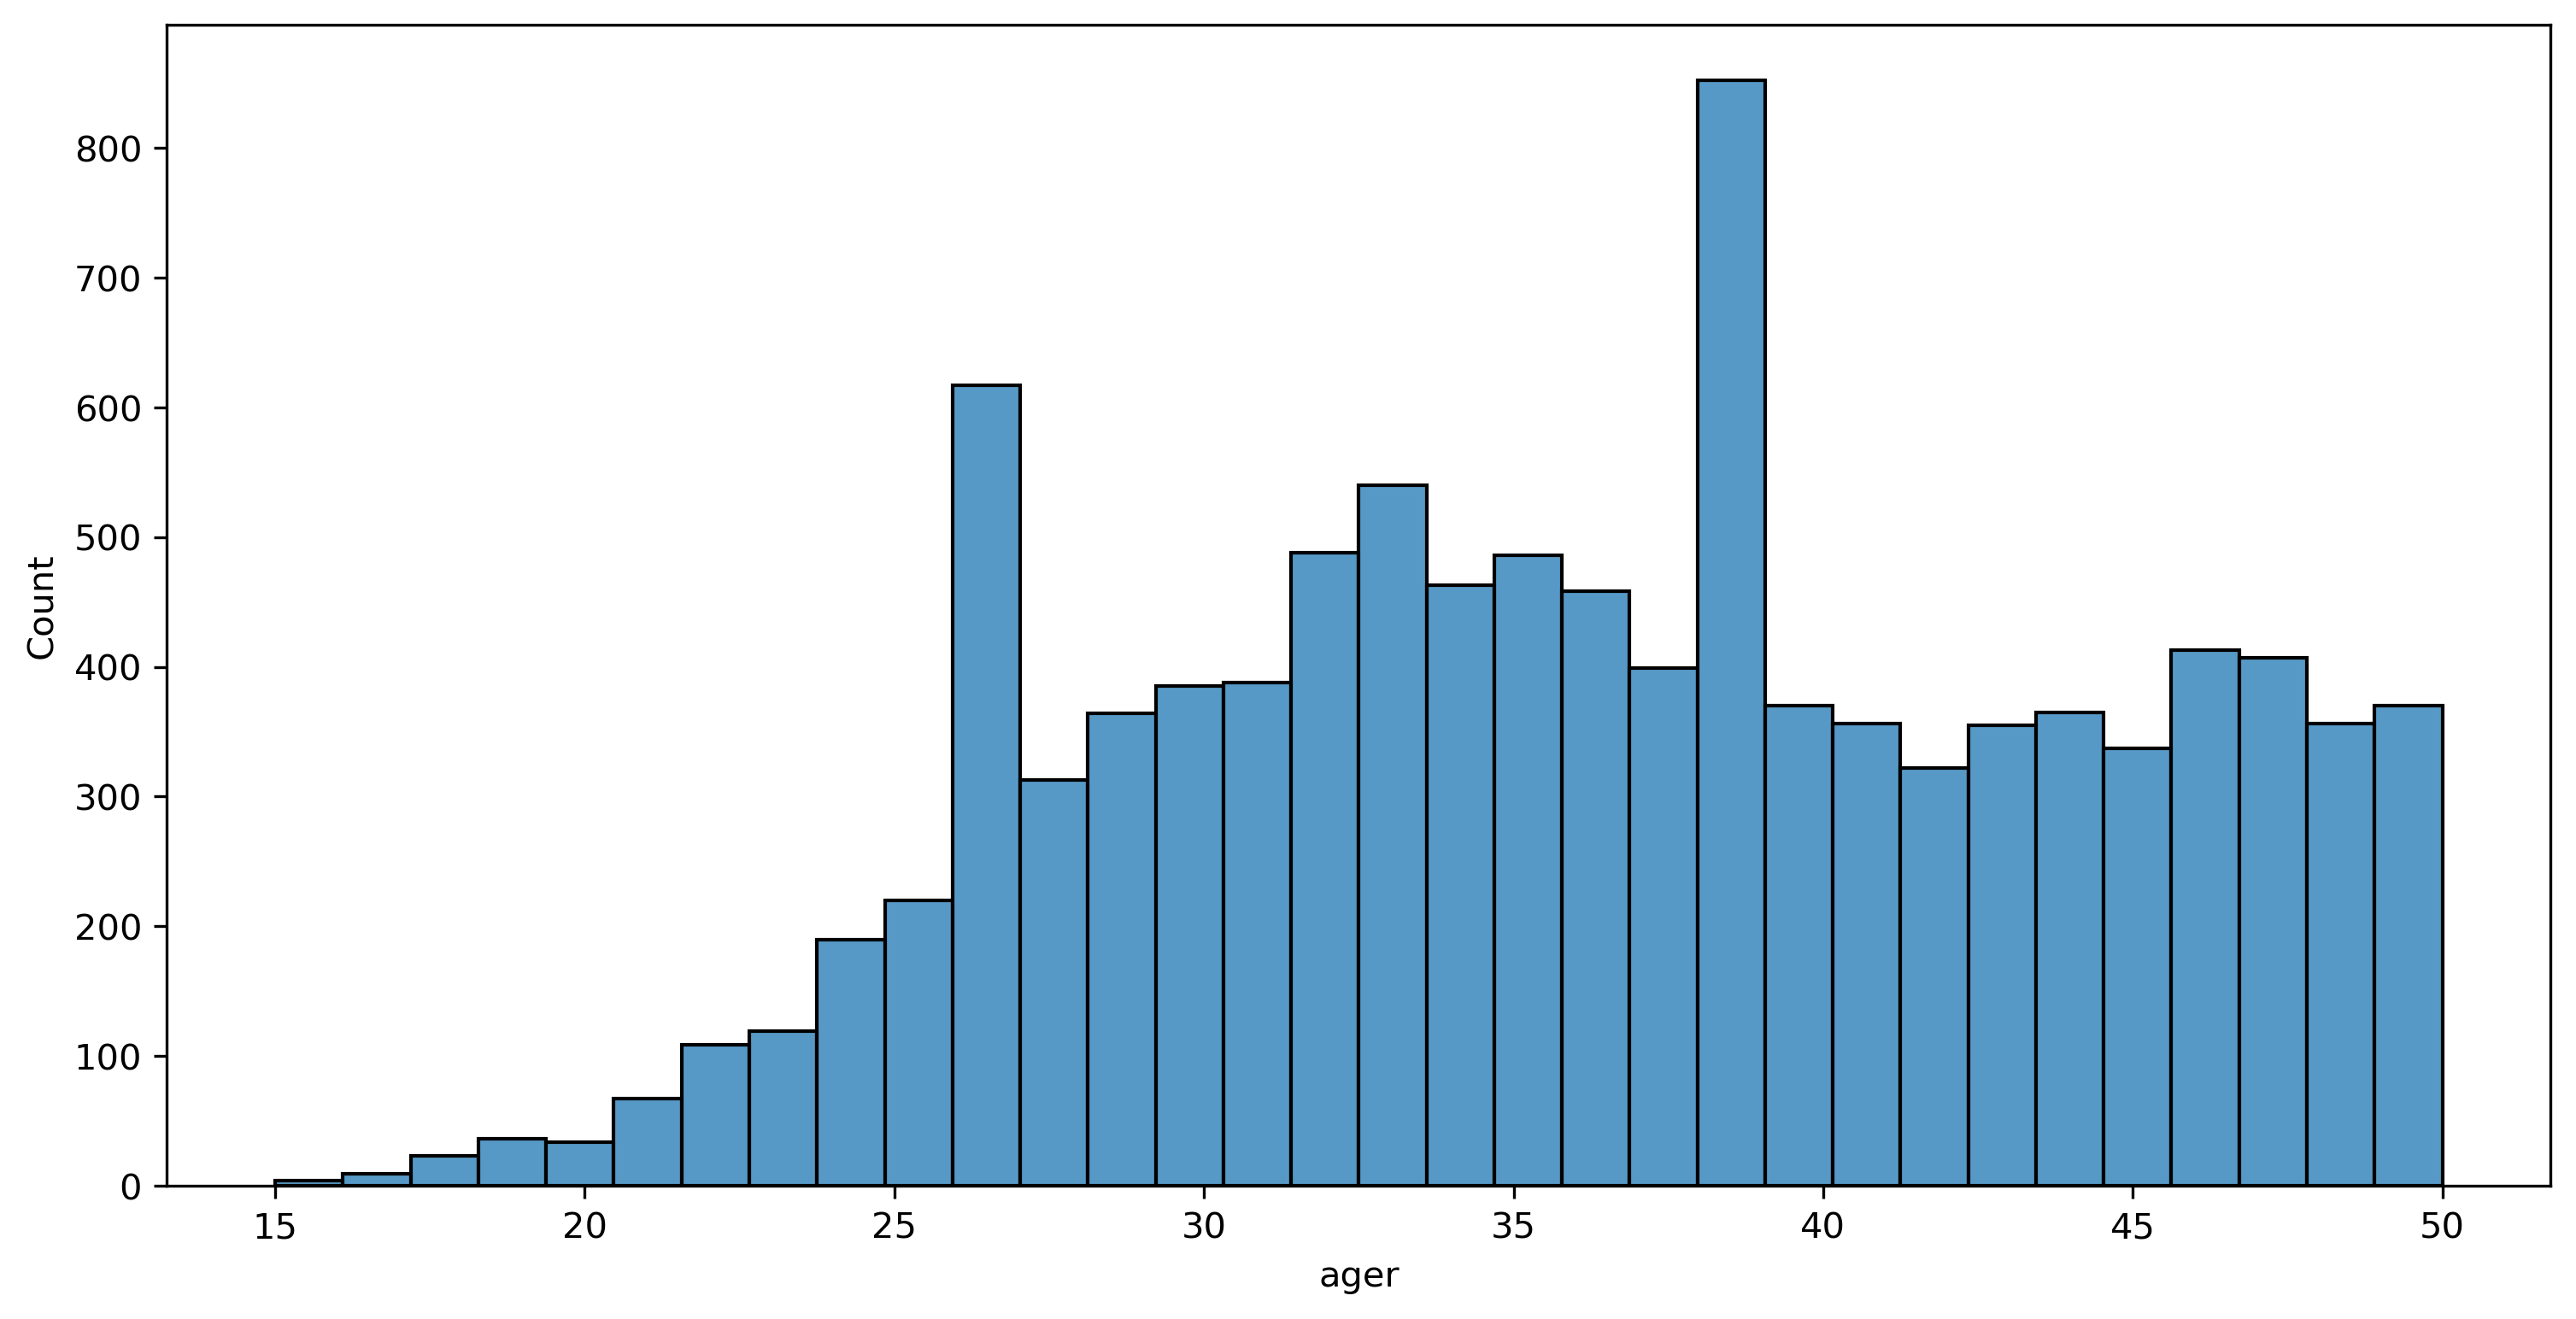

In [29]:
hist(pregnancy_data[features[15]], discrete=False, kde=False)

- ### educat
Education (completed years of schooling)

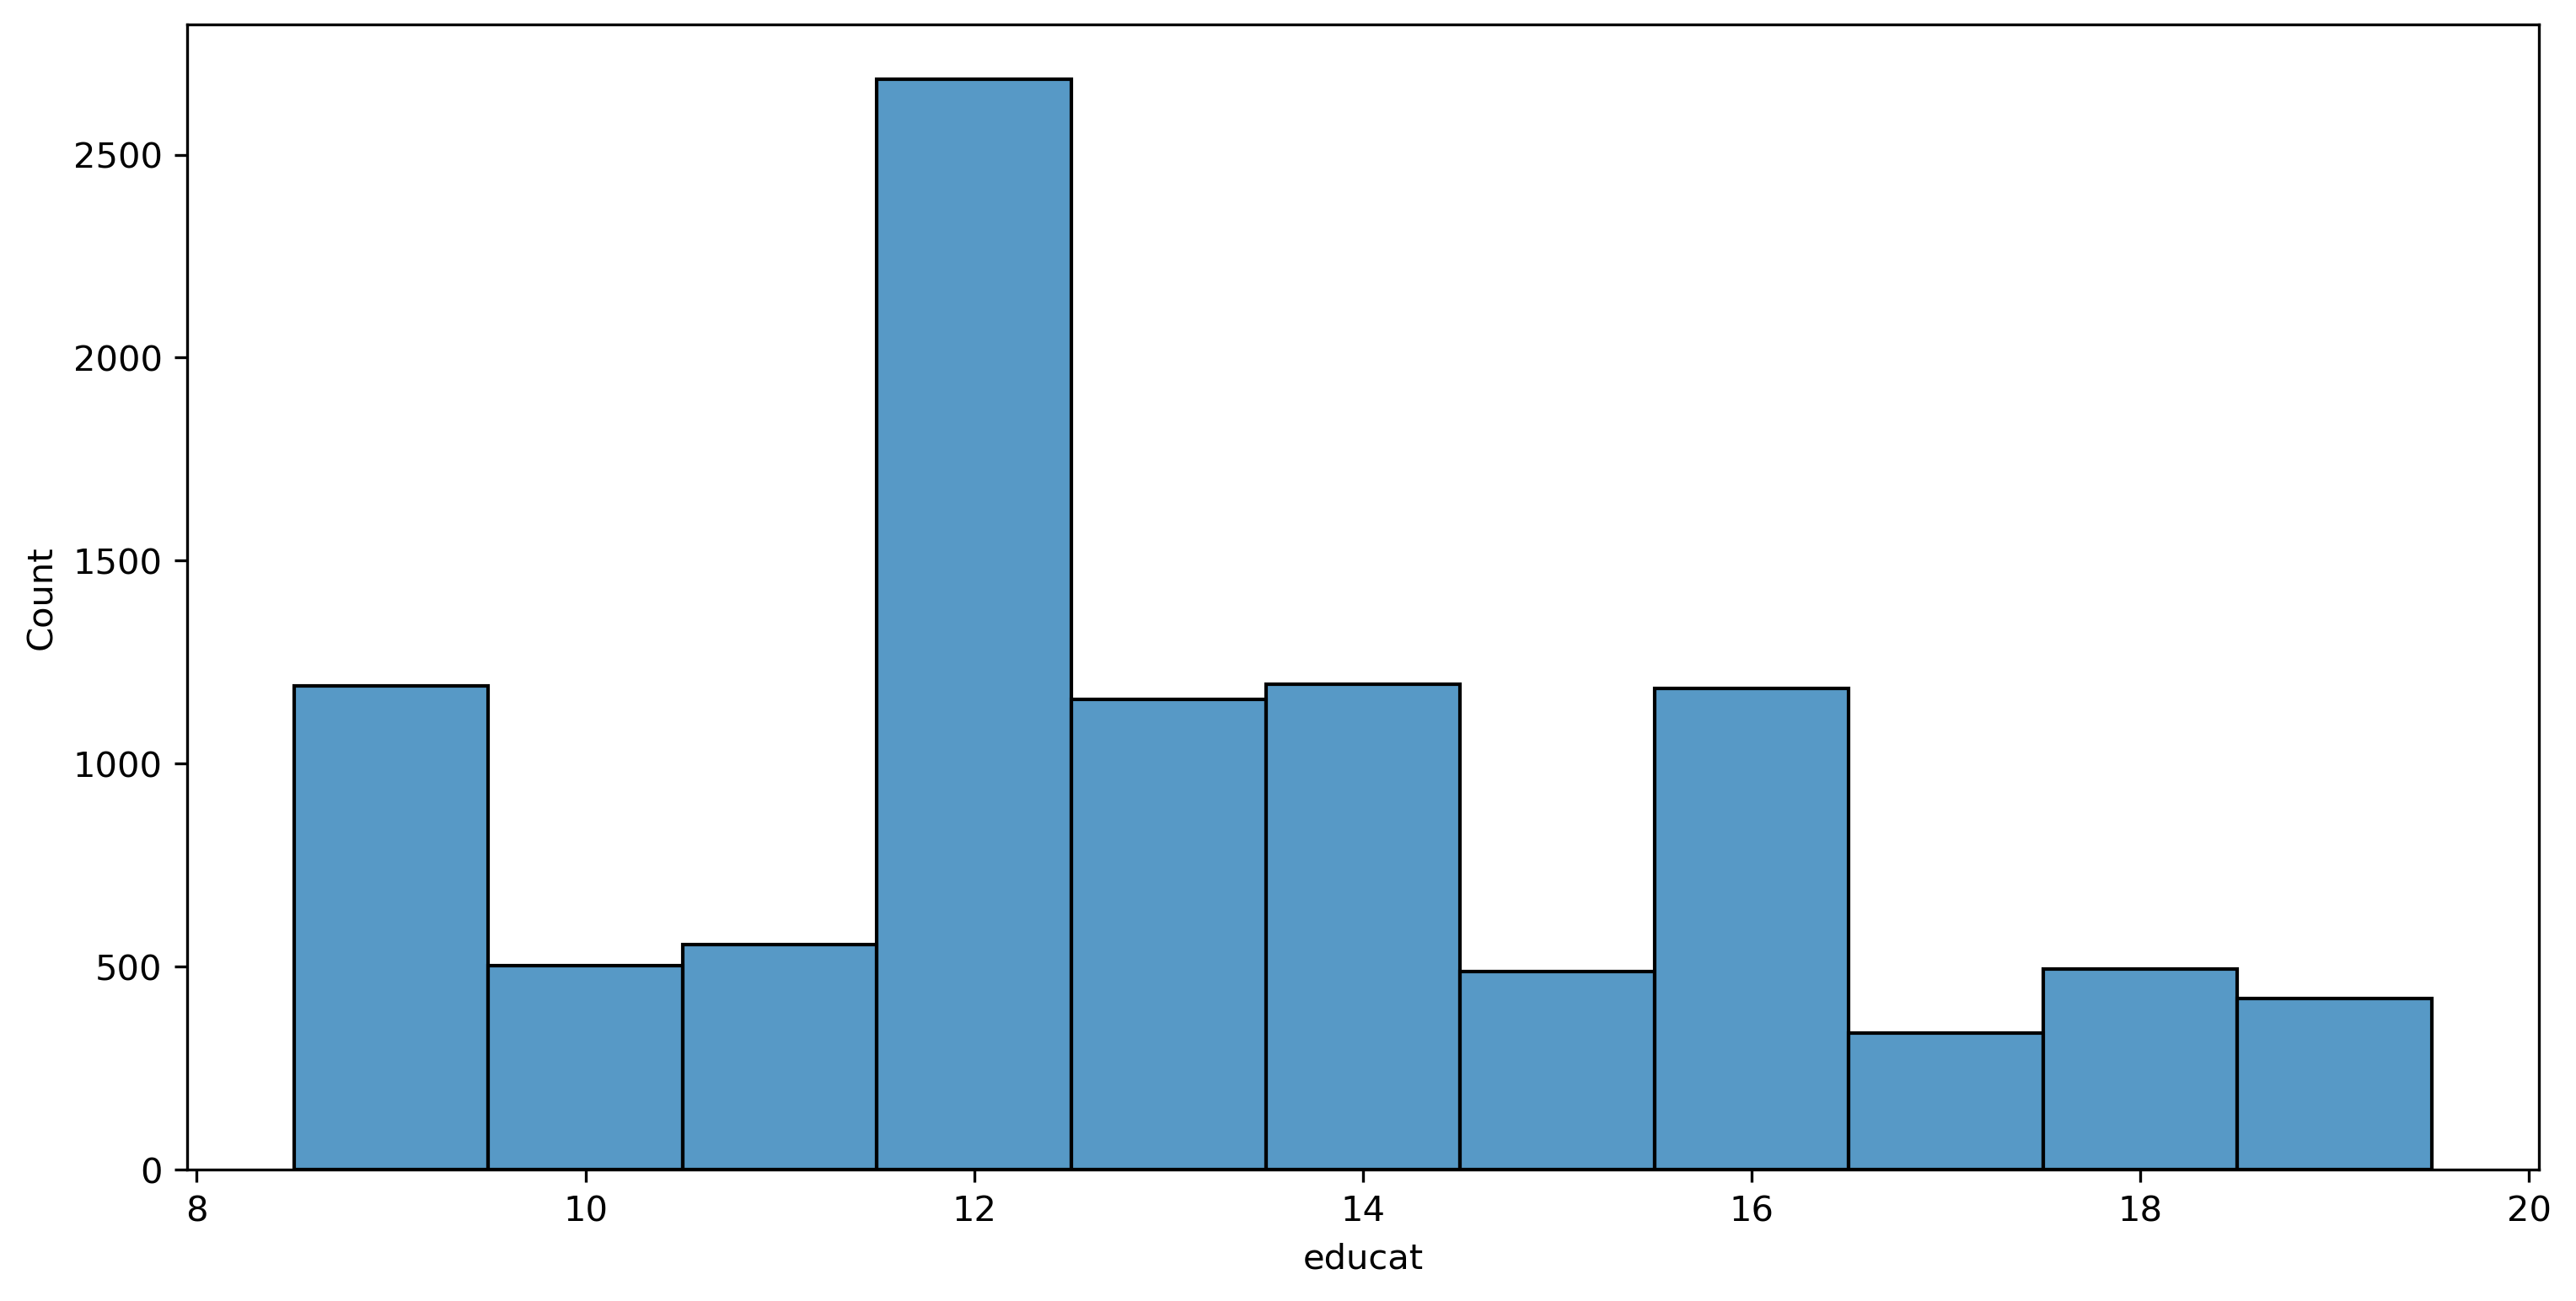

In [30]:
hist(pregnancy_data[features[16]], discrete=True, kde=False)

- ### hieduc
Highest completed year of school or degree

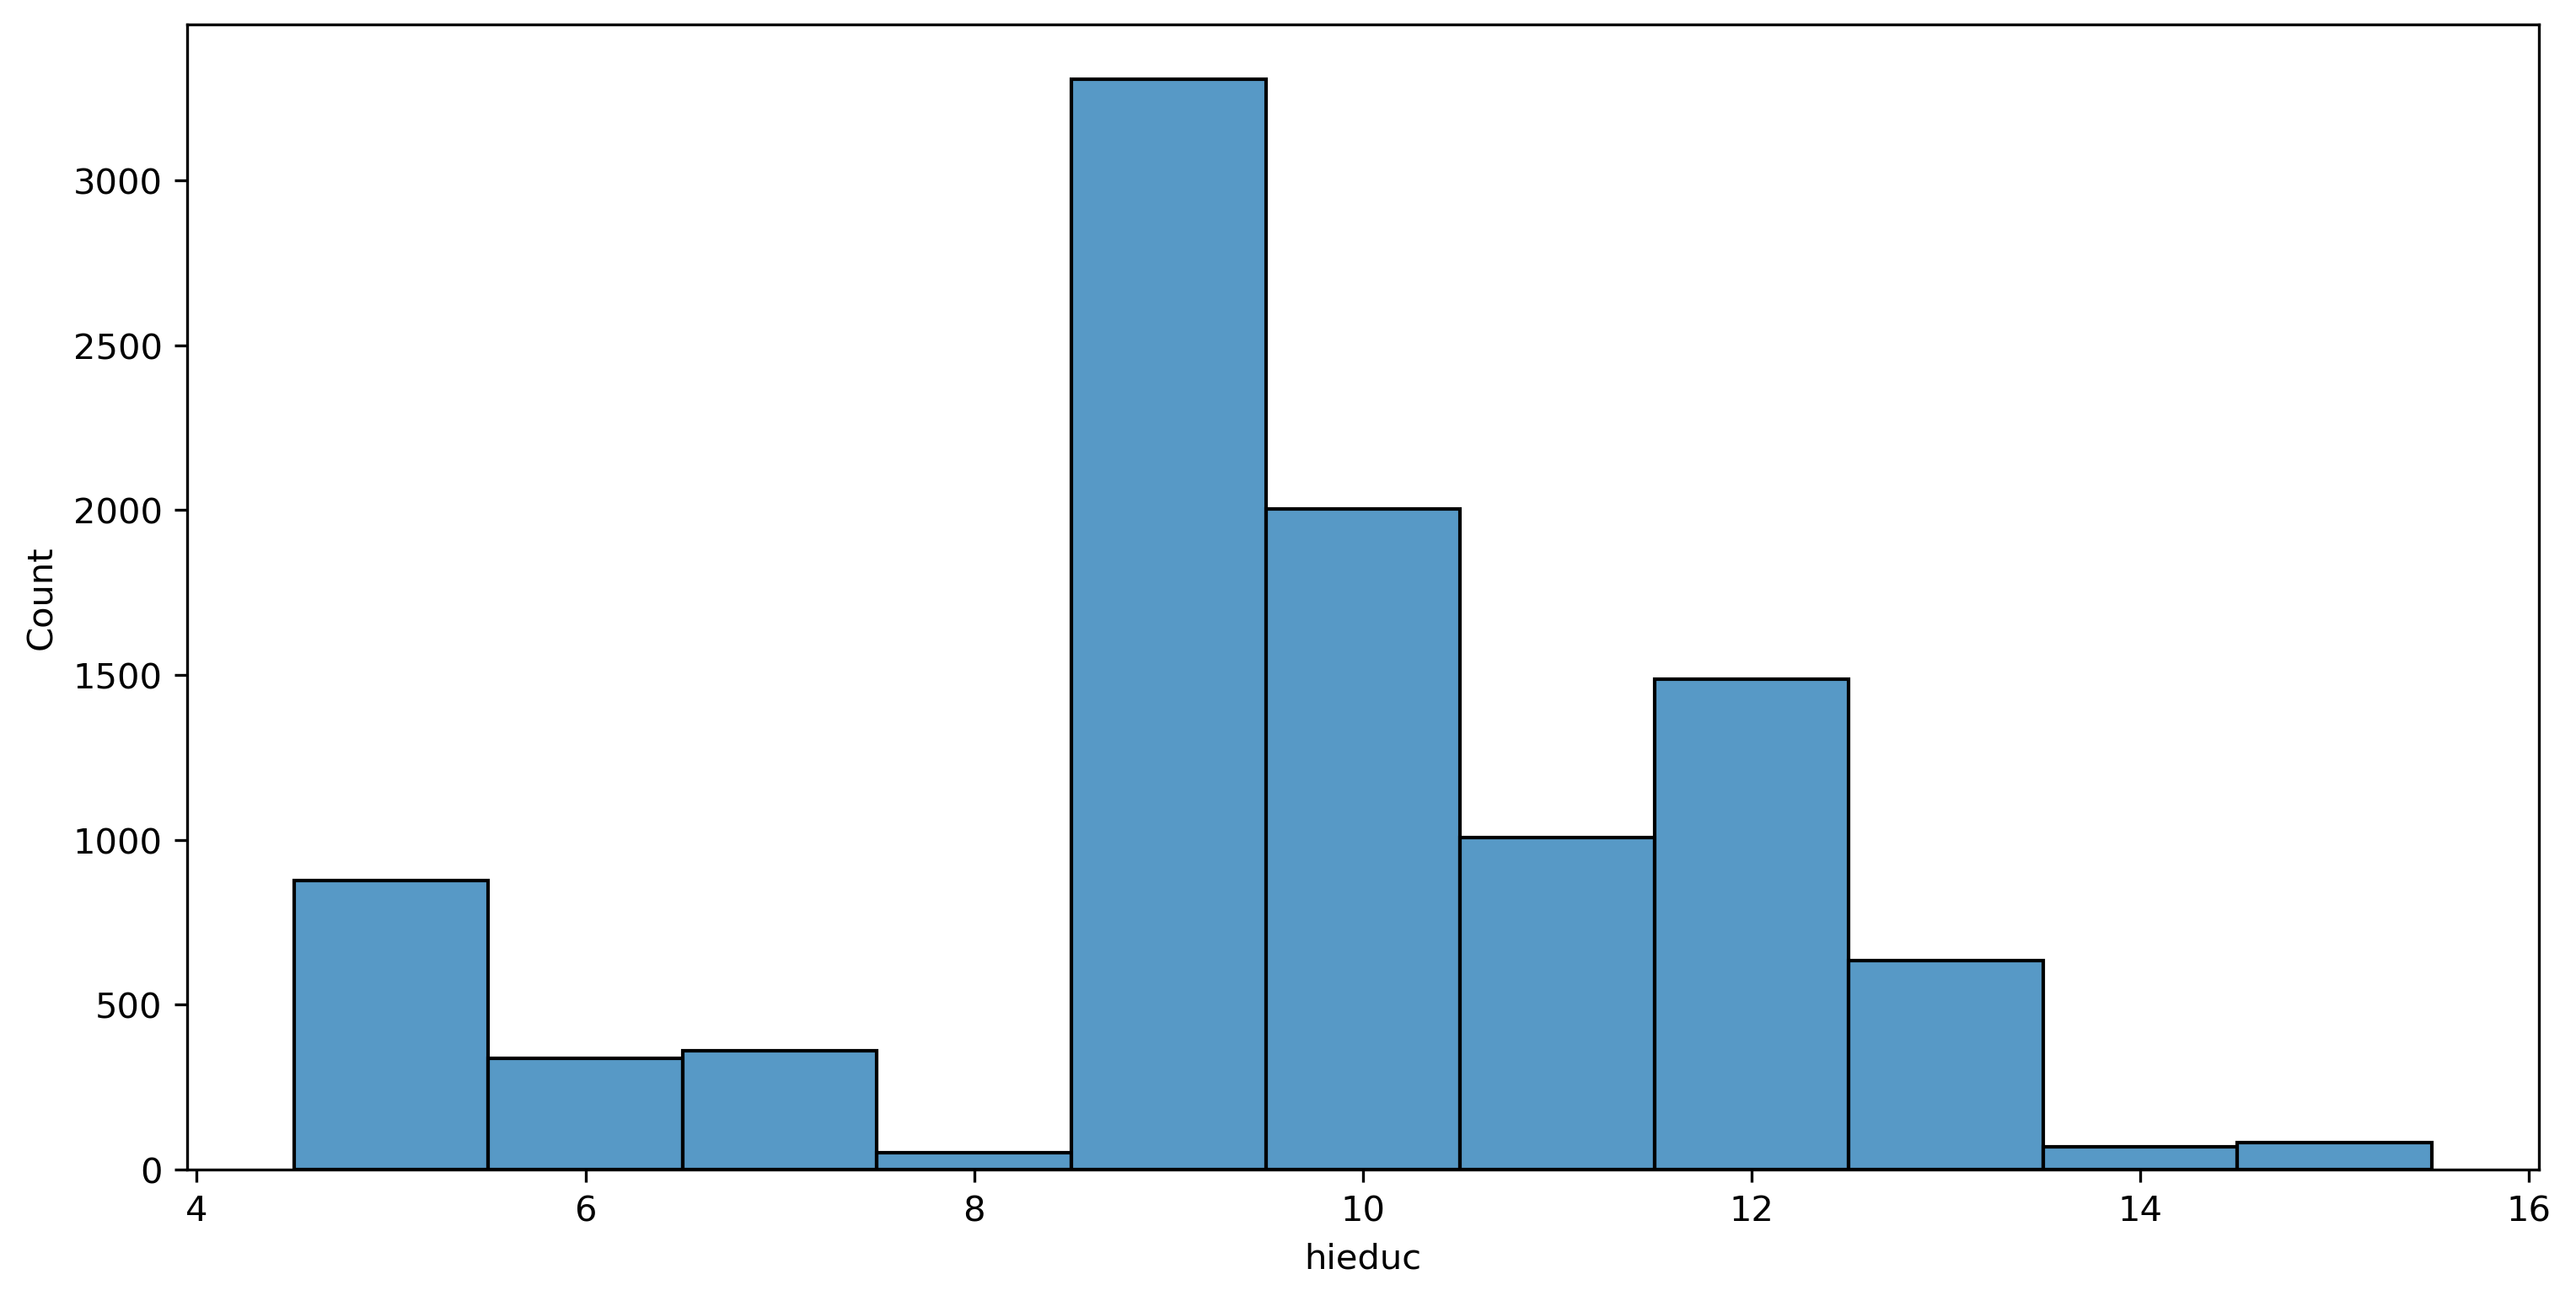

In [31]:
hist(pregnancy_data[features[17]], discrete=True, kde=False)

- ### race
Race

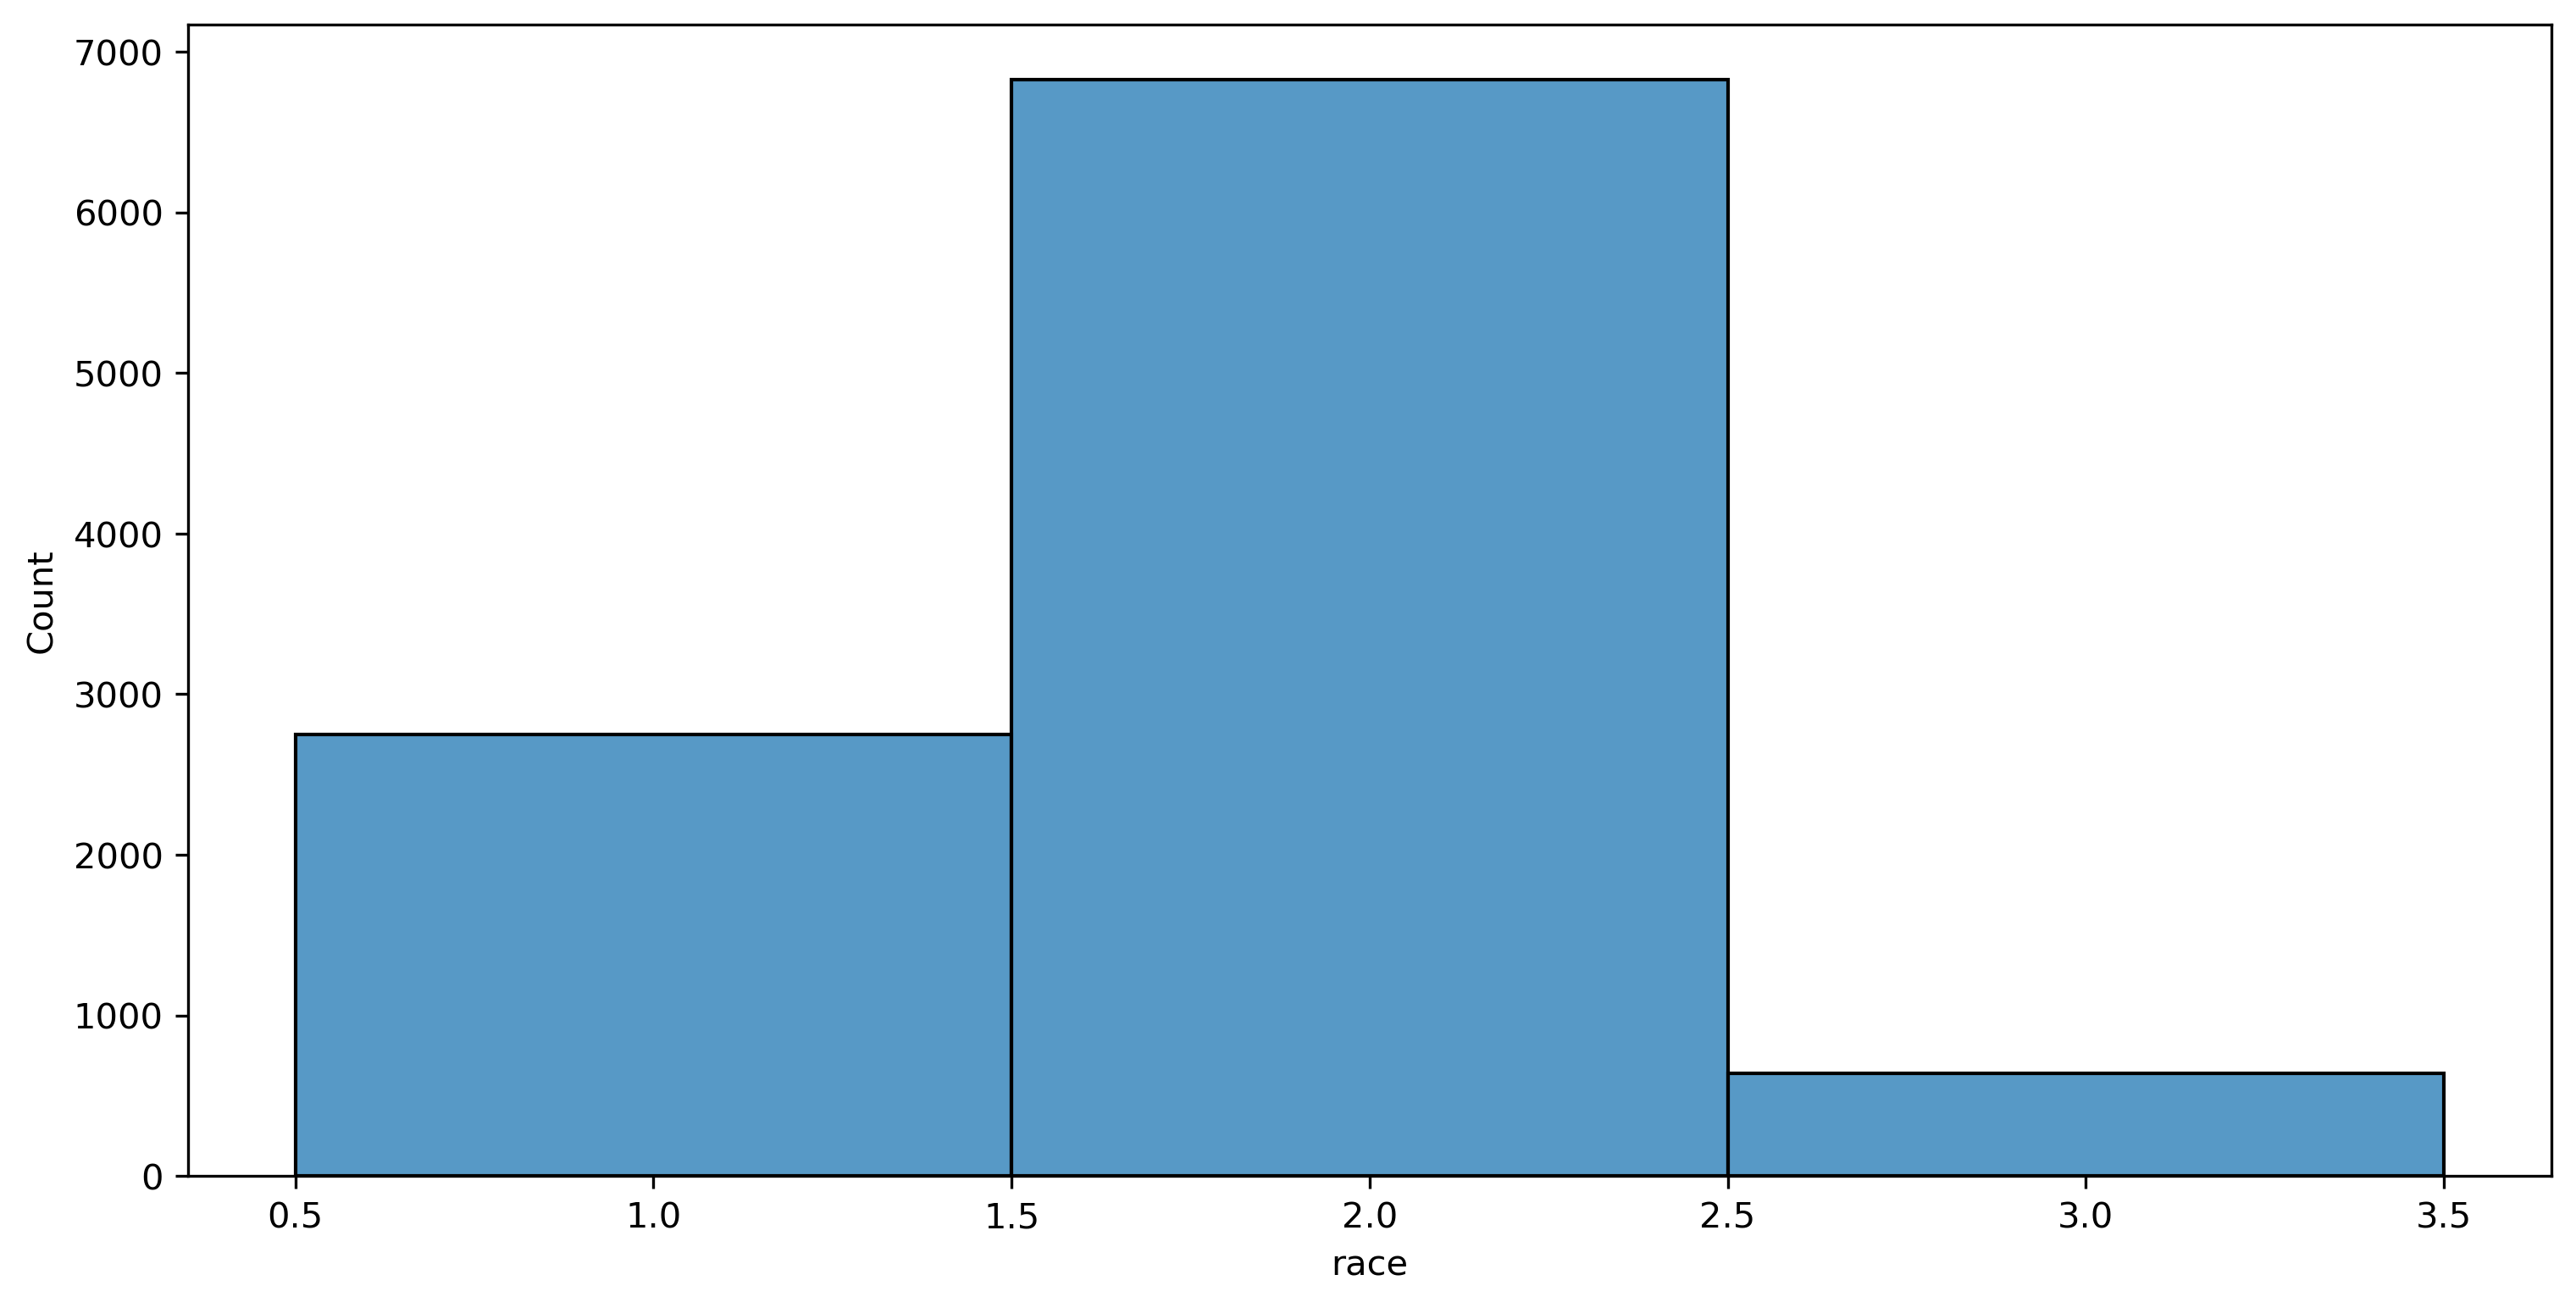

In [32]:
hist(pregnancy_data[features[18]], discrete=True, kde=False)

- ### pregnum
CAPI-based total number of pregnancies<br><br>
right skewed.

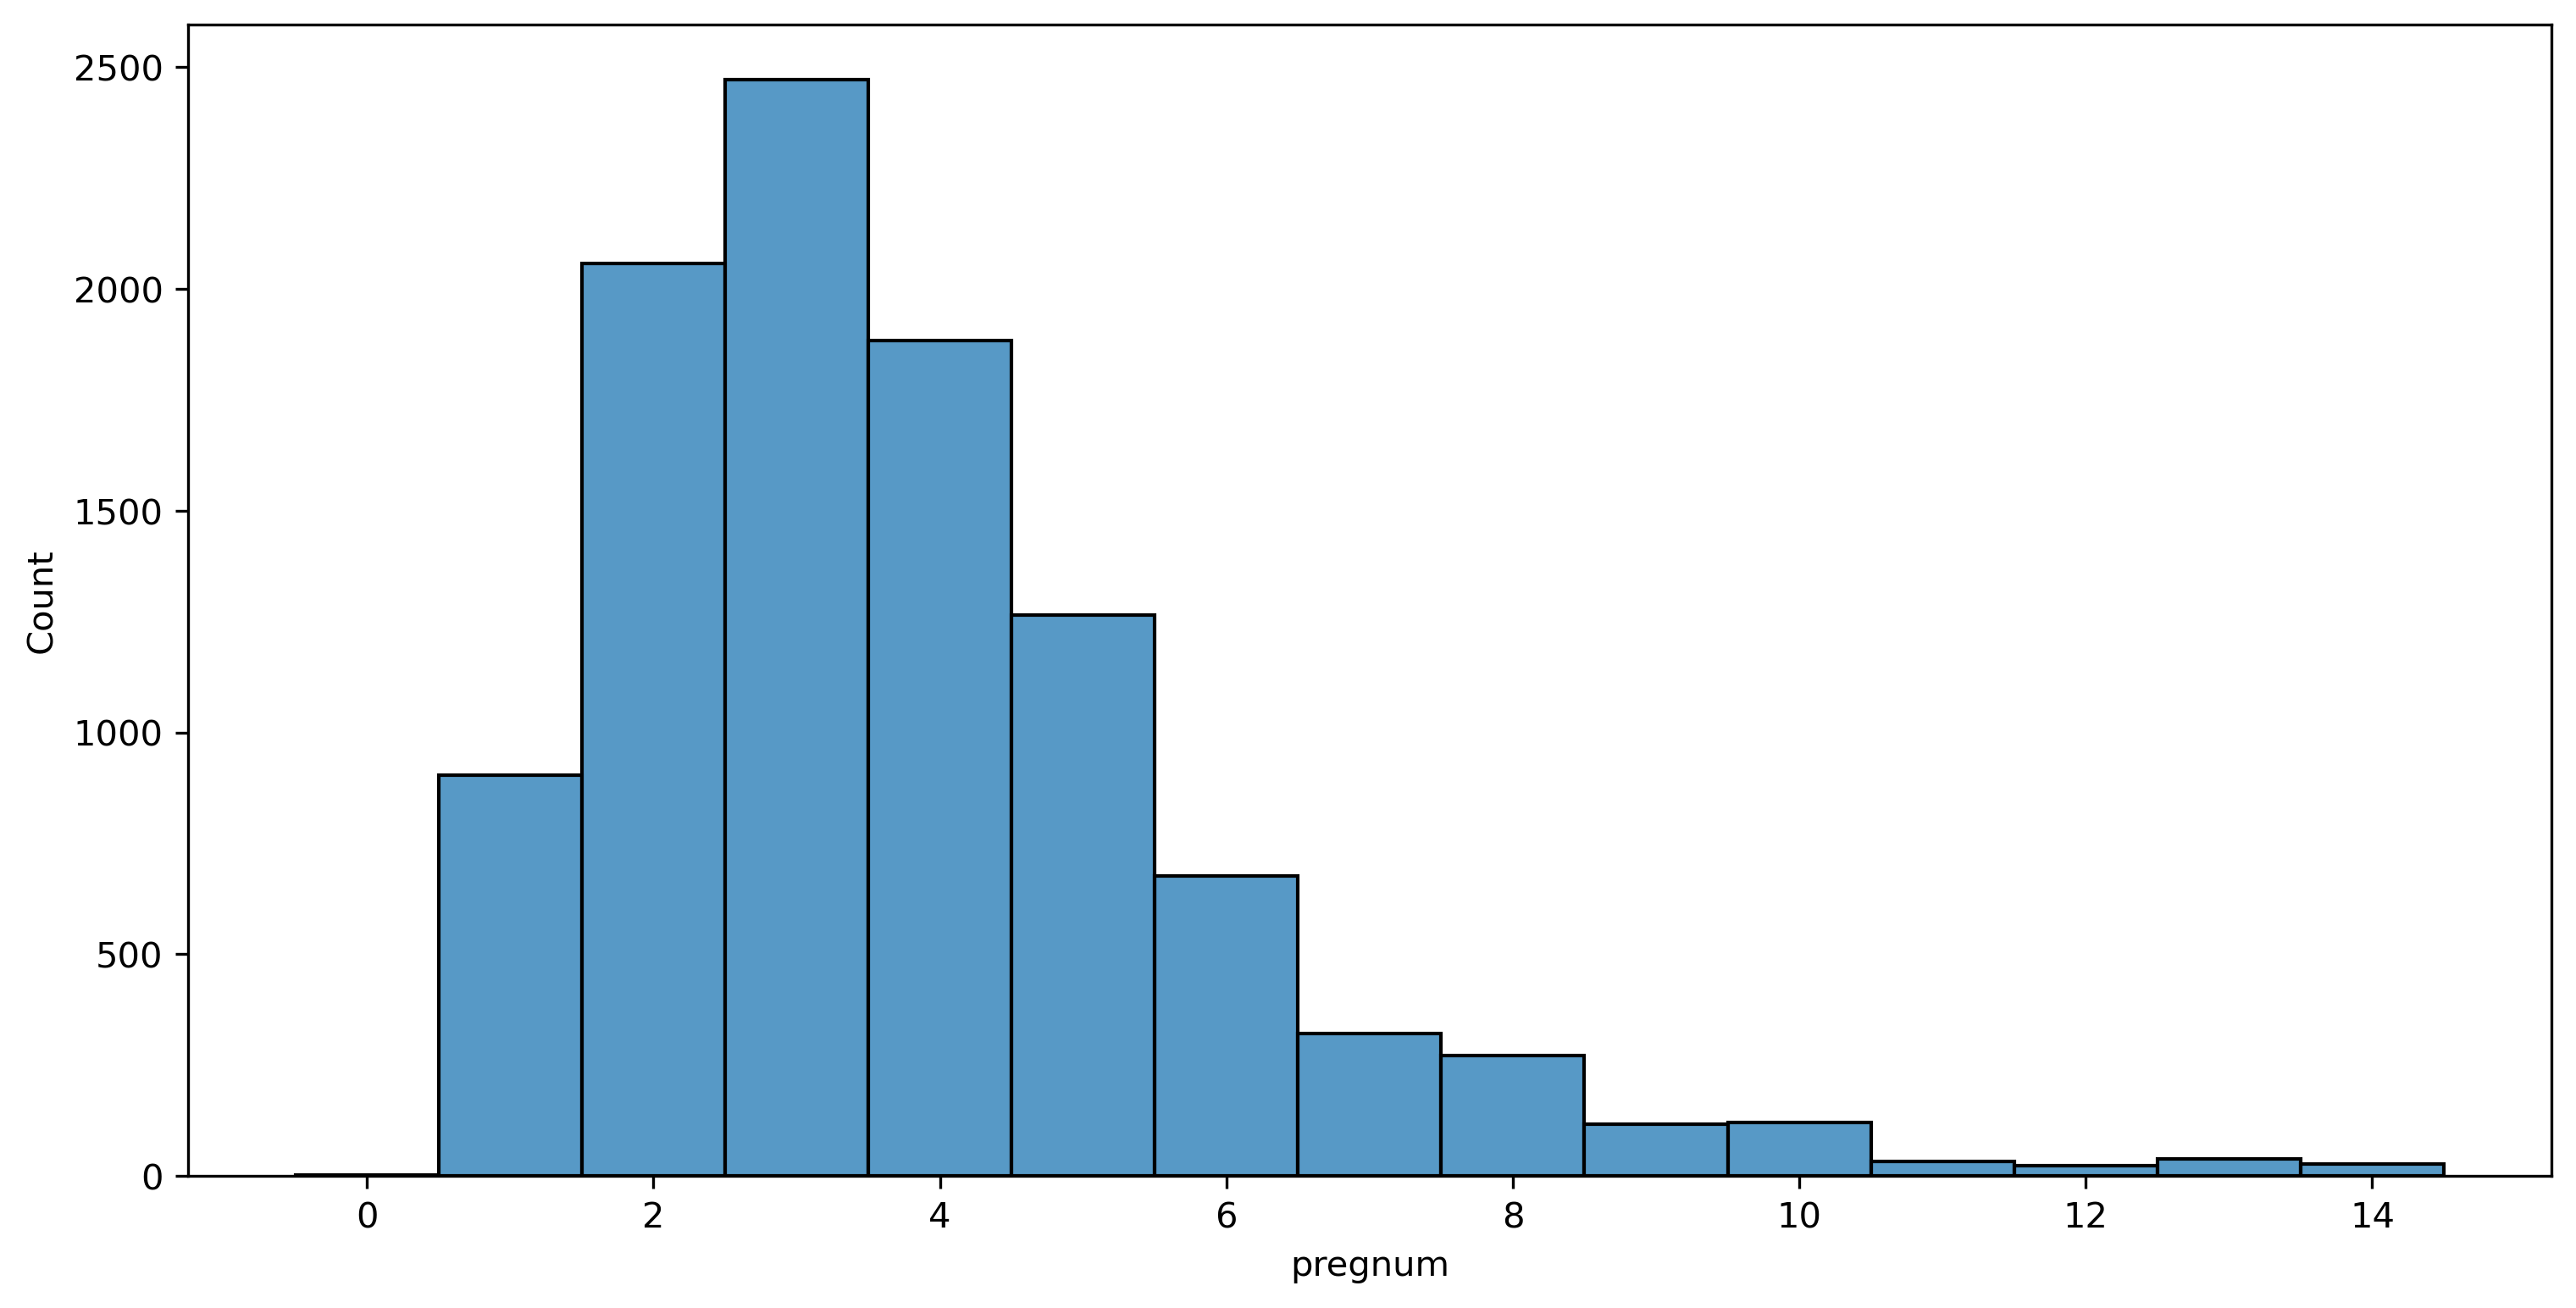

In [33]:
hist(pregnancy_data[features[19]], discrete=True, kde=False)

- ### parity
Total number of live births<br><br>
right skewed.

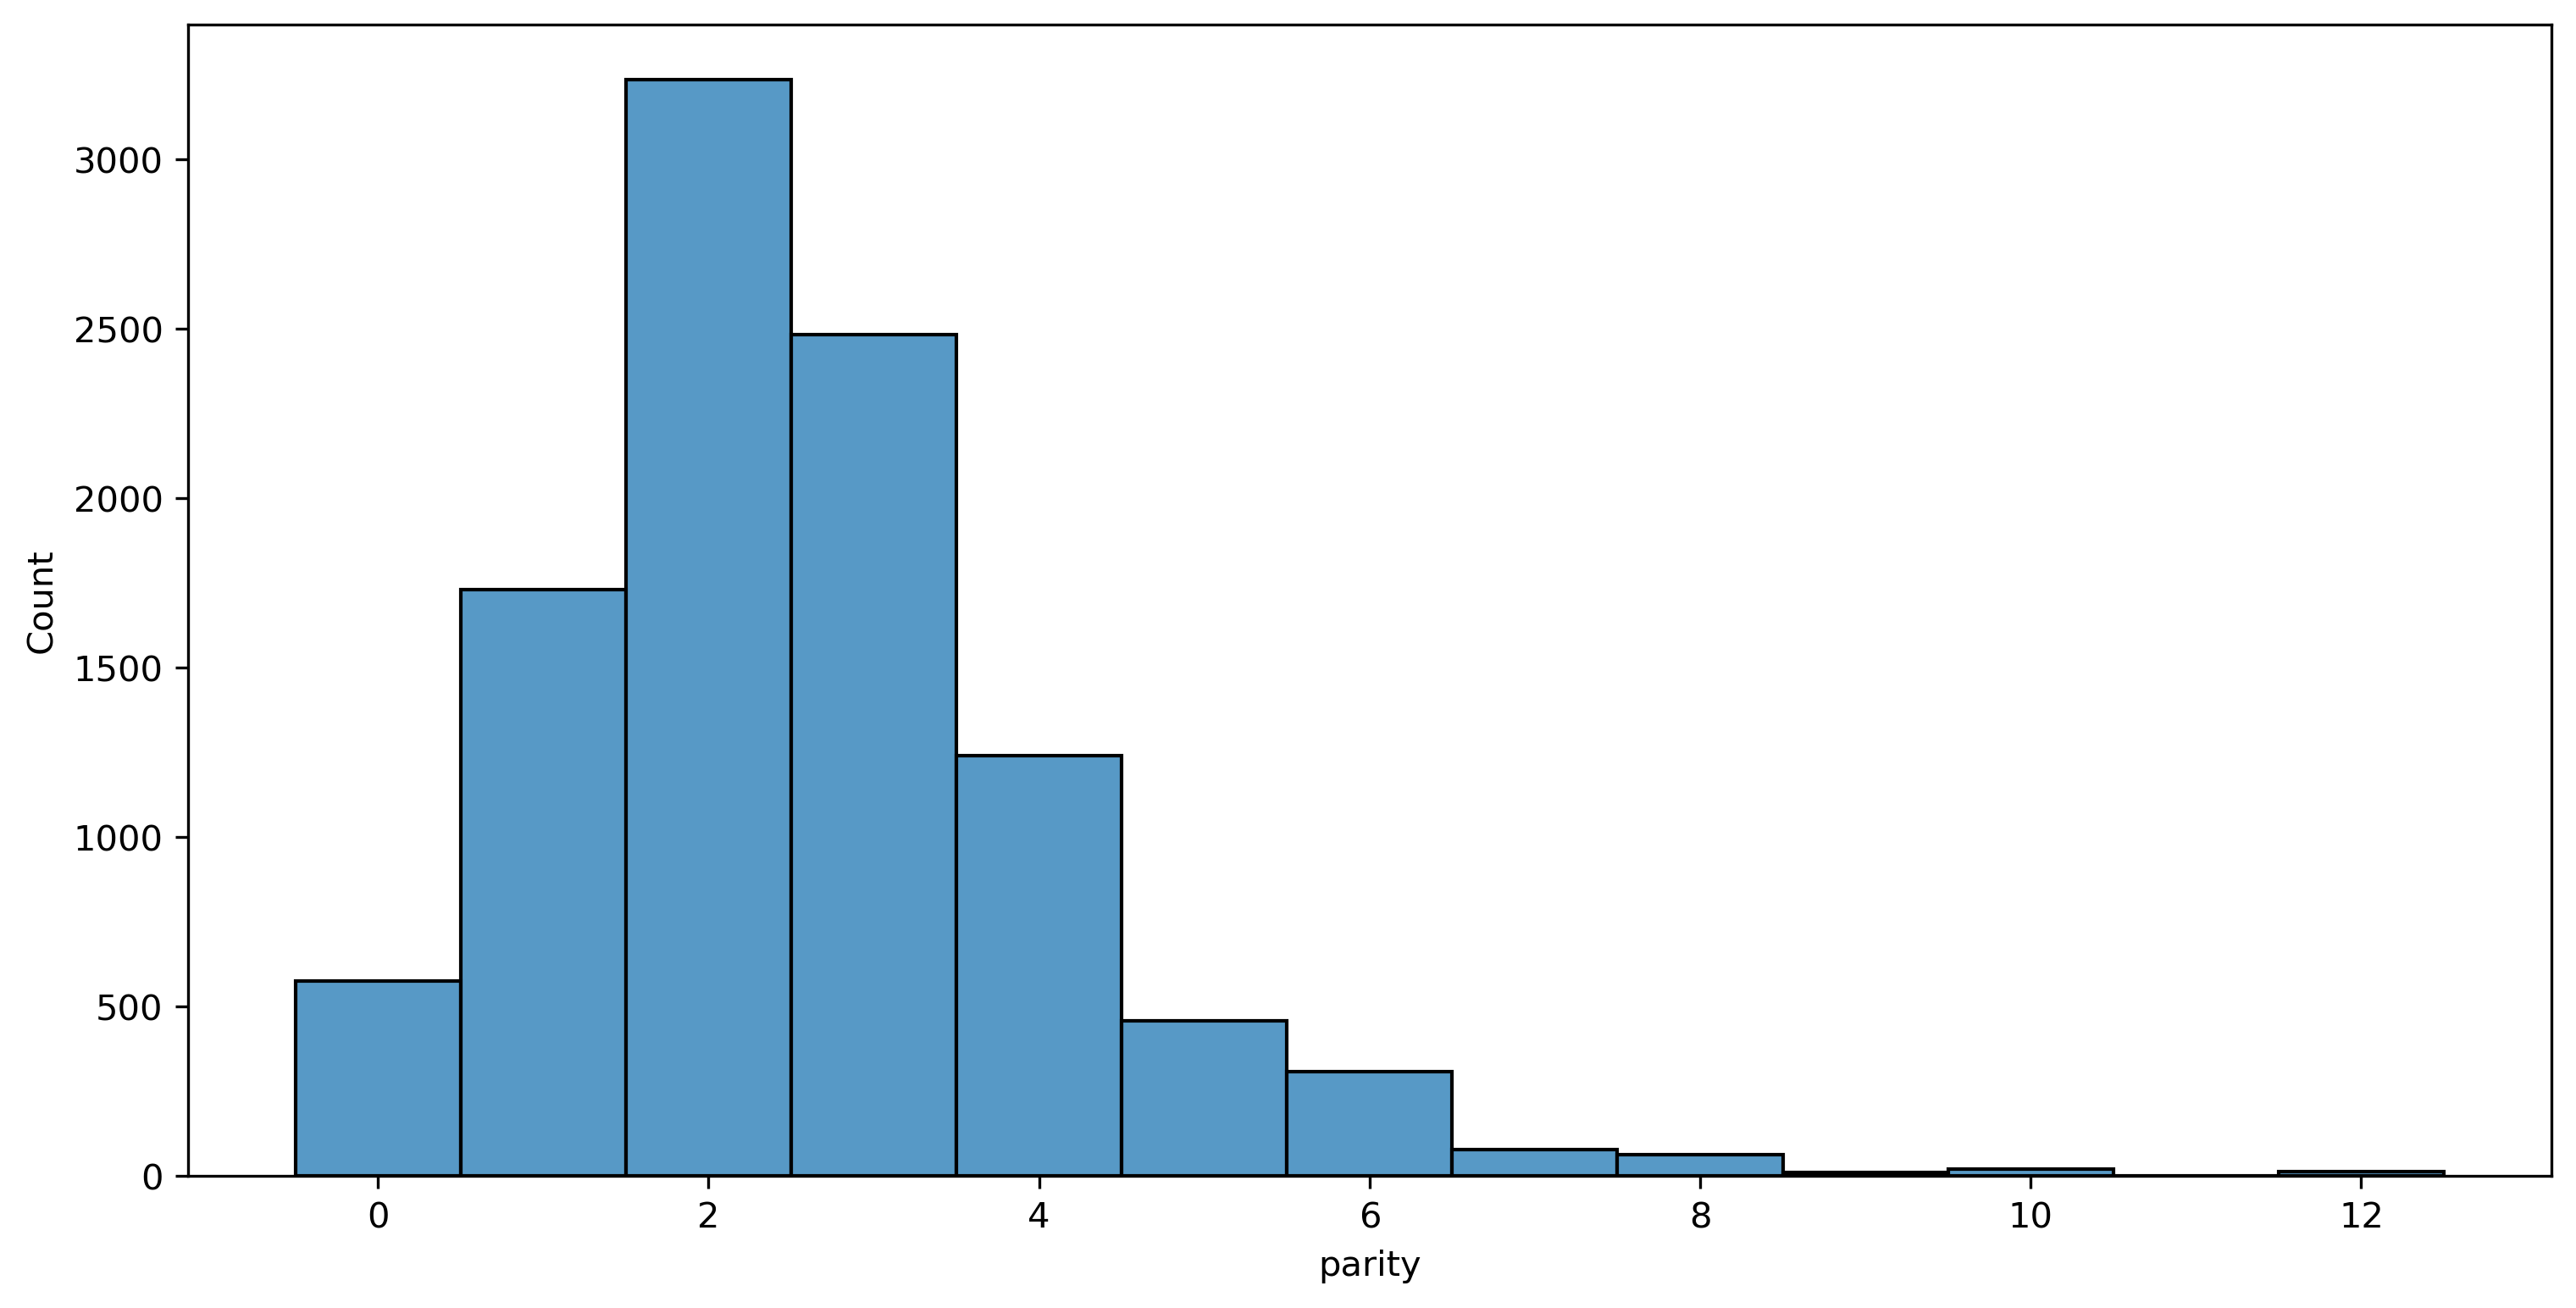

In [34]:
hist(pregnancy_data[features[20]], discrete=True, kde=False)

- ### poverty
Poverty level income<br><br>
right skewed.

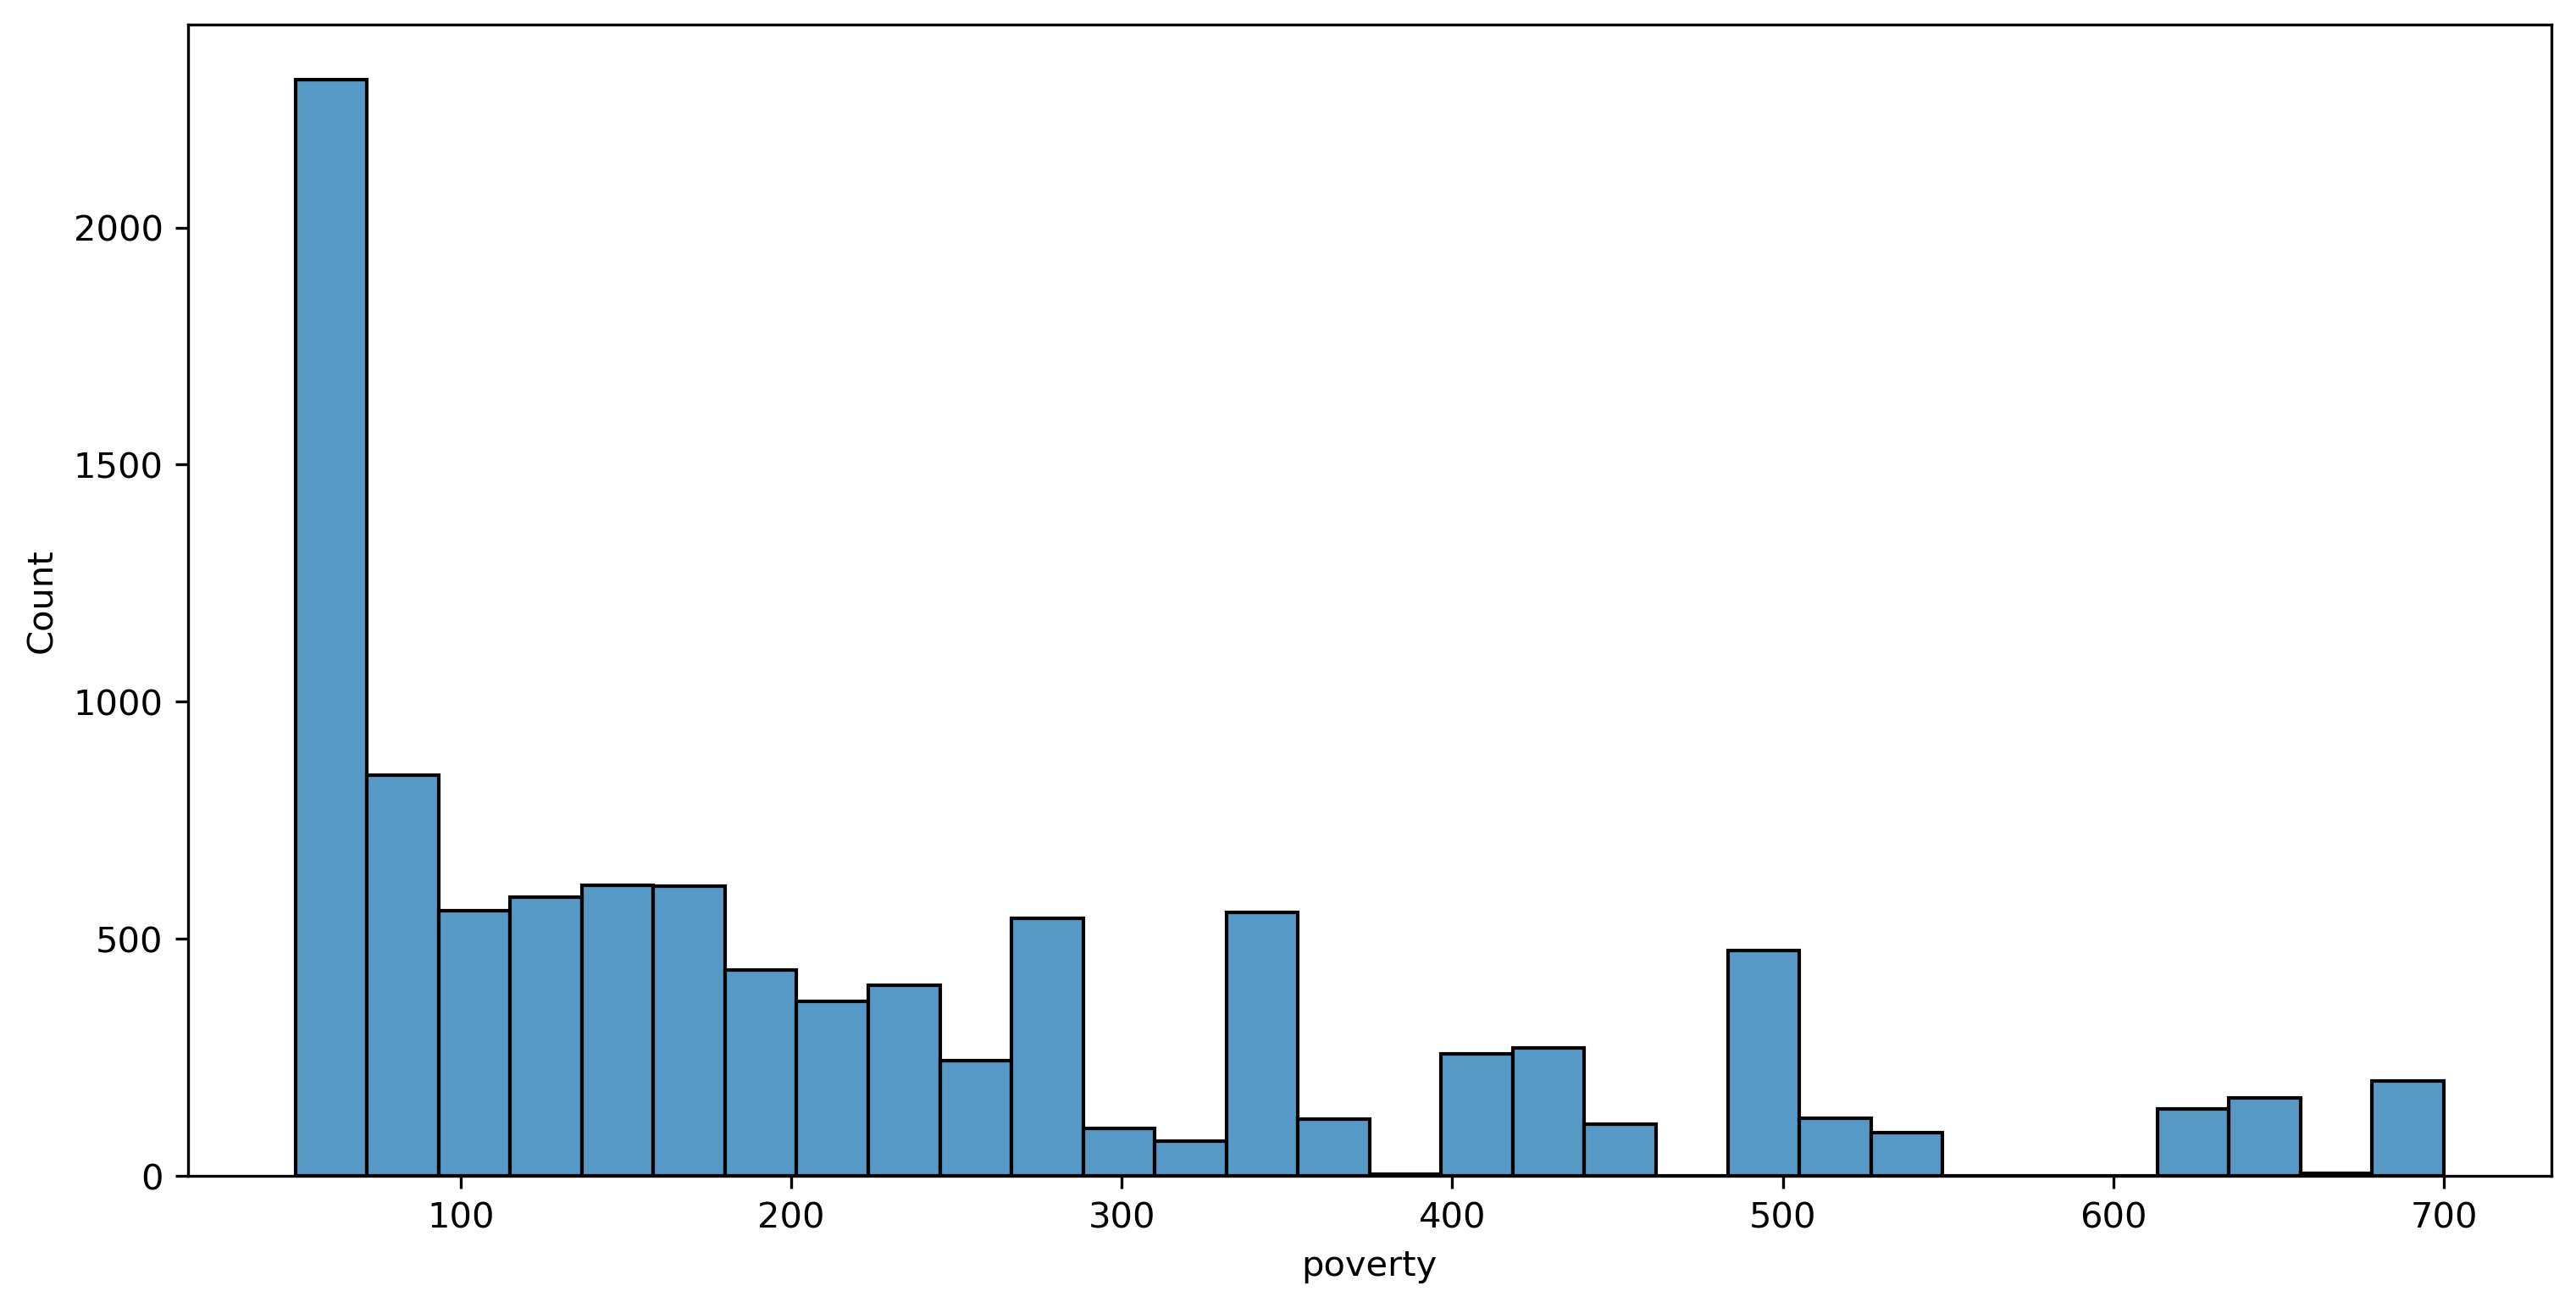

In [35]:
hist(pregnancy_data[features[21]], discrete=False, kde=False)

- ### laborfor
Labor force status

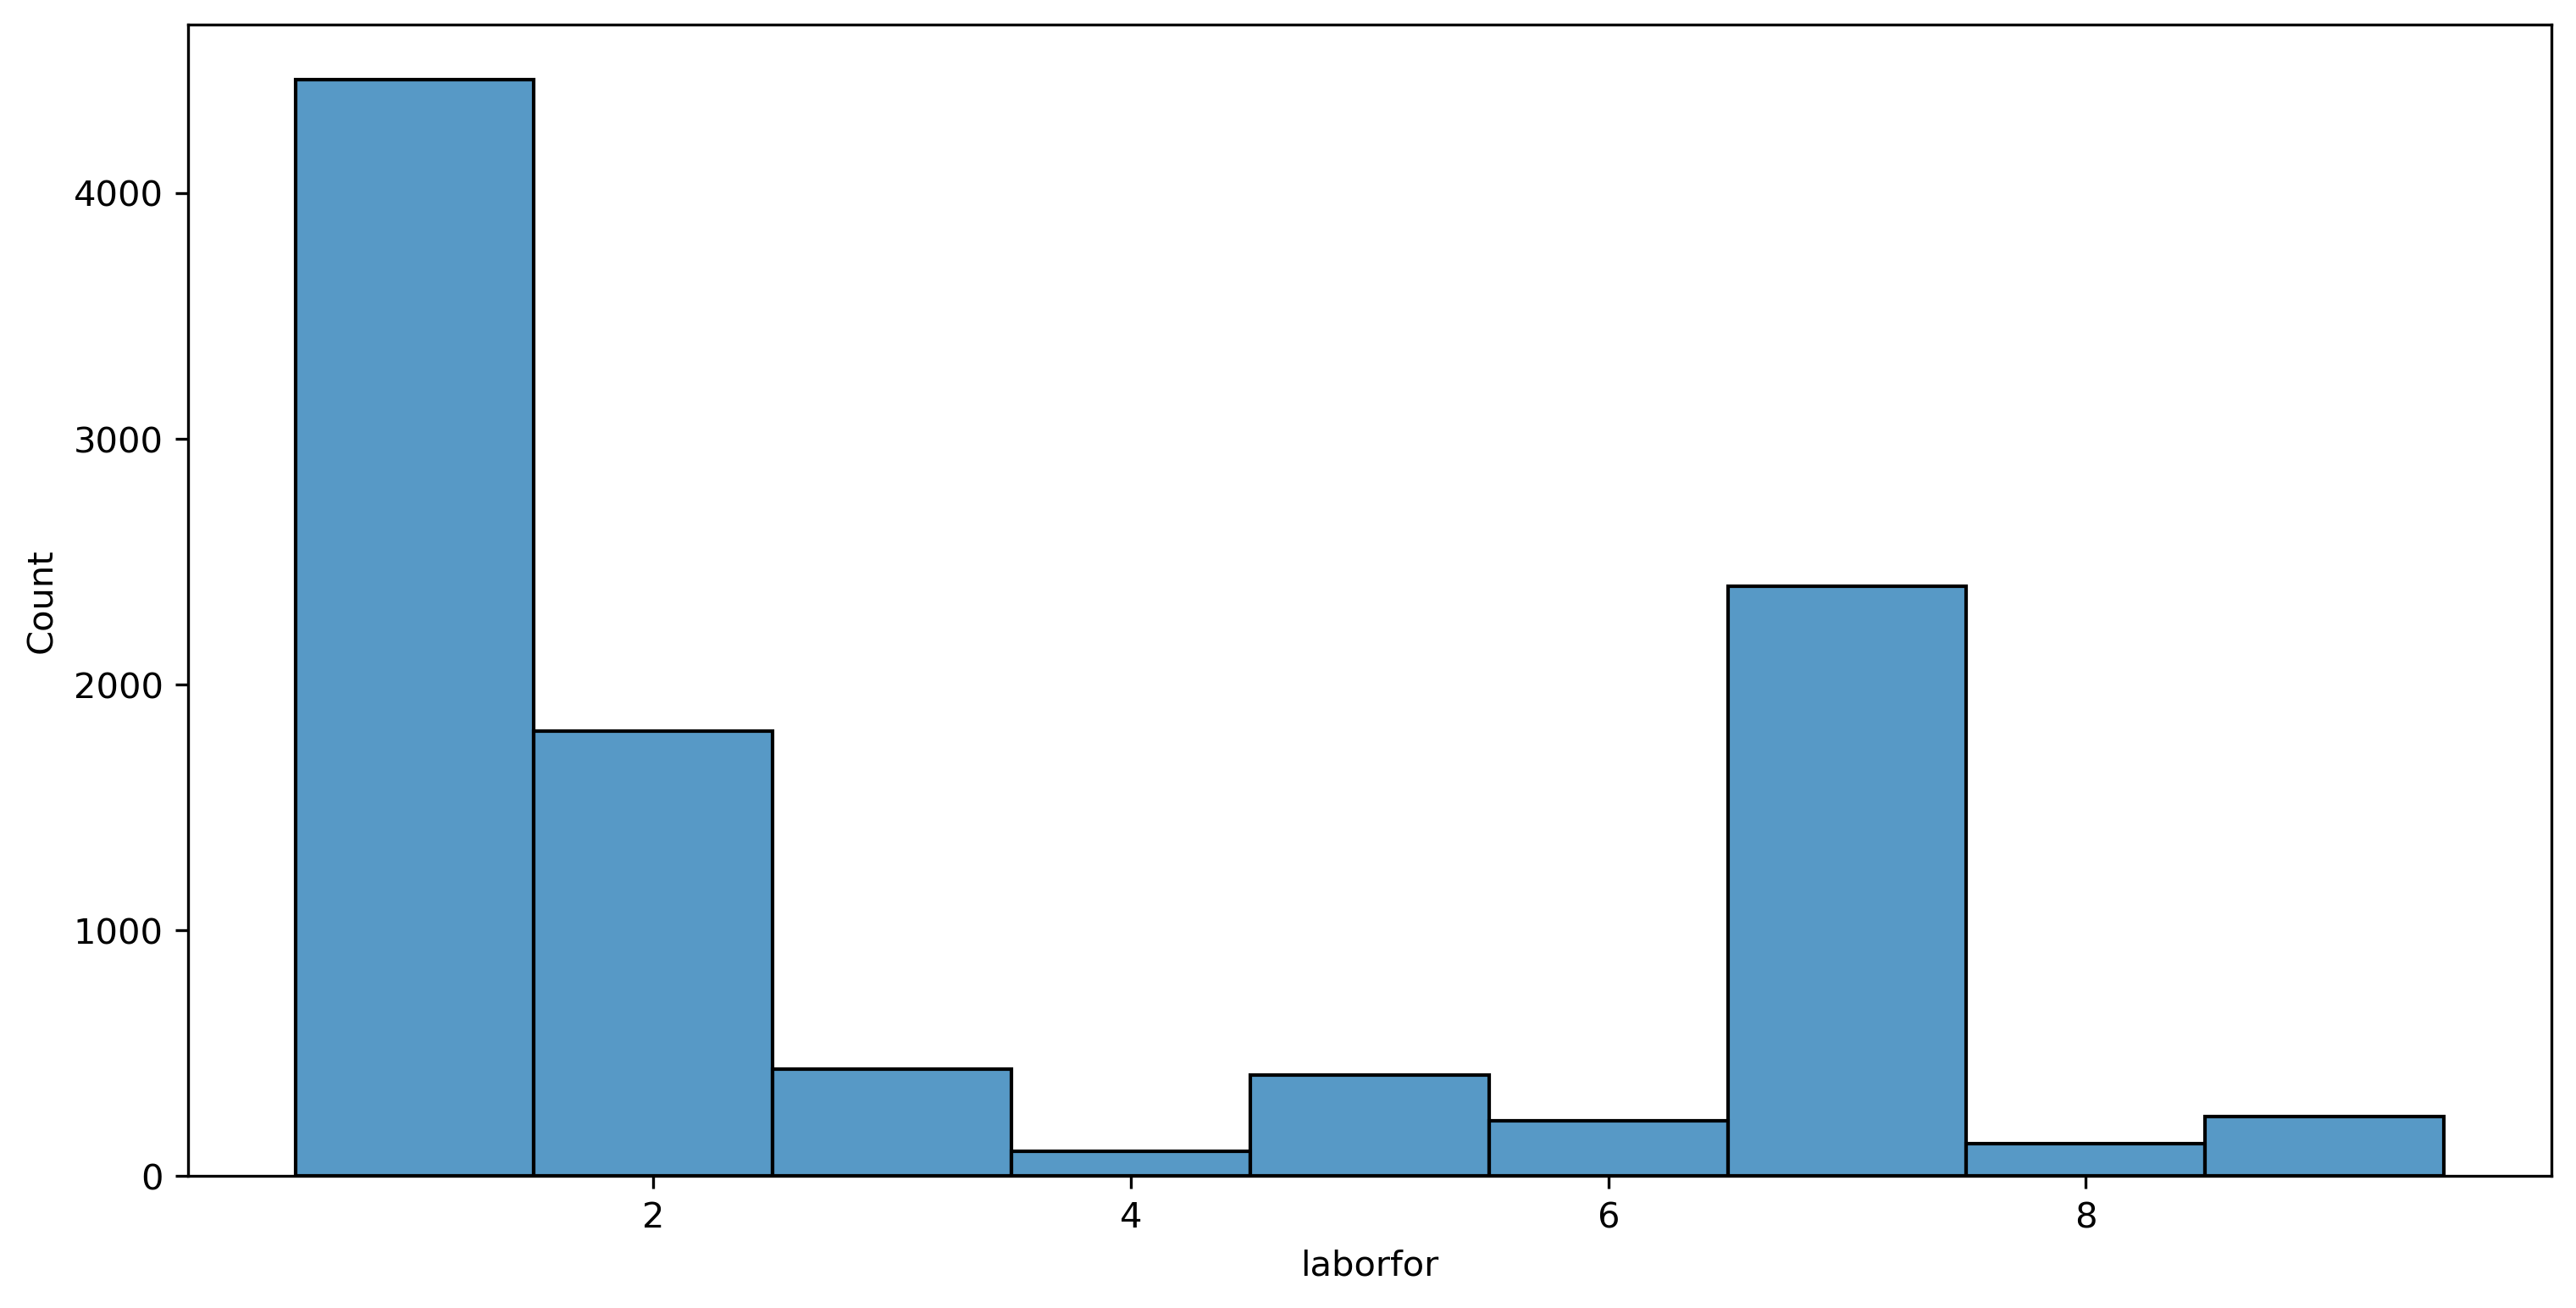

In [36]:
hist(pregnancy_data[features[22]], discrete=True, kde=False)

- ### religion
Current religious affiliation

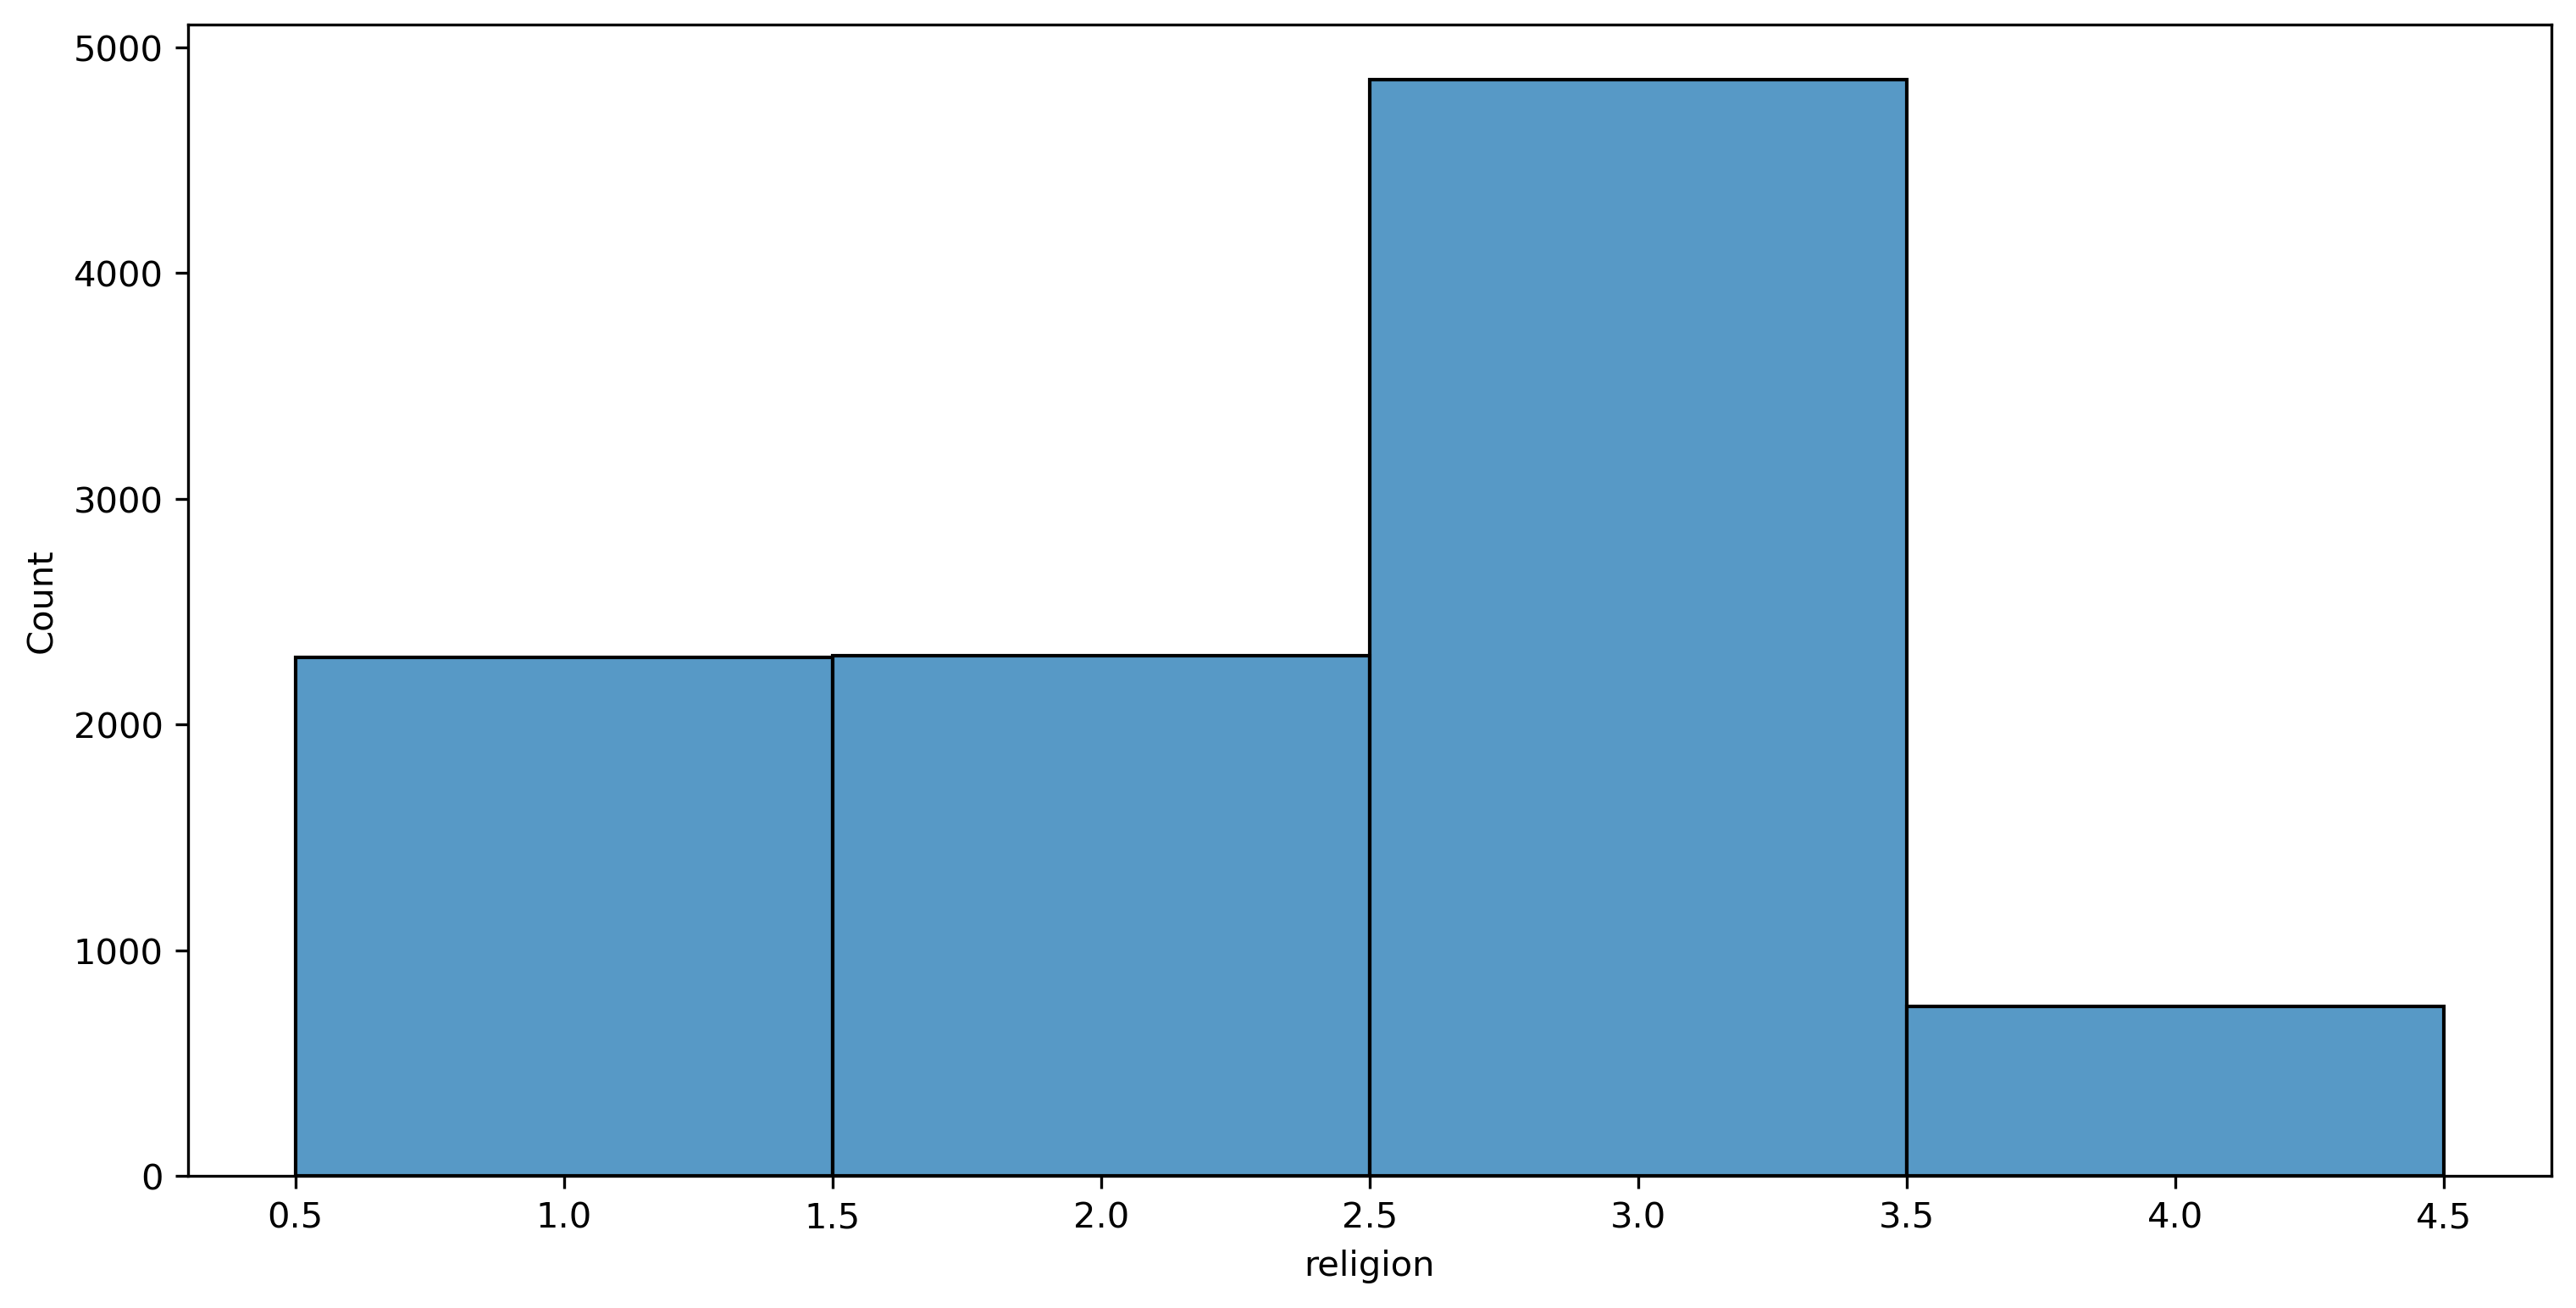

In [37]:
hist(pregnancy_data[features[23]], discrete=True, kde=False)

- ### metro
Place of residence (Metropolitan / Non-metropolitan)

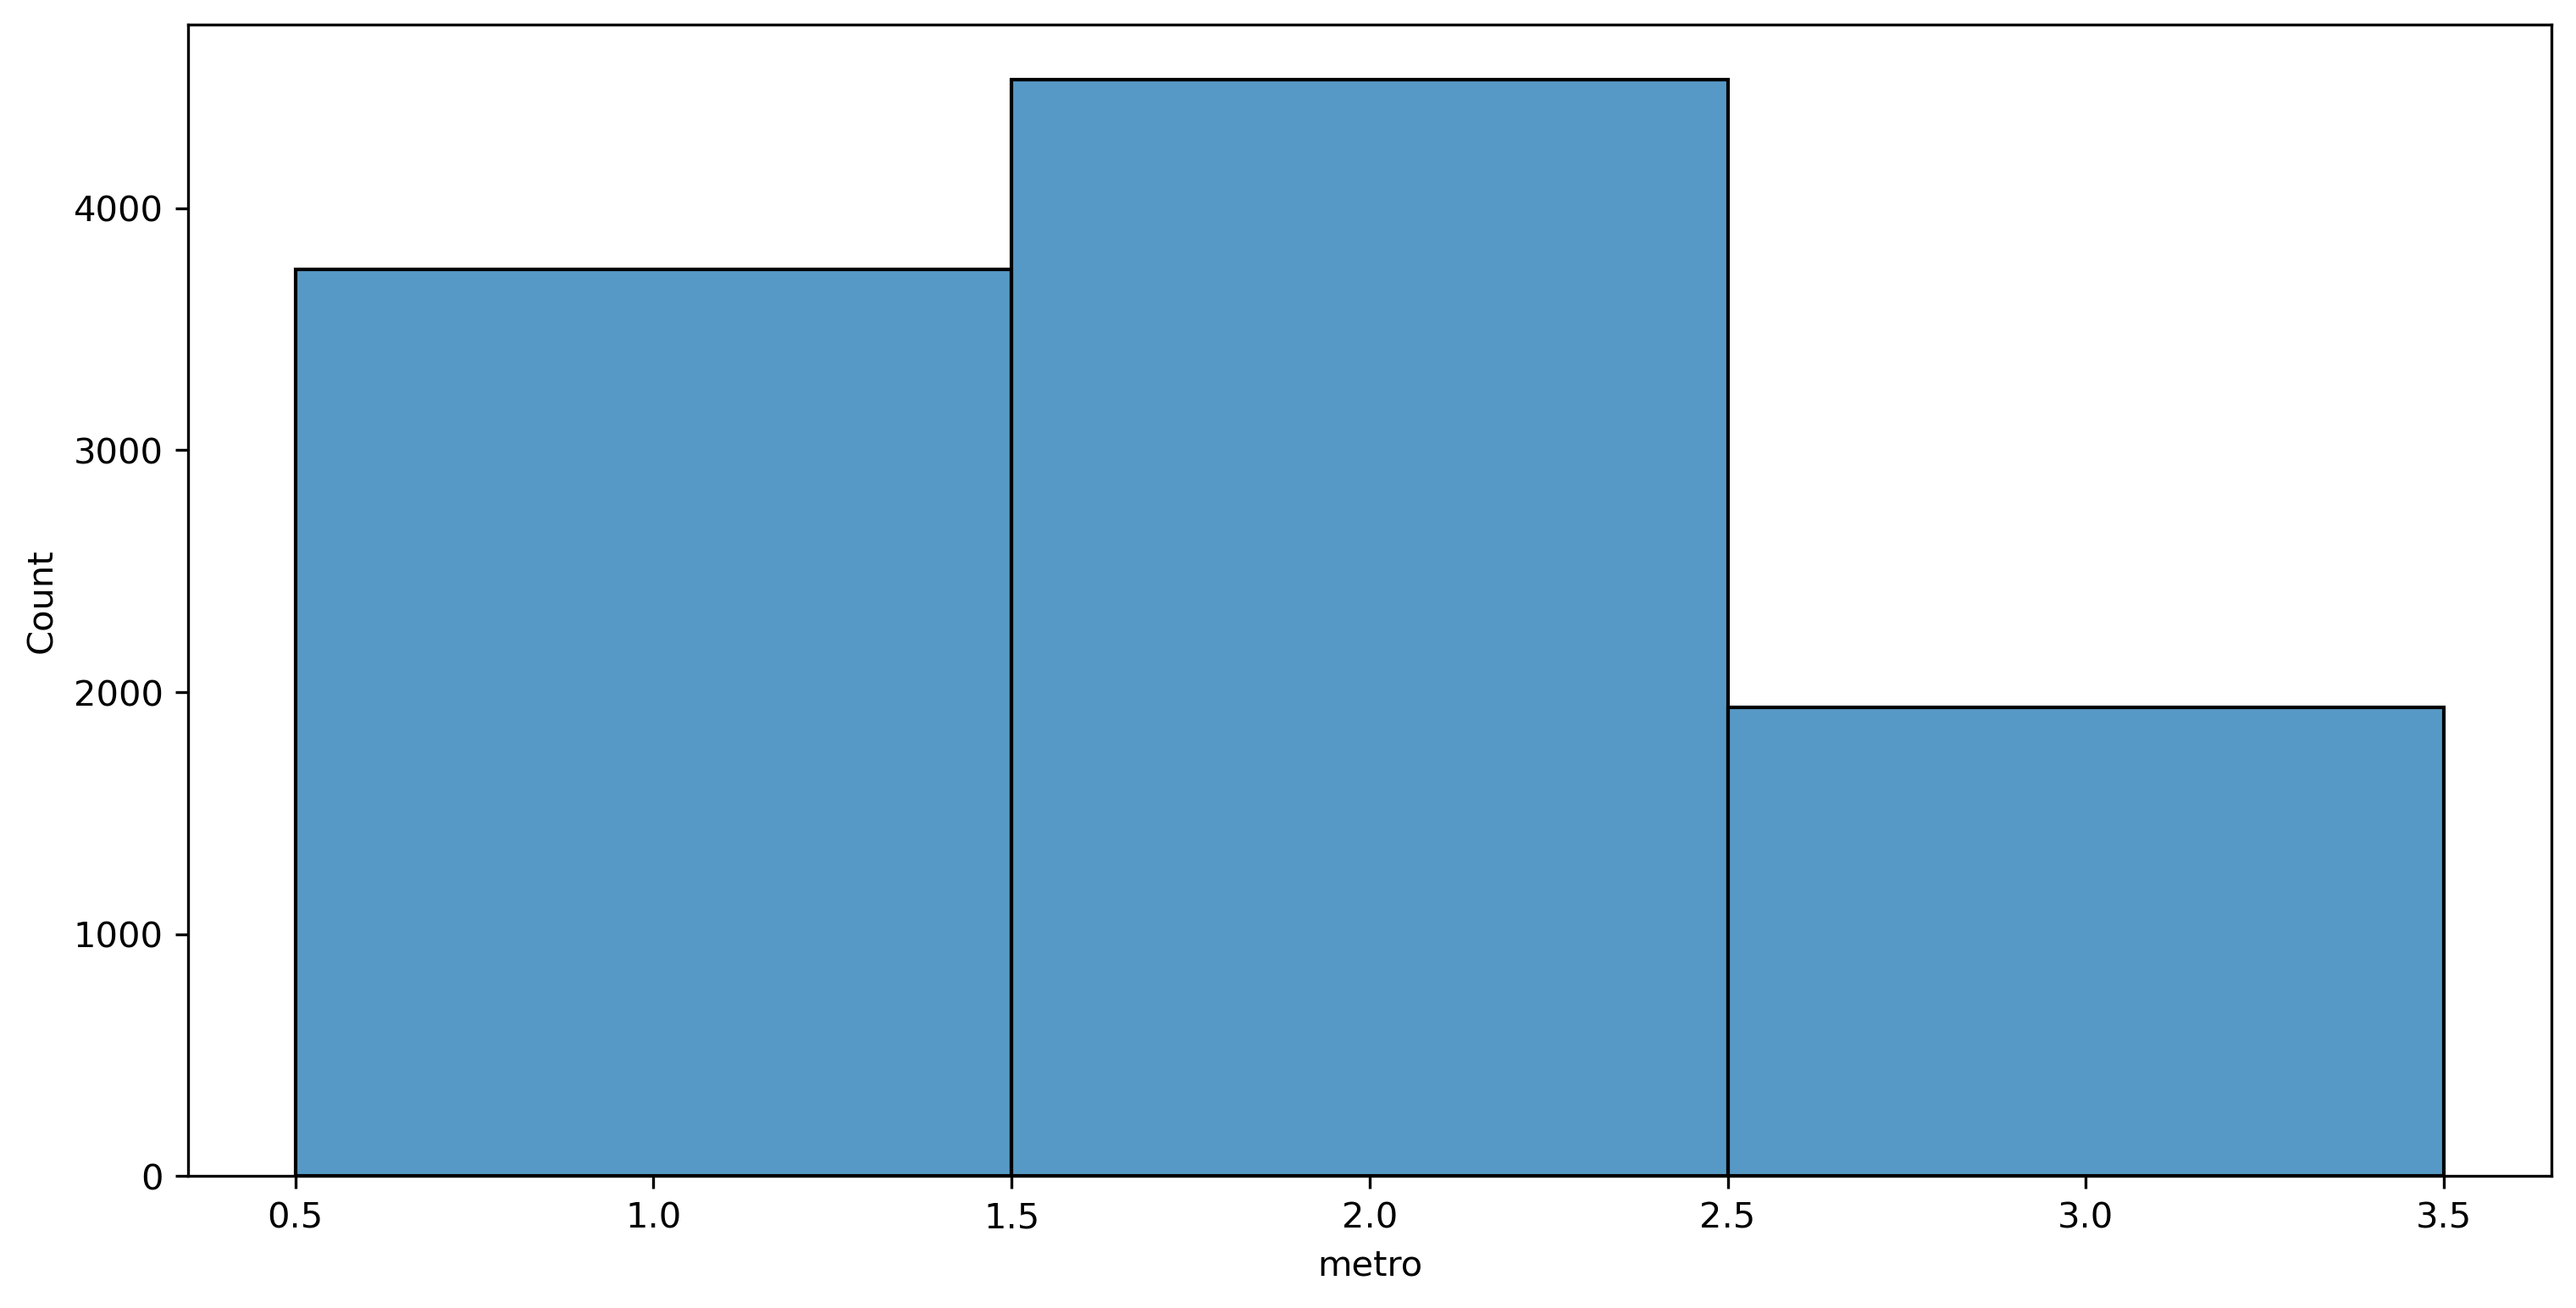

In [38]:
hist(pregnancy_data[features[24]], discrete=True, kde=False)

## first babies pregnancy duration

In [40]:
firstBabies = pregnancy_data[(pregnancy_data['pregordr'] == 1) & (pregnancy_data['outcome'] == 1)]
otherbabies = pregnancy_data[(pregnancy_data['pregordr'] != 1) & (pregnancy_data['outcome'] == 1)]

compare live first delivery and live other deliveries' pregnancy duration. most of first babies deliver in
term as like other most of other deliveries. pre-term deliveries more rare than post-term first deliveries.
both pre-term and post-term deliveries are rarer than in-term first deliveries.<br><br>
1 **EARLY PRETERM** (< 34 WEEKS)<br> 2 **PRETERM** (34-36 WEEKS)<br> 3 **TERM** (37-40 WEEKS)<br> 4 **POST-TERM** (> 40 WEEKS)

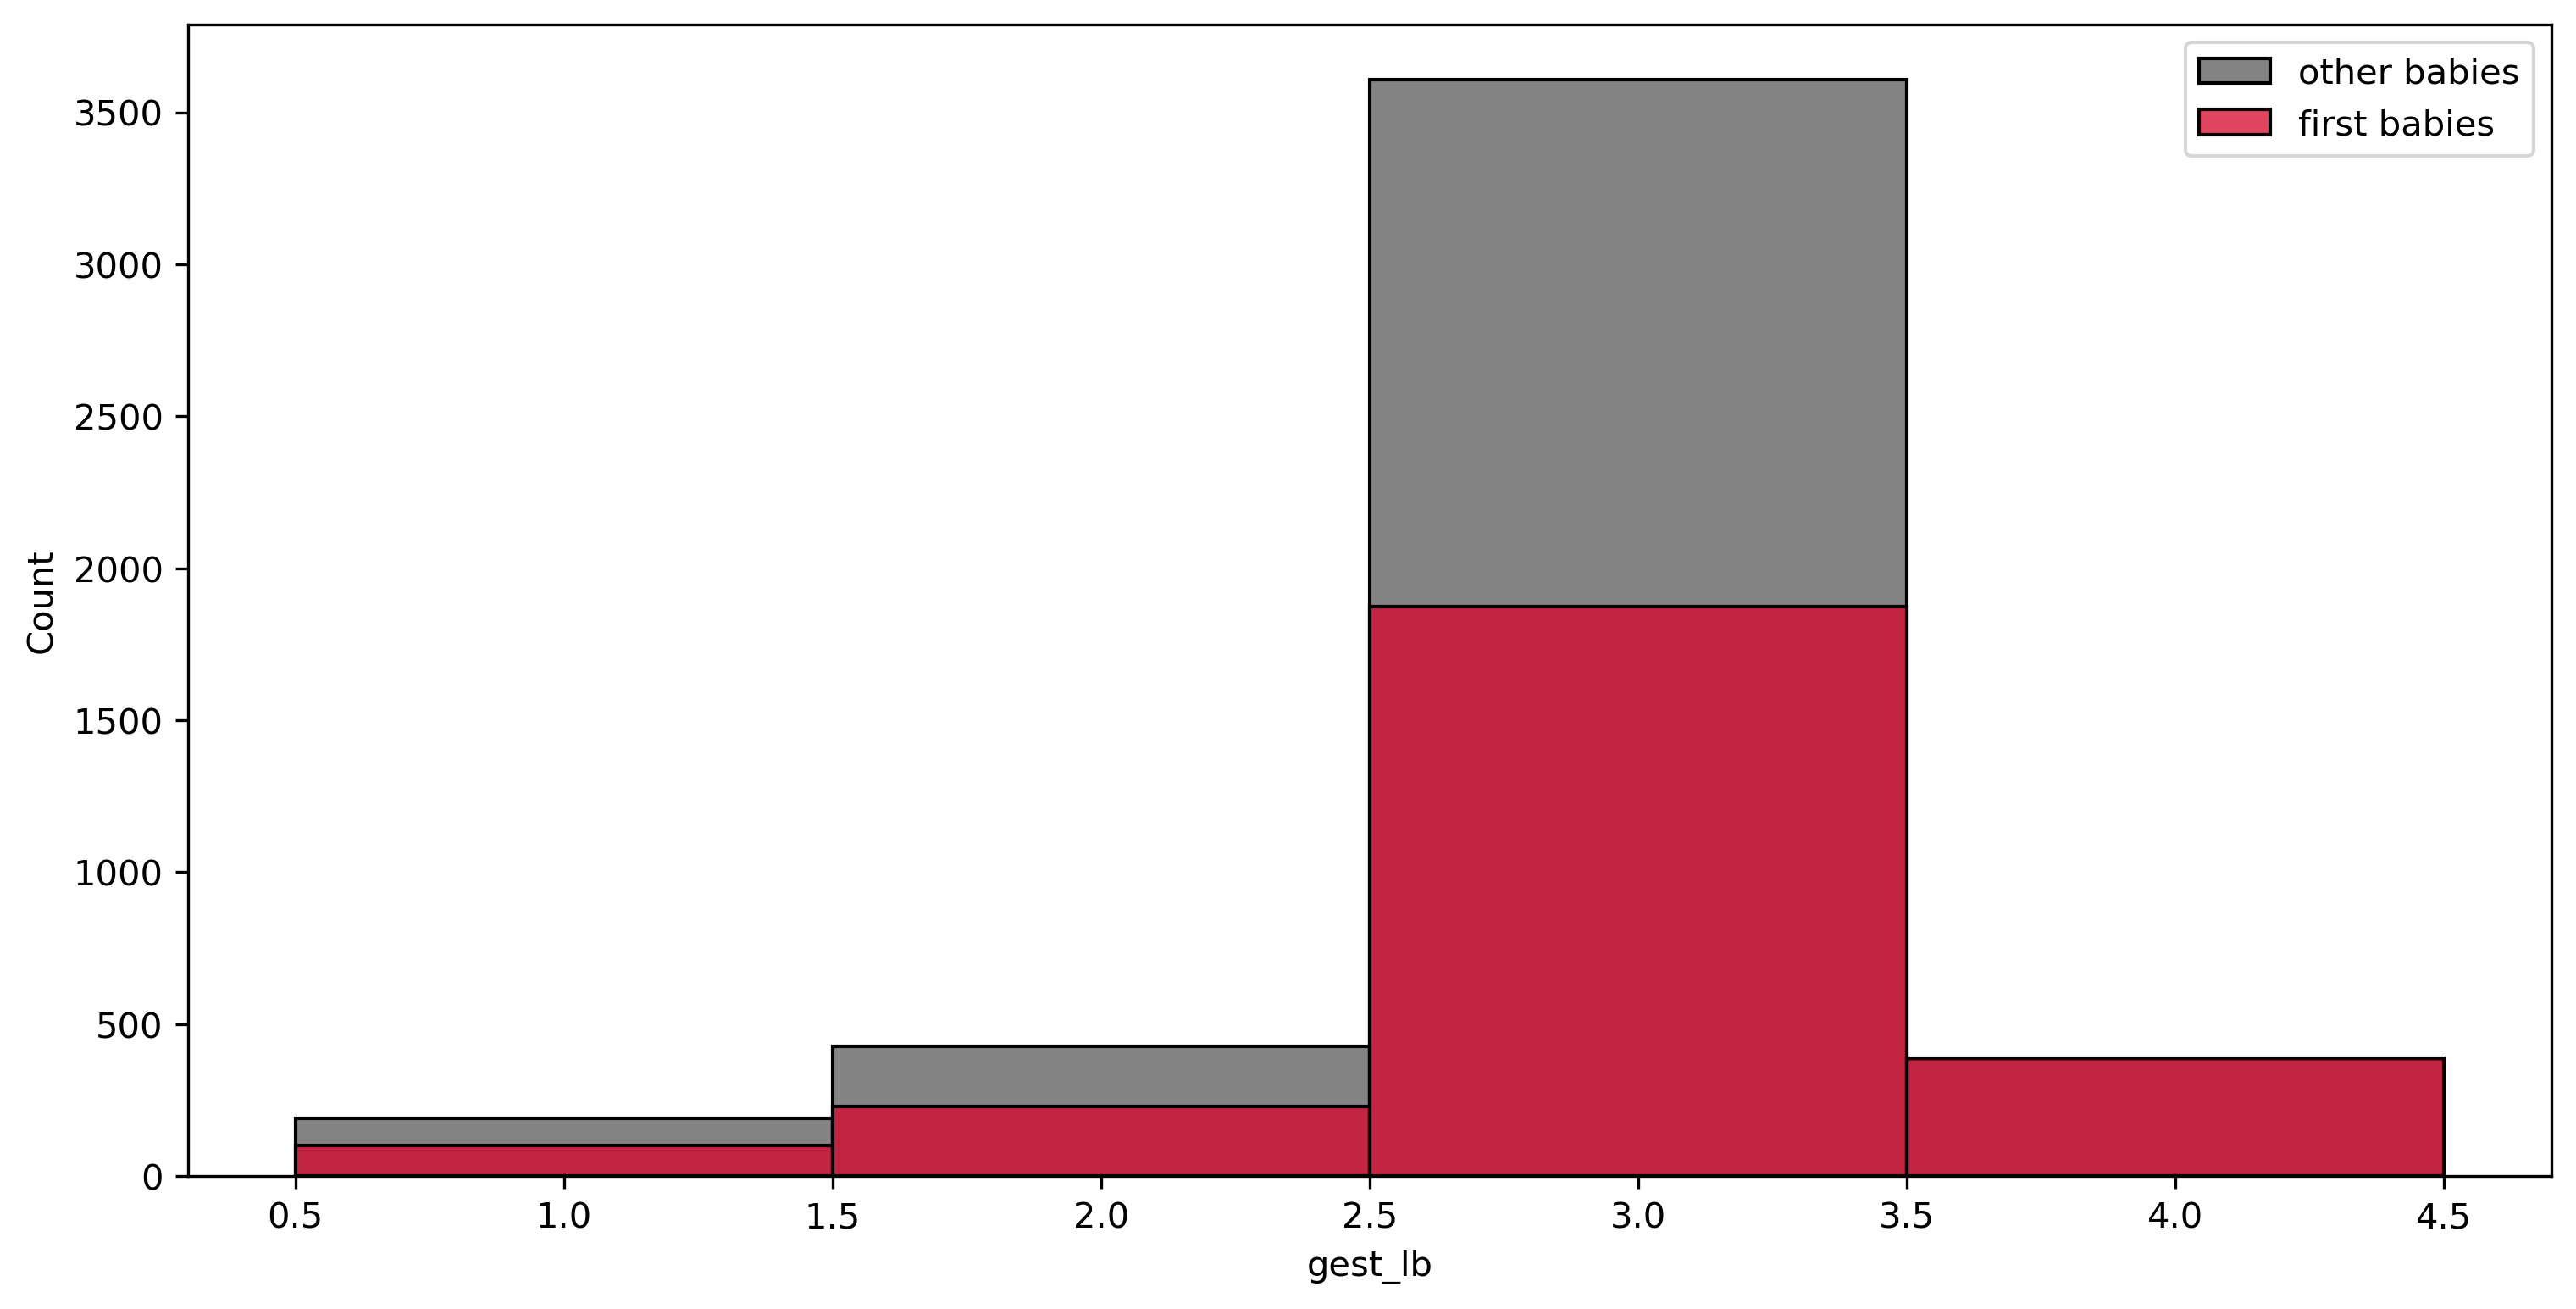

In [47]:
plt.figure(figsize=[12, 6], dpi=300)
sns.histplot(x=otherbabies['gest_lb'],
             discrete=True,
             kde=False,
             label='other babies',
             color='#595959')
sns.histplot(x=firstBabies['gest_lb'],
             discrete=True,
             kde=False,
             label='first babies',
             color='#D9042B')
plt.legend()
plt.show()

- summery statistics<br>

In [56]:
class SummeryStat:
    """
    calculate summery statistics
    """

    def __init__(self, data, column):
        self.data = data
        self.column = column

    def mean(self):
        """
        mean of the data
        :return: mean
        """
        return np.mean(self.data[self.column])

    def median(self):
        """
        median of the data
        :return: median
        """
        return np.median(self.data[self.column])

    def mode(self, bin_counts=False):
        """
        most frequent value/values in data
        :return: mode
        """
        output = ss.mode(self.data[self.column])

        if bin_counts:
            return output
        else:
            return output[0]

    def variance(self):
        """
        variability of distribution
        :return: variance
        """
        return np.var(self.data[self.column])

    def standard_deviation(self):
        """
        deviation from mean
        :return: std
        """
        return np.std(self.data[self.column])

In [57]:
liveBirth = pregnancy_data[pregnancy_data['outcome'] == 1]

In [58]:
liveBirth_summery = SummeryStat(liveBirth, 'gest_lb')
firstBabies_summery = SummeryStat(firstBabies, 'gest_lb')
otherbabies_summery = SummeryStat(otherbabies, 'gest_lb')

In [67]:
print(f' Mean: {liveBirth_summery.mean()}\r\n',
      f'Median: {liveBirth_summery.median()}\r\n',
      f'Variance: {liveBirth_summery.variance()}\r\n',
      f'StD: {liveBirth_summery.standard_deviation()}')

 Mean: 2.9354076955132657
 Median: 3.0
 Variance: 0.35573893296481013
 StD: 0.5964385408110463


In [68]:
print(f' Mean: {firstBabies_summery.mean()}\r\n',
      f'Median: {firstBabies_summery.median()}\r\n',
      f'Variance: {firstBabies_summery.variance()}\r\n',
      f'StD: {firstBabies_summery.standard_deviation()}')

 Mean: 2.983018139714396
 Median: 3.0
 Variance: 0.39492581943166094
 StD: 0.628431236836347


In [69]:
print(f' Mean: {otherbabies_summery.mean()}\r\n',
      f'Median: {otherbabies_summery.median()}\r\n',
      f'Variance: {otherbabies_summery.variance()}\r\n',
      f'StD: {otherbabies_summery.standard_deviation()}')

 Mean: 2.9086371527777777
 Median: 3.0
 Variance: 0.3317135940363378
 StD: 0.5759458256089177
